# Analyse Different Methods - Sentence-Level Errors and Confusion Matrix

# Download Results to Analyse

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import snapshot_download
snapshot_download(repo_id="KaiquanMah/open-intent-query-classification",
                  repo_type="space",
                  allow_patterns="analyse-diff-methods-sentence-level-errors/*",
                  local_dir="/content",
                  force_download=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

02_fewshot_llama_4oos_cm.csv: 0.00B [00:00, ?B/s]

04_fewshot_qwen.csv: 0.00B [00:00, ?B/s]

00_text_n_label.csv: 0.00B [00:00, ?B/s]

03_fewshot_llama.csv: 0.00B [00:00, ?B/s]

03_fewshot_llama_cm.csv: 0.00B [00:00, ?B/s]

02_fewshot_llama_4oos.csv: 0.00B [00:00, ?B/s]

01_zeroshot_llama_4oos.csv: 0.00B [00:00, ?B/s]

01_zeroshot_llama_4oos_cm.csv: 0.00B [00:00, ?B/s]

06_bert_vae_fewshot.csv:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

04_fewshot_qwen_cm.csv: 0.00B [00:00, ?B/s]

banking77_few_shot_examples.parquet:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

05_bert_fewshot_cm.csv: 0.00B [00:00, ?B/s]

05_bert_fewshot.csv: 0.00B [00:00, ?B/s]

06_bert_vae_fewshot_cm.csv: 0.00B [00:00, ?B/s]

'/content'

In [ ]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="KaiquanMah/open-intent-query-classification",
                  repo_type="space",
                  subfolder="dataset_idx2label",
                  filename="banking77_idx2label.csv",
                  local_dir="/content",
                  force_download=True)

banking77_idx2label.csv: 0.00B [00:00, ?B/s]

'/content/dataset_idx2label/banking77_idx2label.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bring in original labels, idx2label mapping, nearest fewshot examples parquet

In [ ]:
df_text_n_label = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/00_text_n_label.csv")
df_text_n_label

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  
0                                       exchange_charge  
1      balance_not_updated_after_cheque_or_cash_deposit  
2                               beneficiary_not_allowed  
3                                  pending_card_payment  
4                                       exchange_charge  
...                                                 ...  
13078                                     verify_top_up  
13079                    top_up_by_bank_transfer_charge  
13080                                         age_limit  
13081                transfer_not_received_by_recipient  
13082                          card_payment_fee_charged  

[13083 rows x 2 columns]

In [ ]:
df_label = df_text_n_label.copy()
df_label.drop(columns=['text'], inplace=True)
df_label

label
0                                       exchange_charge
1      balance_not_updated_after_cheque_or_cash_deposit
2                               beneficiary_not_allowed
3                                  pending_card_payment
4                                       exchange_charge
...                                                 ...
13078                                     verify_top_up
13079                    top_up_by_bank_transfer_charge
13080                                         age_limit
13081                transfer_not_received_by_recipient
13082                          card_payment_fee_charged

[13083 rows x 1 columns]

In [ ]:
df_idx2label = pd.read_csv("/content/dataset_idx2label/banking77_idx2label.csv")
df_idx2label

index                                    label
0       0                         activate_my_card
1       1                                age_limit
2       2                  apple_pay_or_google_pay
3       3                              atm_support
4       4                         automatic_top_up
..    ...                                      ...
72     72                 virtual_card_not_working
73     73                       visa_or_mastercard
74     74                      why_verify_identity
75     75            wrong_amount_of_cash_received
76     76  wrong_exchange_rate_for_cash_withdrawal

[77 rows x 2 columns]

In [ ]:
df_nearest_fewshot_examples = pd.read_parquet("/content/analyse-diff-methods-sentence-level-errors/banking77_few_shot_examples.parquet")
df_nearest_fewshot_examples

text  \
tsvidx                                                      
0          Could you help my figure out the exchange fee?   
1       I made a cash deposit to my account but i don'...   
2       Hello - I'm on the app and trying to purchase ...   
3              Why is it saying I have a pending payment?   
4       Is there an extra charge to exchange different...   
...                                                   ...   
13078   I cannot locate the verification code for my t...   
13079       If I make a top-up are there charges applied?   
13080                            What is the minimum age?   
13081   Is there a reason why my transaction is taking...   
13082                 im not sure what this charge is for   

                                                   label  split  \
tsvidx                                                            
0                                        exchange_charge  train   
1       balance_not_updated_after_cheque_or_cash_deposit  train   
2                                beneficiary_not_allowed  train   
3                                   pending_card_payment  train   
4                                        exchange_charge  train   
...                                                  ...    ...   
13078                                      verify_top_up   test   
13079                     top_up_by_bank_transfer_charge   test   
13080                                          age_limit   test   
13081                 transfer_not_received_by_recipient   test   
13082                           card_payment_fee_charged   test   

                                                 examples  
tsvidx                                                     
0       Example 1:\nQuestion: "Can you tell me about t...  
1       Example 1:\nQuestion: "I placed a cash deposit...  
2       Example 1:\nQuestion: "I'm trying to purchase ...  
3       Example 1:\nQuestion: "why do I have a pending...  
4       Example 1:\nQuestion: "Is there an additional ...  
...                                                   ...  
13078   Example 1:\nQuestion: "I need help finding the...  
13079   Example 1:\nQuestion: "Am I charged if I make ...  
13080   Example 1:\nQuestion: "What is the minimum age...  
13081   Example 1:\nQuestion: "Why is my transaction t...  
13082   Example 1:\nQuestion: "i do not know what this...  

[13083 rows x 4 columns]

# [4 Similar OOS] Zero-shot vs Few-shot llama3.2:3b
* curated 4 OOS classes
```
# oos_banking_fx = [31,32,33,36]
# oos_banking_25perc = oos_banking_fx
```
* to view the idx2label mapping, please refer to https://huggingface.co/spaces/KaiquanMah/open-intent-query-classification/blob/main/dataset_idx2label/banking77_idx2label.csv

In [ ]:
oos_banking_fx = [31, 32, 33, 36]
list_oos_labels = list(df_idx2label[df_idx2label['index'].isin(oos_banking_fx)]['label'].values)
list_oos_labels

['exchange_charge',
 'exchange_rate',
 'exchange_via_app',
 'fiat_currency_support']

In [ ]:
zeroshot_llama = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/01_zeroshot_llama_4oos.csv")
zeroshot_llama.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
zeroshot_llama

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                          card_payment_fee_charged  banking   test   

                                              predicted  confidence  \
0                              card_payment_fee_charged       100.0   
1      balance_not_updated_after_cheque_or_cash_deposit        90.0   
2                           card_payment_not_recognised        90.0   
3                                  pending_card_payment       100.0   
4                             extra_charge_on_statement       100.0   
...                                                 ...         ...   
13078                                     top_up_failed        90.0   
13079                                     top_up_limits       100.0   
13080                                         age_limit       100.0   
13081                transfer_not_received_by_recipient        60.0   
13082                         extra_charge_on_statement        80.0   

       convert_to_oos  predicted_correct  
0                True              False  
1               False               True  
2               False              False  
3               False               True  
4                True              False  
...               ...                ...  
13078           False              False  
13079           False              False  
13080           False               True  
13081           False               True  
13082           False              False  

[13083 rows x 8 columns]

In [ ]:
fewshot_llama = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/02_fewshot_llama_4oos.csv")
fewshot_llama.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
fewshot_llama

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                          card_payment_fee_charged  banking   test   

                                              predicted  confidence  \
0                             extra_charge_on_statement        80.0   
1      balance_not_updated_after_cheque_or_cash_deposit        80.0   
2                               beneficiary_not_allowed        60.0   
3                                  pending_card_payment        98.0   
4                             extra_charge_on_statement        80.0   
...                                                 ...         ...   
13078                               lost_or_stolen_card        80.0   
13079                             top_up_by_card_charge        80.0   
13080                                         age_limit       100.0   
13081                transfer_not_received_by_recipient        80.0   
13082                         extra_charge_on_statement        80.0   

       convert_to_oos  predicted_correct  
0                True              False  
1               False               True  
2               False               True  
3               False               True  
4                True              False  
...               ...                ...  
13078           False              False  
13079           False              False  
13080           False               True  
13081           False               True  
13082           False              False  

[13083 rows x 8 columns]

In [ ]:
fewshot_llama_w_predictions = fewshot_llama.copy()
fewshot_llama_w_predictions.drop(columns = ['text', 'dataset', 'split'], inplace = True)
fewshot_llama_w_predictions

label  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                              predicted  confidence  \
0                             extra_charge_on_statement        80.0   
1      balance_not_updated_after_cheque_or_cash_deposit        80.0   
2                               beneficiary_not_allowed        60.0   
3                                  pending_card_payment        98.0   
4                             extra_charge_on_statement        80.0   
...                                                 ...         ...   
13078                               lost_or_stolen_card        80.0   
13079                             top_up_by_card_charge        80.0   
13080                                         age_limit       100.0   
13081                transfer_not_received_by_recipient        80.0   
13082                         extra_charge_on_statement        80.0   

       convert_to_oos  predicted_correct  
0                True              False  
1               False               True  
2               False               True  
3               False               True  
4                True              False  
...               ...                ...  
13078           False              False  
13079           False              False  
13080           False               True  
13081           False               True  
13082           False              False  

[13083 rows x 5 columns]

In [ ]:
df_zero_v_few = pd.concat([df_label, zeroshot_llama, fewshot_llama_w_predictions], axis=1)
df_zero_v_few.columns=["label_orig", "text", "label_zero", "dataset", "split",
                       "pred_zero", "confidence_zero", "oos_zero", "pred_correct_zero",
                       "label_few", "pred_few", "confidence_few", "oos_few", "pred_correct_few"]
df_zero_v_few = df_zero_v_few[["text", "label_orig",
                               "label_zero", "pred_zero", "confidence_zero", "oos_zero", "pred_correct_zero",
                               "label_few", "pred_few", "confidence_few", "oos_few", "pred_correct_few",
                               "dataset", "split"]]

df_zero_v_few

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                             label_orig  \
0                                       exchange_charge   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                       exchange_charge   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                             label_zero  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                              pred_zero  confidence_zero  \
0                              card_payment_fee_charged            100.0   
1      balance_not_updated_after_cheque_or_cash_deposit             90.0   
2                           card_payment_not_recognised             90.0   
3                                  pending_card_payment            100.0   
4                             extra_charge_on_statement            100.0   
...                                                 ...              ...   
13078                                     top_up_failed             90.0   
13079                                     top_up_limits            100.0   
13080                                         age_limit            100.0   
13081                transfer_not_received_by_recipient             60.0   
13082                         extra_charge_on_statement             80.0   

       oos_zero  pred_correct_zero  \
0          True              False   
1         False               True   
2         False              False   
3         False               True   
4          True              False   
...         ...                ...   
13078     False              False   
13079     False              False   
13080     False               True   
13081     False               True   
13082     False              False   

                                              label_few  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080       

In [ ]:
sorted(df_zero_v_few.label_orig.unique())

['Refund_not_showing_up',
 'activate_my_card',
 'age_limit',
 'apple_pay_or_google_pay',
 'atm_support',
 'automatic_top_up',
 'balance_not_updated_after_bank_transfer',
 'balance_not_updated_after_cheque_or_cash_deposit',
 'beneficiary_not_allowed',
 'cancel_transfer',
 'card_about_to_expire',
 'card_acceptance',
 'card_arrival',
 'card_delivery_estimate',
 'card_linking',
 'card_not_working',
 'card_payment_fee_charged',
 'card_payment_not_recognised',
 'card_payment_wrong_exchange_rate',
 'card_swallowed',
 'cash_withdrawal_charge',
 'cash_withdrawal_not_recognised',
 'change_pin',
 'compromised_card',
 'contactless_not_working',
 'country_support',
 'declined_card_payment',
 'declined_cash_withdrawal',
 'declined_transfer',
 'direct_debit_payment_not_recognised',
 'disposable_card_limits',
 'edit_personal_details',
 'exchange_charge',
 'exchange_rate',
 'exchange_via_app',
 'extra_charge_on_statement',
 'failed_transfer',
 'fiat_currency_support',
 'get_disposable_virtual_card',
 '

## OOS

In [ ]:
# performance of oos classes
df_zero_v_few_filtered_oos = df_zero_v_few[df_zero_v_few['label_orig'].isin(list_oos_labels)]
df_zero_v_few_filtered_oos

text  \
0         Could you help my figure out the exchange fee?   
4      Is there an extra charge to exchange different...   
18     What are the currency types that I can keep mo...   
34                What other currencies can I hang onto?   
43            What currences are available for exchange?   
...                                                  ...   
12980    How much do I have to pay for the exchange fee?   
12982              Do you work with all fiat currencies?   
12991  Is there a discount for frequently exchanging ...   
13009  Are there any extra hidden fees for exchanging...   
13059  Does it cost to exchange currencies with this ...   

                  label_orig label_zero                         pred_zero  \
0            exchange_charge        oos          card_payment_fee_charged   
4            exchange_charge        oos         extra_charge_on_statement   
18     fiat_currency_support        oos    supported_cards_and_currencies   
34     fiat_currency_support        oos    supported_cards_and_currencies   
43          exchange_via_app        oos    supported_cards_and_currencies   
...                      ...        ...                               ...   
12980        exchange_charge        oos          card_payment_fee_charged   
12982  fiat_currency_support        oos    supported_cards_and_currencies   
12991        exchange_charge        oos         extra_charge_on_statement   
13009        exchange_charge        oos         extra_charge_on_statement   
13059        exchange_charge        oos  card_payment_wrong_exchange_rate   

       confidence_zero  oos_zero  pred_correct_zero label_few  \
0                100.0      True              False       oos   
4                100.0      True              False       oos   
18               100.0      True              False       oos   
34               100.0      True              False       oos   
43               100.0      True              False       oos   
...                ...       ...                ...       ...   
12980            100.0      True              False       oos   
12982            100.0      True              False       oos   
12991             50.0      True              False       oos   
13009             90.0      True              False       oos   
13059            100.0      True              False       oos   

                             pred_few  confidence_few  oos_few  \
0           extra_charge_on_statement            80.0     True   
4           extra_charge_on_statement            80.0     True   
18     supported_cards_and_currencies           100.0     True   
34     supported_cards_and_currencies           100.0     True   
43     supported_cards_and_currencies           100.0     True   
...                               ...             ...      ...   
12980       extra_charge_on_statement            80.0     True   
12982  supported_cards_and_currencies           100.0     True   
12991       extra_charge_on_statement            80.0     True   
13009       extra_charge_on_statement            80.0     True   
13059       extra_charge_on_statement            80.0     True   

       pred_correct_few  dataset  split  
0                 False  banking  train  
4                 False  banking  train  
18                False  banking  train  
34                False  banking  train  
43                False  banking  train  
...                 ...      ...    ...  
12980             False  banking   test  
12982             False  banking   test  
12991             False  banking   test  
13009             False  banking   test  
13059             False  banking   test  

[637 rows x 14 columns]

In [ ]:
total_rows = len(df_zero_v_few_filtered_oos)
percentage_pred_correct_zero = (df_zero_v_few_filtered_oos['pred_correct_zero'].sum() / total_rows) * 100
percentage_pred_correct_few = (df_zero_v_few_filtered_oos['pred_correct_few'].sum() / total_rows) * 100

print(f"Percentage of rows with pred_correct_zero: {percentage_pred_correct_zero:.2f}%")
print(f"Percentage of rows with pred_correct_few: {percentage_pred_correct_few:.2f}%")

Percentage of rows with pred_correct_zero: 0.94%
Percentage of rows with pred_correct_few: 4.87%


In [ ]:
percentage_correct_zero_by_label_oos = df_zero_v_few_filtered_oos.groupby('label_orig')['pred_correct_zero'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_zero' by original OOS label:")
display(percentage_correct_zero_by_label_oos)

percentage_correct_few_by_label_oos = df_zero_v_few_filtered_oos.groupby('label_orig')['pred_correct_few'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("\nPercentage of correct predictions for 'pred_correct_few' by original OOS label:")
display(percentage_correct_few_by_label_oos)

Percentage of correct predictions for 'pred_correct_zero' by original OOS label:


label_orig
exchange_charge          0.000000
exchange_rate            3.289474
exchange_via_app         0.632911
fiat_currency_support    0.000000
Name: True, dtype: float64


Percentage of correct predictions for 'pred_correct_few' by original OOS label:


label_orig
exchange_charge           1.242236
exchange_rate            19.078947
exchange_via_app          0.000000
fiat_currency_support     0.000000
Name: True, dtype: float64

In [ ]:
comparison_df_oos = pd.concat([percentage_correct_zero_by_label_oos, percentage_correct_few_by_label_oos], axis=1)
comparison_df_oos.columns = ['zeroshot_correct_percentage', 'fewshot_correct_percentage']
comparison_df_oos["fewshot_minus_zeroshot"] = comparison_df_oos["fewshot_correct_percentage"] - comparison_df_oos["zeroshot_correct_percentage"]
comparison_df_oos["fewshot_higher"] = comparison_df_oos["fewshot_minus_zeroshot"] > 0
comparison_df_oos

zeroshot_correct_percentage  \
label_orig                                           
exchange_charge                           0.000000   
exchange_rate                             3.289474   
exchange_via_app                          0.632911   
fiat_currency_support                     0.000000   

                       fewshot_correct_percentage  fewshot_minus_zeroshot  \
label_orig                                                                  
exchange_charge                          1.242236                1.242236   
exchange_rate                           19.078947               15.789474   
exchange_via_app                         0.000000               -0.632911   
fiat_currency_support                    0.000000                0.000000   

                       fewshot_higher  
label_orig                             
exchange_charge                  True  
exchange_rate                    True  
exchange_via_app                False  
fiat_currency_support           False

### [GD - fewshot primed finance context] exchange_rate

**exchange_rate** had a higher correct percentage predicting as 'oos' in the fewshot technique
- Why?
  * we provided 5 known intent examples in our fewshot prompt, reused across all input sentences to the LLM
  * the fewshot prompt may have learned how to better classify classes related to finance, with 3 classes in the fewshot prompt (cash_withdrawal_not_recognised, pending_cash_withdrawal, card_payment_fee_charged)
  * on the other hand, the zeroshot method never had the chance to learn from the fewshot examples
  * so that might explain why the LLM experienced better classification performance for exchange_rate (being a finance 'class') when using fewshot method, instead of zeroshot
- What was inside fewshot prompt?
```
Example 1:
Question: "Hello - I'm on the app and trying to purchase crypto. It's not going through. What am I doing wrong?"
Category:
{
"category": "beneficiary_not_allowed",
"confidence": 60.00
}
Example 2:
Question: "Can I use my account before my Identity verification has passed?"
Category:
{
"category": "why_verify_identity",
"confidence": 65.00
}
Example 3:
Question: "There is a cash withdrawal in my account that isn't mine."
Category:
{
"category": "cash_withdrawal_not_recognised",
"confidence": 70.00
}
Example 4:
Question: "Why does a cash withdrawal show as pending?"
Category:
{
"category": "pending_cash_withdrawal",
"confidence": 98.00
}
Example 5:
Question: "What is the extra fee that showed up on my card?"
Category:
{
"category": "card_payment_fee_charged",
"confidence": 60.00
}

```

In [ ]:
df_exchg_rate = df_zero_v_few_filtered_oos[df_zero_v_few_filtered_oos.label_orig == 'exchange_rate']
df_exchg_rate_fewshot_better = df_exchg_rate[df_exchg_rate.pred_correct_few > df_exchg_rate.pred_correct_zero] # true > false => so 1 > 0
df_exchg_rate_fewshot_better

text     label_orig  \
263          What are Interbanks current exchange rates?  exchange_rate   
711        Where does the exchange rate stand right now?  exchange_rate   
1304                 I want to know your exchange rates.  exchange_rate   
1907                How do you calculate exchange rates?  exchange_rate   
2335          How's the exchange rate looking right now?  exchange_rate   
2583          Tell me your opinion on the exchange rate.  exchange_rate   
2802           Where can I get your exchange rates from?  exchange_rate   
2977   How do I know how much money I will have when ...  exchange_rate   
4688                   How is the current exchange rate?  exchange_rate   
4765         What is the formula for your exchange rate?  exchange_rate   
4815                  How are exchange rates determined?  exchange_rate   
5012                What are the current exchange rates?  exchange_rate   
5223                Your exchange rates come from where?  exchange_rate   
6949            On what do you base your exchange rates?  exchange_rate   
7040                  What is the current exchange rate?  exchange_rate   
7100           How do you determine your exchange rates?  exchange_rate   
10194    From where are you getting your exchange rates?  exchange_rate   
10523              Do you have a list of exchange rates?  exchange_rate   
10609       How are you determining your exchange rates?  exchange_rate   
10889          What are the most current exchange rates?  exchange_rate   
11114      How did you come up with your exchange rates?  exchange_rate   
11737            What is the base of the exchange rates?  exchange_rate   
12025         Where do you get your exchange rates from?  exchange_rate   
12359            How often do your exchange rates change  exchange_rate   

      label_zero                                pred_zero  confidence_zero  \
263          oos           supported_cards_and_currencies            100.0   
711          oos  wrong_exchange_rate_for_cash_withdrawal            100.0   
1304         oos           supported_cards_and_currencies            100.0   
1907         oos                extra_charge_on_statement              0.0   
2335         oos  wrong_exchange_rate_for_cash_withdrawal            100.0   
2583         oos  wrong_exchange_rate_for_cash_withdrawal            100.0   
2802         oos           supported_cards_and_currencies            100.0   
2977         oos                    transfer_into_account             20.0   
4688         oos  wrong_exchange_rate_for_cash_withdrawal            100.0   
4765         oos         card_payment_wrong_exchange_rate            100.0   
4815         oos         card_payment_wrong_exchange_rate            100.0   
5012         oos           supported_cards_and_currencies            100.0   
5223         oos           supported_cards_and_currencies            100.0   
6949         oos                extra_charge_on_statement             50.0   
7040         oos  wrong_exchange_rate_for_cash_withdrawal            100.0   
7100         oos         card_payment_wrong_exchange_rate            100.0   
10194        oos                extra_charge_on_statement              0.0   
10523        oos           supported_cards_and_currencies            100.0   
10609        oos         card_payment_wrong_exchange_rate            100.0   
10889        oos           supported_cards_and_currencies            100.0   
11114        oos                extra_charge_on_statement             50.0   
11737        oos         card_payment_wrong_exchange_rate            100.0   
12025        oos                extra_charge_on_statement              0.0   
12359        oos         card_payment_wrong_exchange_rate             80.0   

       oos_zero  pred_correct_zero label_few pred_few  confidence_few  \
263        True              False       oos      oos           100.0   
711        True              False       oos      oos             0.0   
1304  

In [ ]:
len(df_exchg_rate_fewshot_better)

24

## Non-OOS

In [ ]:
# performance of not-oos classes
df_zero_v_few_filtered_notoos = df_zero_v_few[~df_zero_v_few['label_orig'].isin(list_oos_labels)]
df_zero_v_few_filtered_notoos

text  \
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
5                                Do top-up limits exist?   
6      What is the procedure for depositing a virtual...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                             label_orig  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                             label_zero  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                              pred_zero  confidence_zero  \
1      balance_not_updated_after_cheque_or_cash_deposit             90.0   
2                           card_payment_not_recognised             90.0   
3                                  pending_card_payment            100.0   
5                                         top_up_limits            100.0   
6                           get_disposable_virtual_card            100.0   
...                                                 ...              ...   
13078                                     top_up_failed             90.0   
13079                                     top_up_limits            100.0   
13080                                         age_limit            100.0   
13081                transfer_not_received_by_recipient             60.0   
13082                         extra_charge_on_statement             80.0   

       oos_zero  pred_correct_zero  \
1         False               True   
2         False              False   
3         False               True   
5         False               True   
6         False               True   
...         ...                ...   
13078     False              False   
13079     False              False   
13080     False               True   
13081     False               True   
13082     False              False   

                                              label_few  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080       

In [ ]:
total_rows = len(df_zero_v_few_filtered_notoos)
percentage_pred_correct_zero = (df_zero_v_few_filtered_notoos['pred_correct_zero'].sum() / total_rows) * 100
percentage_pred_correct_few = (df_zero_v_few_filtered_notoos['pred_correct_few'].sum() / total_rows) * 100

print(f"Percentage of rows with pred_correct_zero: {percentage_pred_correct_zero:.2f}%")
print(f"Percentage of rows with pred_correct_few: {percentage_pred_correct_few:.2f}%")

Percentage of rows with pred_correct_zero: 53.86%
Percentage of rows with pred_correct_few: 52.92%


In [ ]:
percentage_correct_zero_by_label = df_zero_v_few_filtered_notoos.groupby('label_orig')['pred_correct_zero'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_zero' by original label:")
percentage_correct_zero_by_label

Percentage of correct predictions for 'pred_correct_zero' by original label:


label_orig
Refund_not_showing_up                      33.663366
activate_my_card                           77.889447
age_limit                                  62.666667
apple_pay_or_google_pay                    75.903614
atm_support                                40.157480
                                             ...    
virtual_card_not_working                   50.617284
visa_or_mastercard                         72.571429
why_verify_identity                         3.726708
wrong_amount_of_cash_received              46.818182
wrong_exchange_rate_for_cash_withdrawal    60.591133
Name: True, Length: 73, dtype: float64

In [ ]:
percentage_correct_few_by_label = df_zero_v_few_filtered_notoos.groupby('label_orig')['pred_correct_few'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_few' by original label:")
percentage_correct_few_by_label

Percentage of correct predictions for 'pred_correct_few' by original label:


label_orig
Refund_not_showing_up                      14.851485
activate_my_card                           89.949749
age_limit                                  61.333333
apple_pay_or_google_pay                    92.168675
atm_support                                30.708661
                                             ...    
virtual_card_not_working                   65.432099
visa_or_mastercard                         76.571429
why_verify_identity                        29.813665
wrong_amount_of_cash_received              50.909091
wrong_exchange_rate_for_cash_withdrawal    74.876847
Name: True, Length: 73, dtype: float64

In [ ]:
comparison_df = pd.concat([percentage_correct_zero_by_label, percentage_correct_few_by_label], axis=1)
comparison_df.columns = ['zeroshot_correct_percentage', 'fewshot_correct_percentage']
comparison_df["fewshot_minus_zeroshot"] = comparison_df["fewshot_correct_percentage"] - comparison_df["zeroshot_correct_percentage"]
comparison_df["fewshot_higher"] = comparison_df["fewshot_minus_zeroshot"] > 0
display(comparison_df)

zeroshot_correct_percentage  \
label_orig                                                             
Refund_not_showing_up                                      33.663366   
activate_my_card                                           77.889447   
age_limit                                                  62.666667   
apple_pay_or_google_pay                                    75.903614   
atm_support                                                40.157480   
...                                                              ...   
virtual_card_not_working                                   50.617284   
visa_or_mastercard                                         72.571429   
why_verify_identity                                         3.726708   
wrong_amount_of_cash_received                              46.818182   
wrong_exchange_rate_for_cash_withdrawal                    60.591133   

                                         fewshot_correct_percentage  \
label_orig                                                            
Refund_not_showing_up                                     14.851485   
activate_my_card                                          89.949749   
age_limit                                                 61.333333   
apple_pay_or_google_pay                                   92.168675   
atm_support                                               30.708661   
...                                                             ...   
virtual_card_not_working                                  65.432099   
visa_or_mastercard                                        76.571429   
why_verify_identity                                       29.813665   
wrong_amount_of_cash_received                             50.909091   
wrong_exchange_rate_for_cash_withdrawal                   74.876847   

                                         fewshot_minus_zeroshot  \
label_orig                                                        
Refund_not_showing_up                                -18.811881   
activate_my_card                                      12.060302   
age_limit                                             -1.333333   
apple_pay_or_google_pay                               16.265060   
atm_support                                           -9.448819   
...                                                         ...   
virtual_card_not_working                              14.814815   
visa_or_mastercard                                     4.000000   
why_verify_identity                                   26.086957   
wrong_amount_of_cash_received                          4.090909   
wrong_exchange_rate_for_cash_withdrawal               14.285714   

                                         fewshot_higher  
label_orig                                               
Refund_not_showing_up                             False  
activate_my_card                                   True  
age_limit                                         False  
apple_pay_or_google_pay                            True  
atm_support                                       False  
...                                                 ...  
virtual_card_not_working                           True  
visa_or_mastercard                                 True  
why_verify_identity                                True  
wrong_amount_of_cash_received                      True  
wrong_exchange_rate_for_cash_withdrawal            True  

[73 rows x 4 columns]

In [ ]:
list_notoos_exchgclasses = list(comparison_df.index[comparison_df.index.str.contains('exchange')])
list_notoos_exchgclasses

['card_payment_wrong_exchange_rate', 'wrong_exchange_rate_for_cash_withdrawal']

In [ ]:
comparison_df[comparison_df.index.isin(list_notoos_exchgclasses)]

zeroshot_correct_percentage  \
label_orig                                                             
card_payment_wrong_exchange_rate                           59.903382   
wrong_exchange_rate_for_cash_withdrawal                    60.591133   

                                         fewshot_correct_percentage  \
label_orig                                                            
card_payment_wrong_exchange_rate                          12.077295   
wrong_exchange_rate_for_cash_withdrawal                   74.876847   

                                         fewshot_minus_zeroshot  \
label_orig                                                        
card_payment_wrong_exchange_rate                     -47.826087   
wrong_exchange_rate_for_cash_withdrawal               14.285714   

                                         fewshot_higher  
label_orig                                               
card_payment_wrong_exchange_rate                  False  
wrong_exchange_rate_for_cash_withdrawal            True

### [BAD - fewshot primed withdrawal context; OK - sentences unclear which method causes exchange rate issue] card_payment_wrong_exchange_rate

In [ ]:
dfcard_payment_wrong_exchange_rate_fewshot_worst = df_zero_v_few_filtered_notoos[df_zero_v_few_filtered_notoos.label_orig == 'card_payment_wrong_exchange_rate']
dfcard_payment_wrong_exchange_rate_fewshot_worst = dfcard_payment_wrong_exchange_rate_fewshot_worst[dfcard_payment_wrong_exchange_rate_fewshot_worst.pred_correct_few < dfcard_payment_wrong_exchange_rate_fewshot_worst.pred_correct_zero] # true > false => so 1 > 0
dfcard_payment_wrong_exchange_rate_fewshot_worst

text  \
222    Hello, I believe there has been a mistake made...   
236    The exchange rate you are using is really bad....   
308    I wasn't charged the correct exchange rate for...   
336    I'm going on a trip soon and I needed to conve...   
411    I think the currency exchange that's been appl...   
...                                                  ...   
12762  I purchased an item and the exchange rate I wa...   
12800  Why was the exchange rate incorrect for an ite...   
12946  Why is the exchange rate wrong when I purchase...   
12976  The rate of exchange for my card payment is in...   
13035  The rate for a currency exchange was wrong whe...   

                             label_orig                        label_zero  \
222    card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
236    card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
308    card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
336    card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
411    card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
...                                 ...                               ...   
12762  card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
12800  card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
12946  card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
12976  card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
13035  card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   

                              pred_zero  confidence_zero  oos_zero  \
222    card_payment_wrong_exchange_rate            100.0     False   
236    card_payment_wrong_exchange_rate            100.0     False   
308    card_payment_wrong_exchange_rate            100.0     False   
336    card_payment_wrong_exchange_rate            100.0     False   
411    card_payment_wrong_exchange_rate            100.0     False   
...                                 ...              ...       ...   
12762  card_payment_wrong_exchange_rate            100.0     False   
12800  card_payment_wrong_exchange_rate            100.0     False   
12946  card_payment_wrong_exchange_rate            100.0     False   
12976  card_payment_wrong_exchange_rate            100.0     False   
13035  card_payment_wrong_exchange_rate            100.0     False   

       pred_correct_zero                         label_few  \
222                 True  card_payment_wrong_exchange_rate   
236                 True  card_payment_wrong_exchange_rate   
308                 True  card_payment_wrong_exchange_rate   
336                 True  card_payment_wrong_exchange_rate   
411                 True  card_payment_wrong_exchange_rate   
...                  ...                               ...   
12762               True  card_payment_wrong_exchange_rate   
12800               True  card_payment_wrong_exchange_rate   
12946               True  card_payment_wrong_exchange_rate   
12976               True  card_payment_wrong_exchange_rate   
13035               True  card_payment_wrong_exchange_rate   

                                      pred_few  confidence_few  oos_few  \
222    wrong_exchange_rate_for_cash_withdrawal            90.0    False   
236    wrong_exchange_rate_for_cash_withdrawal            90.0    False   
308    wrong_exchange_rate_for_cash_withdrawal           100.0    False   
336    wrong_exchange_rate_for_cash_withdrawal            95.0    False   
411    wrong_exchange_rate_for_cash_withdrawal           100.0    False   
...                                        ...             ...      ...   
12762  wrong_exchange_rate_for_cash_withdrawal            80.0    False   
12800  wrong_exchange_rate_for_cash_withdrawal            90.0    False   
12946  wrong_exchange_rate_for_cash_withdrawal            80.0    False   
12976  wrong_exchange_rate_for_cash_withdrawal            80.0    Fals

In [ ]:
print("Percentage of correct predictions for 'pred_correct_zero' by 'pred_zero' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:")
percentage_correct_zero_by_pred_zero_worst = dfcard_payment_wrong_exchange_rate_fewshot_worst.groupby('pred_zero')['pred_correct_zero'].value_counts(normalize=True).mul(100).unstack(fill_value=0).get(True, pd.Series(0, index=dfcard_payment_wrong_exchange_rate_fewshot_worst['pred_zero'].unique()))
display(percentage_correct_zero_by_pred_zero_worst)

print("\nPercentage of correct predictions for 'pred_correct_few' by 'pred_few' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:")
percentage_correct_few_by_pred_few_worst = dfcard_payment_wrong_exchange_rate_fewshot_worst.groupby('pred_few')['pred_correct_few'].value_counts(normalize=True).mul(100).unstack(fill_value=0).get(True, pd.Series(0, index=dfcard_payment_wrong_exchange_rate_fewshot_worst['pred_few'].unique()))
display(percentage_correct_few_by_pred_few_worst)

Percentage of correct predictions for 'pred_correct_zero' by 'pred_zero' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:


pred_zero
card_payment_wrong_exchange_rate    100.0
Name: True, dtype: float64


Percentage of correct predictions for 'pred_correct_few' by 'pred_few' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:


wrong_exchange_rate_for_cash_withdrawal    0
wrong_amount_of_cash_received              0
card_payment_fee_charged                   0
dtype: int64

In [ ]:
print("Percentage of each 'pred_zero' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:")
percentage_pred_zero_counts = dfcard_payment_wrong_exchange_rate_fewshot_worst['pred_zero'].value_counts(normalize=True).mul(100)
display(percentage_pred_zero_counts)

print("\nPercentage of each 'pred_few' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:")
percentage_pred_few_counts = dfcard_payment_wrong_exchange_rate_fewshot_worst['pred_few'].value_counts(normalize=True).mul(100)
display(percentage_pred_few_counts)

Percentage of each 'pred_zero' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:


pred_zero
card_payment_wrong_exchange_rate    100.0
Name: proportion, dtype: float64


Percentage of each 'pred_few' label in dfcard_payment_wrong_exchange_rate_fewshot_worst:


pred_few
wrong_exchange_rate_for_cash_withdrawal    97.979798
wrong_amount_of_cash_received               1.010101
card_payment_fee_charged                    1.010101
Name: proportion, dtype: float64

The reason why fewshot incorrectly misclassified 'card_payment_wrong_exchange_rate' as 'wrong_exchange_rate_for_cash_withdrawal' could be because
* 2 examples were related to withdrawals
* 1 example was related to card_payment_fee_charged
* so the fewshot examples conditioned the model towards withdrawals and card_payment_fee_charged, instead of card_payment_wrong_exchange_rate
```
Example 3:
Question: "There is a cash withdrawal in my account that isn't mine."
Category:
{
"category": "cash_withdrawal_not_recognised",
"confidence": 70.00
}
Example 4:
Question: "Why does a cash withdrawal show as pending?"
Category:
{
"category": "pending_cash_withdrawal",
"confidence": 98.00
}
Example 5:
Question: "What is the extra fee that showed up on my card?"
Category:
{
"category": "card_payment_fee_charged",
"confidence": 60.00
}
```
* **some input sentences were unclear what was the method of payment** when there was an exchange rate issue
* as a result, **the model might be influenced by the fewshot examples which have a greater emphasis on withdrawals**
* and even humans might be unsure whether to classify some of these sentences as 'wrong_exchange_rate_for_cash_withdrawal' (the wrong label) or 'card_payment_wrong_exchange_rate' (the expected label)
```
 'The exchange rate is bad. Are you sure this is the exchange rate?',
 'I purchased an item and the exchange rate I was given was incorrect.',
 'Why was the exchange rate incorrect for an item I recently bought?', -> Was it a cash or card transaction?
 'Why is the exchange rate wrong when I purchase something abroad?', -> Was it a cash or card transaction?
 'The rate for a currency exchange was wrong when I bought something.' -> What was the payment method when you bought something?
```
* and potentially some input sentences can potentially be misclassified by a human as the 'exchange_rate' category if it was ever in the set of known classes (just that the 'exchange_rate' class was now converted to 'oos')
```
"The exchange rate you are using is really bad.This can't be the official interbank exchange rate.",
"I wasn't charged the correct exchange rate for an item I purchased.",
"I think the currency exchange that's been applied is wrong.",
'The exchange rate is incorrect on an item I recently purchased in a foreign country.',
'It seems that something went wrong with my exchange. I changed Russian Ruble into UK pounds but have been charged entirely too much!',
```

In [ ]:
incorrect_fewshot_texts = dfcard_payment_wrong_exchange_rate_fewshot_worst[
    (dfcard_payment_wrong_exchange_rate_fewshot_worst['pred_few'] == 'wrong_exchange_rate_for_cash_withdrawal') &
    (dfcard_payment_wrong_exchange_rate_fewshot_worst['pred_correct_few'] == False)
]['text'].tolist()

print("List of 'text' strings where 'pred_few' incorrectly misclassified as 'wrong_exchange_rate_for_cash_withdrawal' instead of 'card_payment_wrong_exchange_rate':")
display(incorrect_fewshot_texts)

List of 'text' strings where 'pred_few' incorrectly misclassified as 'wrong_exchange_rate_for_cash_withdrawal' instead of 'card_payment_wrong_exchange_rate':


['Hello, I believe there has been a mistake made on the exchange rate for my card. Could you please check the official interbank exchange rate for me?',
 "The exchange rate you are using is really bad.This can't be the official interbank exchange rate.",
 "I wasn't charged the correct exchange rate for an item I purchased.",
 "I'm going on a trip soon and I needed to convert my Russian ruble to UK pounds, but when I did, your company charged me above the exchange rate. Did you mess up my transaction?",
 "I think the currency exchange that's been applied is wrong.",
 'The exchange rate is incorrect on an item I recently purchased in a foreign country.',
 'It seems that something went wrong with my exchange. I changed Russian Ruble into UK pounds but have been charged entirely too much!',
 'something is wrong with my exchange rate charge',
 'The exchange rate that was applied for an international purchase was wrong.',
 'Why is my exchange rate wrong?',
 'My purchase used the wrong exchan

### wrong_exchange_rate_for_cash_withdrawal

In [ ]:
df_wrong_exchange_rate_cash_withdrawal = df_zero_v_few_filtered_notoos[df_zero_v_few_filtered_notoos['label_orig'] == 'wrong_exchange_rate_for_cash_withdrawal']
df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect = df_wrong_exchange_rate_cash_withdrawal[df_wrong_exchange_rate_cash_withdrawal['pred_correct_few'] == False]
display(df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect.head())

text  \
160  I used the ATM to get money out and did not re...   
407  Is it possible to use an ATM when I am not in ...   
605  Over the holiday I withdrew cash from the ATM ...   
702   An overseas cash transfer did not work correctly   
712  This past holiday I made a withdraw at the ATM...   

                                  label_orig  \
160  wrong_exchange_rate_for_cash_withdrawal   
407  wrong_exchange_rate_for_cash_withdrawal   
605  wrong_exchange_rate_for_cash_withdrawal   
702  wrong_exchange_rate_for_cash_withdrawal   
712  wrong_exchange_rate_for_cash_withdrawal   

                                  label_zero  \
160  wrong_exchange_rate_for_cash_withdrawal   
407  wrong_exchange_rate_for_cash_withdrawal   
605  wrong_exchange_rate_for_cash_withdrawal   
702  wrong_exchange_rate_for_cash_withdrawal   
712  wrong_exchange_rate_for_cash_withdrawal   

                              pred_zero  confidence_zero  oos_zero  \
160              cash_withdrawal_charge            100.0     False   
407      cash_withdrawal_not_recognised             50.0     False   
605              cash_withdrawal_charge            100.0     False   
702  transfer_not_received_by_recipient             90.0     False   
712              cash_withdrawal_charge            100.0     False   

     pred_correct_zero                                label_few  \
160              False  wrong_exchange_rate_for_cash_withdrawal   
407              False  wrong_exchange_rate_for_cash_withdrawal   
605              False  wrong_exchange_rate_for_cash_withdrawal   
702              False  wrong_exchange_rate_for_cash_withdrawal   
712              False  wrong_exchange_rate_for_cash_withdrawal   

                               pred_few  confidence_few  oos_few  \
160              cash_withdrawal_charge            80.0    False   
407      cash_withdrawal_not_recognised            80.0    False   
605       wrong_amount_of_cash_received            80.0    False   
702  transfer_not_received_by_recipient            80.0    False   
712              cash_withdrawal_charge            80.0    False   

     pred_correct_few  dataset  split  
160             False  banking  train  
407             False  banking  train  
605             False  banking  train  
702             False  banking  train  
712             False  banking  train

In [ ]:
print("Percentage of each 'pred_zero' label in df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect:")
percentage_pred_zero_counts = df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect['pred_zero'].value_counts(normalize=True).mul(100)
display(percentage_pred_zero_counts)

print("\nPercentage of each 'pred_few' label in df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect:")
percentage_pred_few_counts = df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect['pred_few'].value_counts(normalize=True).mul(100)
display(percentage_pred_few_counts)

Percentage of each 'pred_zero' label in df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect:


pred_zero
cash_withdrawal_charge                     50.980392
cash_withdrawal_not_recognised             23.529412
wrong_amount_of_cash_received               7.843137
wrong_exchange_rate_for_cash_withdrawal     5.882353
transfer_not_received_by_recipient          3.921569
apple_pay_or_google_pay                     3.921569
extra_charge_on_statement                   1.960784
atm_support                                 1.960784
Name: proportion, dtype: float64


Percentage of each 'pred_few' label in df_wrong_exchange_rate_cash_withdrawal_fewshot_incorrect:


pred_few
cash_withdrawal_not_recognised        37.254902
cash_withdrawal_charge                33.333333
wrong_amount_of_cash_received         17.647059
oos                                    3.921569
transfer_not_received_by_recipient     1.960784
top_up_limits                          1.960784
country_support                        1.960784
extra_charge_on_statement              1.960784
Name: proportion, dtype: float64

In [ ]:
comparison_pred_counts = pd.concat([percentage_pred_zero_counts, percentage_pred_few_counts], axis=1)
comparison_pred_counts.columns = ['pred_zero_percentage', 'pred_few_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["fewshot_minus_zeroshot"] = comparison_pred_counts["pred_few_percentage"] - comparison_pred_counts["pred_zero_percentage"]
comparison_pred_counts["fewshot_higher"] = comparison_pred_counts["fewshot_minus_zeroshot"] > 0
comparison_pred_counts = comparison_pred_counts.sort_values(by="fewshot_minus_zeroshot", ascending=False)
print("Comparison of predicted label percentages for 'wrong_exchange_rate_for_cash_withdrawal' where few-shot was incorrect:")
display(comparison_pred_counts)

Comparison of predicted label percentages for 'wrong_exchange_rate_for_cash_withdrawal' where few-shot was incorrect:


pred_zero_percentage  \
cash_withdrawal_not_recognised                      23.529412   
wrong_amount_of_cash_received                        7.843137   
oos                                                  0.000000   
country_support                                      0.000000   
top_up_limits                                        0.000000   
extra_charge_on_statement                            1.960784   
transfer_not_received_by_recipient                   3.921569   
atm_support                                          1.960784   
apple_pay_or_google_pay                              3.921569   
wrong_exchange_rate_for_cash_withdrawal              5.882353   
cash_withdrawal_charge                              50.980392   

                                         pred_few_percentage  \
cash_withdrawal_not_recognised                     37.254902   
wrong_amount_of_cash_received                      17.647059   
oos                                                 3.921569   
country_support                                     1.960784   
top_up_limits                                       1.960784   
extra_charge_on_statement                           1.960784   
transfer_not_received_by_recipient                  1.960784   
atm_support                                         0.000000   
apple_pay_or_google_pay                             0.000000   
wrong_exchange_rate_for_cash_withdrawal             0.000000   
cash_withdrawal_charge                             33.333333   

                                         fewshot_minus_zeroshot  \
cash_withdrawal_not_recognised                        13.725490   
wrong_amount_of_cash_received                          9.803922   
oos                                                    3.921569   
country_support                                        1.960784   
top_up_limits                                          1.960784   
extra_charge_on_statement                              0.000000   
transfer_not_received_by_recipient                    -1.960784   
atm_support                                           -1.960784   
apple_pay_or_google_pay                               -3.921569   
wrong_exchange_rate_for_cash_withdrawal               -5.882353   
cash_withdrawal_charge                               -17.647059   

                                         fewshot_higher  
cash_withdrawal_not_recognised                     True  
wrong_amount_of_cash_received                      True  
oos                                                True  
country_support                                    True  
top_up_limits                                      True  
extra_charge_on_statement                         False  
transfer_not_received_by_recipient                False  
atm_support                                       False  
apple_pay_or_google_pay                           False  
wrong_exchange_rate_for_cash_withdrawal           False  
cash_withdrawal_charge                            False

* so
  * fewshot predicted more than zeroshot for cash_withdrawal_not_recognised
  * fewshot predicted less than zeroshot for wrong_exchange_rate_for_cash_withdrawal, cash_withdrawal_charge

If you recall, the fewshot prompt had
* 2 examples related to withdrawals
* 1 example related to card_payment_fee_charged
* **so the fewshot examples conditioned the model towards cash_withdrawal_not_recognised (for withdrawals) and card_payment_fee_charged**
```
Example 3:
Question: "There is a cash withdrawal in my account that isn't mine."
Category:
{
"category": "cash_withdrawal_not_recognised",
"confidence": 70.00
}
Example 4:
Question: "Why does a cash withdrawal show as pending?"
Category:
{
"category": "pending_cash_withdrawal",
"confidence": 98.00
}
Example 5:
Question: "What is the extra fee that showed up on my card?"
Category:
{
"category": "card_payment_fee_charged",
"confidence": 60.00
}
```


In [ ]:
# recall the df
df_wrong_exchange_rate_cash_withdrawal

text  \
76     I think that there was an error in calculating...   
160    I used the ATM to get money out and did not re...   
306    I am perplexed. Why is it that I received an e...   
380    On my last trip, I received the incorrect exch...   
407    Is it possible to use an ATM when I am not in ...   
...                                                  ...   
12765  I checked the exchange rate when I withdrew ca...   
12818  Hello. I'm on holiday and didn't bring any cas...   
12874  I did not get the right amount of money when I...   
12945  The see the rate applied to my transaction was...   
13077  In receiving cash, the wrong exchange rate was...   

                                    label_orig  \
76     wrong_exchange_rate_for_cash_withdrawal   
160    wrong_exchange_rate_for_cash_withdrawal   
306    wrong_exchange_rate_for_cash_withdrawal   
380    wrong_exchange_rate_for_cash_withdrawal   
407    wrong_exchange_rate_for_cash_withdrawal   
...                                        ...   
12765  wrong_exchange_rate_for_cash_withdrawal   
12818  wrong_exchange_rate_for_cash_withdrawal   
12874  wrong_exchange_rate_for_cash_withdrawal   
12945  wrong_exchange_rate_for_cash_withdrawal   
13077  wrong_exchange_rate_for_cash_withdrawal   

                                    label_zero  \
76     wrong_exchange_rate_for_cash_withdrawal   
160    wrong_exchange_rate_for_cash_withdrawal   
306    wrong_exchange_rate_for_cash_withdrawal   
380    wrong_exchange_rate_for_cash_withdrawal   
407    wrong_exchange_rate_for_cash_withdrawal   
...                                        ...   
12765  wrong_exchange_rate_for_cash_withdrawal   
12818  wrong_exchange_rate_for_cash_withdrawal   
12874  wrong_exchange_rate_for_cash_withdrawal   
12945  wrong_exchange_rate_for_cash_withdrawal   
13077  wrong_exchange_rate_for_cash_withdrawal   

                                     pred_zero  confidence_zero  oos_zero  \
76     wrong_exchange_rate_for_cash_withdrawal            100.0     False   
160                     cash_withdrawal_charge            100.0     False   
306    wrong_exchange_rate_for_cash_withdrawal            100.0     False   
380    wrong_exchange_rate_for_cash_withdrawal            100.0     False   
407             cash_withdrawal_not_recognised             50.0     False   
...                                        ...              ...       ...   
12765  wrong_exchange_rate_for_cash_withdrawal            100.0     False   
12818           cash_withdrawal_not_recognised             80.0     False   
12874  wrong_exchange_rate_for_cash_withdrawal            100.0     False   
12945                   cash_withdrawal_charge             90.0     False   
13077  wrong_exchange_rate_for_cash_withdrawal            100.0     False   

       pred_correct_zero                                label_few  \
76                  True  wrong_exchange_rate_for_cash_withdrawal   
160                False  wrong_exchange_rate_for_cash_withdrawal   
306                 True  wrong_exchange_rate_for_cash_withdrawal   
380                 True  wrong_exchange_rate_for_cash_withdrawal   
407                False  wrong_exchange_rate_for_cash_withdrawal   
...                  ...                                      ...   
12765               True  wrong_exchange_rate_for_cash_withdrawal   
12818              False  wrong_exchange_rate_for_cash_withdrawal   
12874               True  wrong_exchange_rate_for_cash_withdrawal   
12945              False  wrong_exchange_rate_for_cash_withdrawal   
13077               True  wrong_exchange_rate_for_cash_withdrawal   

                                      pred_few  confidence_few  oos_few  \
76     wrong_exchange_rate_for_cash_withdrawal            80.0    False   
160                     cash_withdrawal_charge            80.0    False   
306    wrong_exchange_rate_for_cash_withdrawal            95.0    False   
380    wrong_exchange_rate_for_cash_withdrawal           100.0    False   


#### [OK - need clearer category] 'wrong_exchange_rate_for_cash_withdrawal' misclassified as 'cash_withdrawal_not_recognised'

In [ ]:
df_cash_withdrawal_not_recognised = df_wrong_exchange_rate_cash_withdrawal[df_wrong_exchange_rate_cash_withdrawal['pred_few'] == 'cash_withdrawal_not_recognised']
display(df_cash_withdrawal_not_recognised.head())

text  \
407   Is it possible to use an ATM when I am not in ...   
1054  Can I get money in my home currency at an ATM?...   
1850  Do you offer free ATM withdrawals of ones home...   
2376  I withdrew  money from the ATM and was overcha...   
2438       what are the exchange rates for getting cash   

                                   label_orig  \
407   wrong_exchange_rate_for_cash_withdrawal   
1054  wrong_exchange_rate_for_cash_withdrawal   
1850  wrong_exchange_rate_for_cash_withdrawal   
2376  wrong_exchange_rate_for_cash_withdrawal   
2438  wrong_exchange_rate_for_cash_withdrawal   

                                   label_zero                       pred_zero  \
407   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   
1054  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   
1850  wrong_exchange_rate_for_cash_withdrawal          cash_withdrawal_charge   
2376  wrong_exchange_rate_for_cash_withdrawal          cash_withdrawal_charge   
2438  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   

      confidence_zero  oos_zero  pred_correct_zero  \
407              50.0     False              False   
1054             80.0     False              False   
1850             90.0     False              False   
2376            100.0     False              False   
2438            100.0     False              False   

                                    label_few                        pred_few  \
407   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   
1054  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   
1850  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   
2376  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   
2438  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_not_recognised   

      confidence_few  oos_few  pred_correct_few  dataset  split  
407             80.0    False             False  banking  train  
1054            80.0    False             False  banking  train  
1850             0.0    False             False  banking  train  
2376            80.0    False             False  banking  train  
2438             0.0    False             False  banking  train

In [ ]:
incorrect_fewshot_texts_withdrawal = df_cash_withdrawal_not_recognised['text'].tolist()
print("List of 'text' strings where fewshot predicted alot more than zeroshot incorrectly to 'cash_withdrawal_not_recognised', instead of 'wrong_exchange_rate_for_cash_withdrawal':")
display(incorrect_fewshot_texts_withdrawal)

List of 'text' strings where fewshot predicted alot more than zeroshot incorrectly to 'cash_withdrawal_not_recognised', instead of 'wrong_exchange_rate_for_cash_withdrawal':


['Is it possible to use an ATM when I am not in the country and make a withdraw with out extra fees?',
 "Can I get money in my home currency at an ATM? I'm on vacation and don't have cash with me. This is cause for a bit of concern. Is it possible to withdraw here without additional cost?",
 'Do you offer free ATM withdrawals of ones hometown currency while on holiday?',
 'I withdrew  money from the ATM and was overcharged.  It said nothing about an extra fee.',
 'what are the exchange rates for getting cash',
 'what are the exchange rates for foreign currency ATMs',
 'Can I withdraw money in my hometown currency while on holiday without any additional fees?',
 'Can i get money in my home currency at some ATM ? As I am on holiday and bit concerned because i do not have any cash with me . Is it possible to withdraw without any additional cost.',
 "Can I make a withdraw in my home currency at an ATM? I'm on vacation and don't have cash with me. This is cause for a bit of concern. Is it p

From the sentences above,
* the core issue isn't about unrecognized transactions (which "cash_withdrawal_not_recognised" implies), but rather customer inquiries/complaints about foreign ATM fees, exchange rates, or currency conversion during international cash withdrawals.
* **The current class "wrong_exchange_rate_for_cash_withdrawal" is too narrow** because:
  * Many examples are proactive questions (e.g., "Can I withdraw in my home currency without fees?"), not complaints about "wrong" rates.
  * **They cover both fees AND exchange rates**, not just exchange rates.
  * The focus is on **international ATM use (travel/holiday context).**
* **And because these sentences seem to focus on foreign ATMs, that led the model to misclassify these sentences as 'cash_withdrawal_not_recognised' (ie related to withdrawals)**
* **Recommended Better Class Name: foreign_atm_fee_n_exchange_rate**

#### [GD - fewshot had context; OK - some sentences do seem closer to 'wrong label' withdrawal charges] 'wrong_exchange_rate_for_cash_withdrawal' misclassified as 'cash_withdrawal_charge'

In [ ]:
# examples where pred_zero was wrong for 'cash_withdrawal_charge', but pred_few was correct
df_cash_withdrawal_charge = df_wrong_exchange_rate_cash_withdrawal[(df_wrong_exchange_rate_cash_withdrawal['pred_zero'] == 'cash_withdrawal_charge') & \
                                                                   (df_wrong_exchange_rate_cash_withdrawal['pred_few'] == 'wrong_exchange_rate_for_cash_withdrawal')]
df_cash_withdrawal_charge

text  \
410    what is going on with my cash withdrawal? the ...   
1734   I need an accurate exchange rate, when I make ...   
5730   Can the exchange rate change while I am in the...   
8585   Rates were applied wrong while using foreign c...   
12528                Is there a fee for exchanging cash?   
12945  The see the rate applied to my transaction was...   

                                    label_orig  \
410    wrong_exchange_rate_for_cash_withdrawal   
1734   wrong_exchange_rate_for_cash_withdrawal   
5730   wrong_exchange_rate_for_cash_withdrawal   
8585   wrong_exchange_rate_for_cash_withdrawal   
12528  wrong_exchange_rate_for_cash_withdrawal   
12945  wrong_exchange_rate_for_cash_withdrawal   

                                    label_zero               pred_zero  \
410    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
1734   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
5730   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
8585   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
12528  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
12945  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   

       confidence_zero  oos_zero  pred_correct_zero  \
410               90.0     False              False   
1734              90.0     False              False   
5730              90.0     False              False   
8585              90.0     False              False   
12528            100.0     False              False   
12945             90.0     False              False   

                                     label_few  \
410    wrong_exchange_rate_for_cash_withdrawal   
1734   wrong_exchange_rate_for_cash_withdrawal   
5730   wrong_exchange_rate_for_cash_withdrawal   
8585   wrong_exchange_rate_for_cash_withdrawal   
12528  wrong_exchange_rate_for_cash_withdrawal   
12945  wrong_exchange_rate_for_cash_withdrawal   

                                      pred_few  confidence_few  oos_few  \
410    wrong_exchange_rate_for_cash_withdrawal            90.0    False   
1734   wrong_exchange_rate_for_cash_withdrawal           100.0    False   
5730   wrong_exchange_rate_for_cash_withdrawal            90.0    False   
8585   wrong_exchange_rate_for_cash_withdrawal           100.0    False   
12528  wrong_exchange_rate_for_cash_withdrawal           100.0    False   
12945  wrong_exchange_rate_for_cash_withdrawal            80.0    False   

       pred_correct_few  dataset  split  
410                True  banking  train  
1734               True  banking  train  
5730               True  banking  train  
8585               True  banking  train  
12528              True  banking   test  
12945              True  banking   test

In [ ]:
len(df_cash_withdrawal_charge)

6

In [ ]:
zeroshot_wrong_fewshot_correct_texts = df_cash_withdrawal_charge['text'].tolist()
print("List of 'text' strings where zeroshot incorrectly predicted as 'cash_withdrawal_charge', while fewshot correctly predicted as 'wrong_exchange_rate_for_cash_withdrawal':")
display(zeroshot_wrong_fewshot_correct_texts)

List of 'text' strings where zeroshot incorrectly predicted as 'cash_withdrawal_charge', while fewshot correctly predicted as 'wrong_exchange_rate_for_cash_withdrawal':


['what is going on with my cash withdrawal? the exchange rate is wrong',
 'I need an accurate exchange rate, when I make my withdrawals.',
 'Can the exchange rate change while I am in the process of making a withdrawal?',
 'Rates were applied wrong while using foreign currency at an ATM.',
 'Is there a fee for exchanging cash?',
 'The see the rate applied to my transaction was wrong at the atm.']

The examples above where zeroshot incorrectly predicted as 'cash_withdrawal_charge', while fewshot correctly predicted as 'wrong_exchange_rate_for_cash_withdrawal'
* **were clear they were talking about exchange rate issues with withdrawals**
* **coupled with fewshot examples containing 2 examples on withdrawals -> that led to lesser misclassifications by fewshot prompt**

In [ ]:
# now we understand examples where (pred_zero and) pred_few wrongly classify 'wrong_exchange_rate_for_cash_withdrawal' as 'cash_withdrawal_charge'
df_cash_withdrawal_charge = df_wrong_exchange_rate_cash_withdrawal[(df_wrong_exchange_rate_cash_withdrawal['pred_zero'] == 'cash_withdrawal_charge') & \
                                                                   (df_wrong_exchange_rate_cash_withdrawal['pred_few'] == 'cash_withdrawal_charge')]
display(df_cash_withdrawal_charge)

text  \
160    I used the ATM to get money out and did not re...   
712    This past holiday I made a withdraw at the ATM...   
754    Is there extra fees for making a withdraw in a...   
964    I have made a withdraw from an ATM this last h...   
2327   I made an ATM withdrawal over the holiday and ...   
3746   Hello, in these holidays i have been overcharg...   
6211   I'm upset because I got charged a ridiculous f...   
6310   I draw out money from your ATM during holidays...   
7202   Is there a fee associated with using foreign e...   
7275   I'm looking for a machine of yours that will p...   
8302   Why is the fee for taking money out so high?  ...   
11454  I withdrew some cash out of the ATM over the h...   
12079  I used the ATM machine to get money out for Ho...   
12153  Will there be additional costs of I make a wit...   

                                    label_orig  \
160    wrong_exchange_rate_for_cash_withdrawal   
712    wrong_exchange_rate_for_cash_withdrawal   
754    wrong_exchange_rate_for_cash_withdrawal   
964    wrong_exchange_rate_for_cash_withdrawal   
2327   wrong_exchange_rate_for_cash_withdrawal   
3746   wrong_exchange_rate_for_cash_withdrawal   
6211   wrong_exchange_rate_for_cash_withdrawal   
6310   wrong_exchange_rate_for_cash_withdrawal   
7202   wrong_exchange_rate_for_cash_withdrawal   
7275   wrong_exchange_rate_for_cash_withdrawal   
8302   wrong_exchange_rate_for_cash_withdrawal   
11454  wrong_exchange_rate_for_cash_withdrawal   
12079  wrong_exchange_rate_for_cash_withdrawal   
12153  wrong_exchange_rate_for_cash_withdrawal   

                                    label_zero               pred_zero  \
160    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
712    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
754    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
964    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
2327   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
3746   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
6211   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
6310   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
7202   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
7275   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
8302   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
11454  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
12079  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
12153  wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   

       confidence_zero  oos_zero  pred_correct_zero  \
160              100.0     False              False   
712              100.0     False              False   
754               90.0     False              False   
964               90.0     False              False   
2327             100.0     False              False   
3746             100.0     False              False   
6211             100.0     False              False   
6310              90.0     False              False   
7202             100.0     False              False   
7275             100.0     False              False   
8302             100.0     False              False   
11454             90.0     False              False   
12079            100.0     False              False   
12153             90.0     False              False   

                                     label_few                pred_few  \
160    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
712    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
754    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
964    wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
2327   wrong_exchange_rate_for_cash_withdrawal  cash_withdrawal_charge   
3746   wrong_exchan

In [ ]:
len(df_cash_withdrawal_charge)

14

In [ ]:
incorrect_zeroshot_fewshot_texts_withdrawal = df_cash_withdrawal_charge['text'].tolist()
print("List of 'text' strings where zeroshot and fewshot predicted incorrectly misclassified as 'cash_withdrawal_charge', instead of 'wrong_exchange_rate_for_cash_withdrawal':")
display(incorrect_zeroshot_fewshot_texts_withdrawal)

List of 'text' strings where zeroshot and fewshot predicted incorrectly misclassified as 'cash_withdrawal_charge', instead of 'wrong_exchange_rate_for_cash_withdrawal':


['I used the ATM to get money out and did not realize I would be charged as much as I was or I would not have done that!',
 "This past holiday I made a withdraw at the ATM machine, and it seems I've been charged too much.",
 'Is there extra fees for making a withdraw in a different country at a cash machine.',
 'I have made a withdraw from an ATM this last holiday, why is there such a high charge from this transaction?',
 "I made an ATM withdrawal over the holiday and then later realized I was charged an exorbitant fee!  I never would've made this withdrawal if I'd known I'd be charged so much.",
 'Hello, in these holidays i have been overcharged on the amount i have withdrawn on one of your ATMs. I did not had any clue about the horrible charges otherwise i would not have withdrawn.',
 "I'm upset because I got charged a ridiculous fee when making an ATM withdrawal over a holiday weekend.  It didn't notify me beforehand either or I wouldn't have ever done it.",
 "I draw out money from 

From the sentences above,
* **some sentences were unclear that it was an exchange rate issue, so indeed it should have been classified as 'cash_withdrawal_charge' => and the dataset's labels shoud be updated**
```
'I used the ATM to get money out and did not realize I would be charged as much as I was or I would not have done that!',
 "This past holiday I made a withdraw at the ATM machine, and it seems I've been charged too much.",
 'Is there extra fees for making a withdraw in a different country at a cash machine.',
 'I have made a withdraw from an ATM this last holiday, why is there such a high charge from this transaction?',
'Will there be additional costs of I make a withdrawal from a local ATM of British pounds? I need some cash to feel comfortable on the journey home' -> Costs are more semantically similar to 'fees/charges'!
```

#### [OK - unclear on what sort of charges; OK - understanding vs asserting exchange rate was wrong] What is special about a small set of 'wrong_exchange_rate_for_cash_withdrawal' sentences that zeroshot got correct but fewshot didnt?

In [ ]:
df_zeroshot_correct_fewshot_wrong_wrong_exchange_rate = df_wrong_exchange_rate_cash_withdrawal[(df_wrong_exchange_rate_cash_withdrawal['pred_zero'] == 'wrong_exchange_rate_for_cash_withdrawal') & \
                                                                   (df_wrong_exchange_rate_cash_withdrawal['pred_few'] != 'wrong_exchange_rate_for_cash_withdrawal')]
df_zeroshot_correct_fewshot_wrong_wrong_exchange_rate

text  \
7406   I got some cash out of the ATM over the holida...   
7509   While on vacation I used an ATM to get cash an...   
11929  I expected a higher exchange rate when I withd...   

                                    label_orig  \
7406   wrong_exchange_rate_for_cash_withdrawal   
7509   wrong_exchange_rate_for_cash_withdrawal   
11929  wrong_exchange_rate_for_cash_withdrawal   

                                    label_zero  \
7406   wrong_exchange_rate_for_cash_withdrawal   
7509   wrong_exchange_rate_for_cash_withdrawal   
11929  wrong_exchange_rate_for_cash_withdrawal   

                                     pred_zero  confidence_zero  oos_zero  \
7406   wrong_exchange_rate_for_cash_withdrawal            100.0     False   
7509   wrong_exchange_rate_for_cash_withdrawal             90.0     False   
11929  wrong_exchange_rate_for_cash_withdrawal            100.0     False   

       pred_correct_zero                                label_few  \
7406                True  wrong_exchange_rate_for_cash_withdrawal   
7509                True  wrong_exchange_rate_for_cash_withdrawal   
11929               True  wrong_exchange_rate_for_cash_withdrawal   

                            pred_few  confidence_few  oos_few  \
7406   wrong_amount_of_cash_received            80.0    False   
7509          cash_withdrawal_charge            80.0    False   
11929                            oos             0.0    False   

       pred_correct_few  dataset  split  
7406              False  banking  train  
7509              False  banking  train  
11929             False  banking   test

In [ ]:
zeroshot_correct_fewshot_wrong_wrong_exchange_rate = df_zeroshot_correct_fewshot_wrong_wrong_exchange_rate['text'].tolist()
print("List of 'text' strings where zeroshot predicted 'wrong_exchange_rate_for_cash_withdrawal' correctly but fewshot predicted incorrectly:")
display(zeroshot_correct_fewshot_wrong_wrong_exchange_rate)

List of 'text' strings where zeroshot predicted 'wrong_exchange_rate_for_cash_withdrawal' correctly but fewshot predicted incorrectly:


["I got some cash out of the ATM over the holiday and it seems that I've been grossly overcharged. I wouldn't have done that if I knew of these outrageous charges!",
 'While on vacation I used an ATM to get cash and was overcharged. These charges are ridiculous and had I known about them I would have never used it.',
 'I expected a higher exchange rate when I withdrew money. Can you tell me current exchange rates?']

Fewshot predicted
* 2 sentences as 'wrong_amount_of_cash_received' or 'cash_withdrawal_charge', which is understandable and can be misclassified by humans as well
* the sentences do focus on 'cash from an overseas ATM' and 'charges', while being unclear on what sort of charges were incurred
```
"I got some cash out of the ATM over the holiday and it seems that I've been grossly overcharged. I wouldn't have done that if I knew of these outrageous charges!", -> As 'wrong_amount_of_cash_received'
'While on vacation I used an ATM to get cash and was overcharged. These charges are ridiculous and had I known about them I would have never used it.', -> As 'cash_withdrawal_charge'
```
* 1 sentence looked at **understanding the exchange rate, instead of asserting that the exchange rate was wrong**, so that might be why the fewshot LLM classified as 'oos'
```
'I expected a higher exchange rate when I withdrew money. Can you tell me current exchange rates?' -> As 'oos'
```

## Additional Analyses

### 1. Error Categorization

In [ ]:
import pandas as pd

def categorize_error(row, model_type, list_oos_labels):
    label_orig = row["label_orig"]
    pred_label = row[f"pred_{model_type}"]
    pred_correct = row[f"pred_correct_{model_type}"]

    if pred_correct:
        return "Correct"

    is_orig_oos = label_orig in list_oos_labels
    is_pred_oos = pred_label in list_oos_labels

    if not is_orig_oos and not is_pred_oos: # In-scope to In-scope misclassification
        return "Misclassified (In-scope to In-scope)"
    elif not is_orig_oos and is_pred_oos: # In-scope to OOS misclassification
        return "Misclassified (In-scope to OOS)"
    elif is_orig_oos and not is_pred_oos: # OOS to In-scope misclassification
        return "Misclassified (OOS to In-scope)"
    elif is_orig_oos and is_pred_oos: # OOS to OOS misclassification (but wrong OOS)
        return "Misclassified (OOS to OOS - Wrong OOS)"
    else:
        return "Other Error"

# Reload df_zero_v_few and list_oos_labels if not already in scope
# This assumes the previous cells in the notebook have been run
# For standalone execution, you would need to load these dataframes here

# Example of how to load if running standalone (uncomment if needed):
# df_text_n_label = pd.read_csv("/home/ubuntu/data/analyse-diff-methods-sentence-level-errors/00_text_n_label.csv")
# df_label = df_text_n_label.copy()
# df_label.drop(columns=["text"], inplace=True)
# df_idx2label = pd.read_csv("/home/ubuntu/data/dataset_idx2label/banking77_idx2label.csv")
# zeroshot_llama = pd.read_csv("/home/ubuntu/data/analyse-diff-methods-sentence-level-errors/01_zeroshot_llama_4oos.csv")
# zeroshot_llama.drop(columns=["label_open_vs_known", "predicted_open_vs_known", "predicted_correct_open_vs_known"], inplace=True)
# fewshot_llama = pd.read_csv("/home/ubuntu/data/analyse-diff-methods-sentence-level-errors/02_fewshot_llama_4oos.csv")
# fewshot_llama.drop(columns=["label_open_vs_known", "predicted_open_vs_known", "predicted_correct_open_vs_known"], inplace=True)
# fewshot_llama_w_predictions = fewshot_llama.copy()
# fewshot_llama_w_predictions.drop(columns = ["text", "dataset", "split"], inplace = True)
# df_zero_v_few = pd.concat([df_label, zeroshot_llama, fewshot_llama_w_predictions], axis=1)
# df_zero_v_few.columns=["label_orig", "text", "label_zero", "dataset", "split",
#                        "pred_zero", "confidence_zero", "oos_zero", "pred_correct_zero",
#                        "label_few", "pred_few", "confidence_few", "oos_few", "pred_correct_few"]
# df_zero_v_few = df_zero_v_few[["text", "label_orig",
#                                "label_zero", "pred_zero", "confidence_zero", "oos_zero", "pred_correct_zero",
#                                "label_few", "pred_few", "confidence_few", "oos_few", "pred_correct_few",
#                                "dataset", "split"]]
# oos_banking_fx = [31, 32, 33, 36]
# list_oos_labels = list(df_idx2label[df_idx2label["index"].isin(oos_banking_fx)]["label"].values)

df_zero_v_few["zeroshot_error_category"] = df_zero_v_few.apply(lambda row: categorize_error(row, "zero", list_oos_labels), axis=1)
df_zero_v_few["fewshot_error_category"] = df_zero_v_few.apply(lambda row: categorize_error(row, "few", list_oos_labels), axis=1)

print("Zero-shot Error Category Distribution:")
print(df_zero_v_few["zeroshot_error_category"].value_counts(normalize=True).mul(100).to_markdown())

print("Few-shot Error Category Distribution:")
print(df_zero_v_few["fewshot_error_category"].value_counts(normalize=True).mul(100).to_markdown())

# Save the dataframe with error categories for further analysis
df_zero_v_few.to_csv("/content/df_zero_v_few_with_errors.csv", index=False)

Zero-shot Error Category Distribution:
| zeroshot_error_category              |   proportion |
|:-------------------------------------|-------------:|
| Correct                              |     51.2879  |
| Misclassified (In-scope to In-scope) |     43.889   |
| Misclassified (OOS to In-scope)      |      4.82305 |
Few-shot Error Category Distribution:
| fewshot_error_category               |   proportion |
|:-------------------------------------|-------------:|
| Correct                              |     50.5847  |
| Misclassified (In-scope to In-scope) |     44.7833  |
| Misclassified (OOS to In-scope)      |      4.63197 |


### 2. Sentence Characteristics Analysis

In [ ]:
# Reload df_zero_v_few if not already in scope
df_zero_v_few = pd.read_csv("/content/df_zero_v_few_with_errors.csv")

df_zero_v_few["sentence_length"] = df_zero_v_few["text"].apply(len)

# Sentence length vs. Correctness for Zero-shot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pred_correct_zero", y="sentence_length", data=df_zero_v_few)
plt.title("Zero-shot Llama: Sentence Length vs. Correctness")
plt.xlabel("Correct Prediction")
plt.ylabel("Sentence Length")
plt.savefig("/content/zero_shot_sentence_length.png")
plt.close()

# Sentence length vs. Correctness for Few-shot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pred_correct_few", y="sentence_length", data=df_zero_v_few)
plt.title("Few-shot Llama: Sentence Length vs. Correctness")
plt.xlabel("Correct Prediction")
plt.ylabel("Sentence Length")
plt.savefig("/content/few_shot_sentence_length.png")
plt.close()

print("Sentence length analysis plots saved to /content/zero_shot_sentence_length.png and /content/few_shot_sentence_length.png")

Sentence length analysis plots saved to /content/zero_shot_sentence_length.png and /content/few_shot_sentence_length.png


Text(0, 0.5, 'Sentence Length')

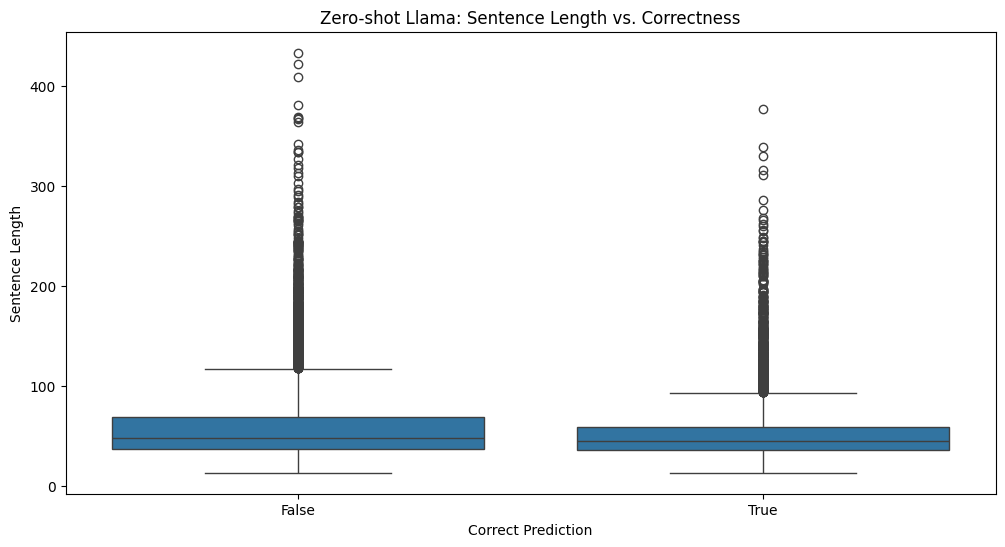

In [ ]:
# Sentence length vs. Correctness for Zero-shot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pred_correct_zero", y="sentence_length", data=df_zero_v_few)
plt.title("Zero-shot Llama: Sentence Length vs. Correctness")
plt.xlabel("Correct Prediction")
plt.ylabel("Sentence Length")

Text(0, 0.5, 'Sentence Length')

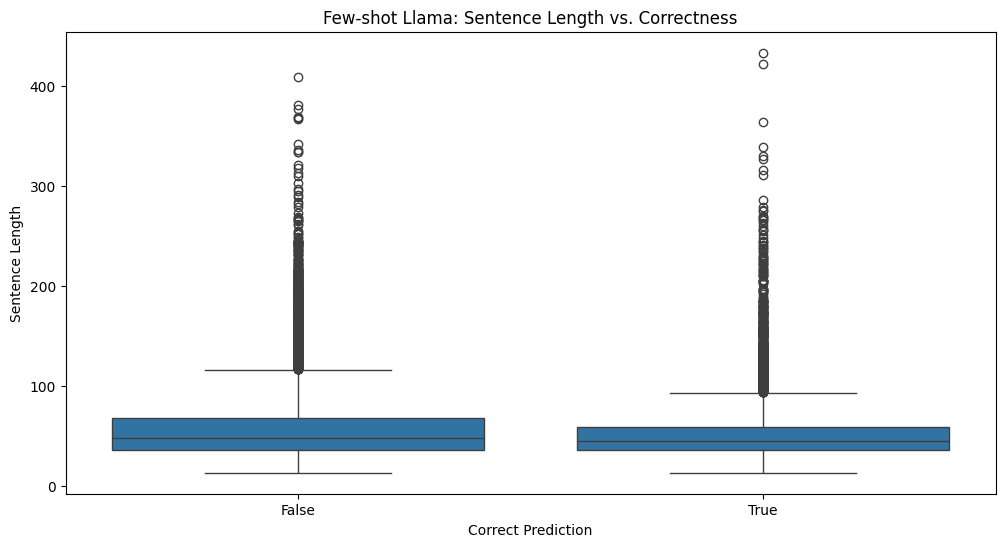

In [ ]:
# Sentence length vs. Correctness for Few-shot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pred_correct_few", y="sentence_length", data=df_zero_v_few)
plt.title("Few-shot Llama: Sentence Length vs. Correctness")
plt.xlabel("Correct Prediction")
plt.ylabel("Sentence Length")

### 3. Error Overlap Analysis

In [ ]:
# Reload df_zero_v_few if not already in scope
df_zero_v_few = pd.read_csv("/content/df_zero_v_few_with_errors.csv")

# Both models fail
both_fail = df_zero_v_few[(df_zero_v_few["pred_correct_zero"] == False) & (df_zero_v_few["pred_correct_few"] == False)]
print(f"\nNumber of sentences where both models fail: {len(both_fail)}")

# Zero-shot fails, Few-shot correct
zeroshot_fail_fewshot_correct = df_zero_v_few[(df_zero_v_few["pred_correct_zero"] == False) & (df_zero_v_few["pred_correct_few"] == True)]
print(f"Number of sentences where Zero-shot fails and Few-shot is correct: {len(zeroshot_fail_fewshot_correct)}")

# Few-shot fails, Zero-shot correct
fewshot_fail_zeroshot_correct = df_zero_v_few[(df_zero_v_few["pred_correct_zero"] == True) & (df_zero_v_few["pred_correct_few"] == False)]
print(f"Number of sentences where Few-shot fails and Zero-shot is correct: {len(fewshot_fail_zeroshot_correct)}")

# Examples of each case (first 5)
print("\nExamples where both models fail (first 5):\n")
for text in both_fail["text"].head(5).tolist():
    print(f"- {text}")

print("\nExamples where Zero-shot fails and Few-shot is correct (first 5):\n")
for text in zeroshot_fail_fewshot_correct["text"].head(5).tolist():
    print(f"- {text}")

print("\nExamples where Few-shot fails and Zero-shot is correct (first 5):\n")
for text in fewshot_fail_zeroshot_correct["text"].head(5).tolist():
    print(f"- {text}")

# Save these dataframes for further inspection if needed
both_fail.to_csv("/content/both_fail.csv", index=False)
zeroshot_fail_fewshot_correct.to_csv("/content/zeroshot_fail_fewshot_correct.csv", index=False)
fewshot_fail_zeroshot_correct.to_csv("/content/fewshot_fail_zeroshot_correct.csv", index=False)

print("Error overlap analysis dataframes saved to /content/")


Number of sentences where both models fail: 5533
Number of sentences where Zero-shot fails and Few-shot is correct: 840
Number of sentences where Few-shot fails and Zero-shot is correct: 932

Examples where both models fail (first 5):

- Could you help my figure out the exchange fee?
- Is there an extra charge to exchange different currencies?
- I deposited some money, but the balance has not changed.
- What are the currency types that I can keep money in.
- Please help me, there is a transaction in the incorrect account.

Examples where Zero-shot fails and Few-shot is correct (first 5):

- Hello - I'm on the app and trying to purchase crypto. It's not going through. What am I doing wrong?
- Can I use my account before my Identity verification has passed?
- I didn't get all the cash I asked for
- need help with google pay top up
- What's the process for topping up by card?

Examples where Few-shot fails and Zero-shot is correct (first 5):

- When traveling, is it possible for it to ad

In [ ]:
fewshot_fail_zeroshot_correct

text  \
91     When traveling, is it possible for it to add m...   
102                    Verifying top-up cards necessary?   
104     What would be a reason my transfer got declined?   
112    I no longer have my phone with the app, what s...   
149                Should my top-up be completed by now?   
...                                                  ...   
13008  How many times can I use the disposable virtua...   
13025          Is there a verification code for top-ups?   
13035  The rate for a currency exchange was wrong whe...   
13068  I have got out the wrong amount from an ATM. P...   
13071    How many days does a transfer from the US take?   

                             label_orig                        label_zero  \
91                     automatic_top_up                  automatic_top_up   
102                       verify_top_up                     verify_top_up   
104                   declined_transfer                 declined_transfer   
112                lost_or_stolen_phone              lost_or_stolen_phone   
149                      pending_top_up                    pending_top_up   
...                                 ...                               ...   
13008            disposable_card_limits            disposable_card_limits   
13025                     verify_top_up                     verify_top_up   
13035  card_payment_wrong_exchange_rate  card_payment_wrong_exchange_rate   
13068     wrong_amount_of_cash_received     wrong_amount_of_cash_received   
13071                   transfer_timing                   transfer_timing   

                              pred_zero  confidence_zero  oos_zero  \
91                     automatic_top_up            100.0     False   
102                       verify_top_up            100.0     False   
104                   declined_transfer            100.0     False   
112                lost_or_stolen_phone            100.0     False   
149                      pending_top_up            100.0     False   
...                                 ...              ...       ...   
13008            disposable_card_limits            100.0     False   
13025                     verify_top_up            100.0     False   
13035  card_payment_wrong_exchange_rate            100.0     False   
13068     wrong_amount_of_cash_received            100.0     False   
13071                   transfer_timing            100.0     False   

       pred_correct_zero                         label_few  \
91                  True                  automatic_top_up   
102                 True                     verify_top_up   
104                 True                 declined_transfer   
112                 True              lost_or_stolen_phone   
149                 True                    pending_top_up   
...                  ...                               ...   
13008               True            disposable_card_limits   
13025               True                     verify_top_up   
13035               True  card_payment_wrong_exchange_rate   
13068               True     wrong_amount_of_cash_received   
13071               True                   transfer_timing   

                                      pred_few  confidence_few  oos_few  \
91                       top_up_by_card_charge            80.0    False   
102                get_disposable_virtual_card            80.0    False   
104                      declined_card_payment            80.0    False   
112                        lost_or_stolen_card           100.0    False   
149                              top_up_limits            80.0    False   
...                                        ...             ...      ...   
13008                            top_up_limits            80.0    False   
13025              get_disposable_virtual_card            80.0    False   
13035  wrong_exchange_rate_for_cash_withdrawal            80.0    False   
13068           cash_withdrawal_not_recognised            80.0    Fals

In [ ]:
zeroshot_fail_fewshot_correct

text  \
2      Hello - I'm on the app and trying to purchase ...   
14     Can I use my account before my Identity verifi...   
28                 I didn't get all the cash I asked for   
59                      need help with google pay top up   
83            What's the process for topping up by card?   
...                                                  ...   
13034  Why is my ATM cash withdrawal showing up as a ...   
13046    How do I know which ATMs will accept this card?   
13065      I do not remember the code, what should I do?   
13069     How long will it take to activate my new card?   
13073                          Where do I order my card?   

                          label_orig                     label_zero  \
2            beneficiary_not_allowed        beneficiary_not_allowed   
14               why_verify_identity            why_verify_identity   
28     wrong_amount_of_cash_received  wrong_amount_of_cash_received   
59           apple_pay_or_google_pay        apple_pay_or_google_pay   
83                topping_up_by_card             topping_up_by_card   
...                              ...                            ...   
13034        pending_cash_withdrawal        pending_cash_withdrawal   
13046                    atm_support                    atm_support   
13065             passcode_forgotten             passcode_forgotten   
13069               activate_my_card               activate_my_card   
13073            order_physical_card            order_physical_card   

                                pred_zero  confidence_zero  oos_zero  \
2             card_payment_not_recognised             90.0     False   
14              unable_to_verify_identity            100.0     False   
28     transfer_not_received_by_recipient            100.0     False   
59            get_disposable_virtual_card             80.0     False   
83                  top_up_by_card_charge            100.0     False   
...                                   ...              ...       ...   
13034      cash_withdrawal_not_recognised             80.0     False   
13046                     card_acceptance            100.0     False   
13065                                 oos              0.0     False   
13069                        card_linking             50.0     False   
13073                   get_physical_card            100.0     False   

       pred_correct_zero                      label_few  \
2                  False        beneficiary_not_allowed   
14                 False            why_verify_identity   
28                 False  wrong_amount_of_cash_received   
59                 False        apple_pay_or_google_pay   
83                 False             topping_up_by_card   
...                  ...                            ...   
13034              False        pending_cash_withdrawal   
13046              False                    atm_support   
13065              False             passcode_forgotten   
13069              False               activate_my_card   
13073              False            order_physical_card   

                            pred_few  confidence_few  oos_few  \
2            beneficiary_not_allowed            60.0    False   
14               why_verify_identity            65.0    False   
28     wrong_amount_of_cash_received            80.0    False   
59           apple_pay_or_google_pay           100.0    False   
83                topping_up_by_card           100.0    False   
...                              ...             ...      ...   
13034        pending_cash_withdrawal            98.0    False   
13046                    atm_support           100.0    False   
13065             passcode_forgotten            80.0    False   
13069               activate_my_card           100.0    False   
13073            order_physical_card           100.0    False   

       pred_correct_few  dataset  split               zeroshot_error_category  \
2                  True  banking  train  M

# [25% Curated OOS] Few-shot llama3.2:3b vs QWEN3-30B-A3B
```
# 2025.06.16 onwards - group 25% of similar classes into oos (to minimise misclassifications)
# banking77 - 25% focus on foreign currency support, exchange rate, card payments, extra charge
oos_banking_25perc = [2, 10, 14, 15, 16, 17, 19, 25, 31, 32, 33, 34, 36, 52, 53, 54, 57, 73, 76]
```
* to view the idx2label mapping, please refer to https://huggingface.co/spaces/KaiquanMah/open-intent-query-classification/blob/main/dataset_idx2label/banking77_idx2label.csv

In [ ]:
oos_banking_25perc = [2, 10, 14, 15, 16, 17, 19, 25, 31, 32, 33, 34, 36, 52, 53, 54, 57, 73, 76]
list_oos_labels = list(df_idx2label[df_idx2label['index'].isin(oos_banking_25perc)]['label'].values)
list_oos_labels


['apple_pay_or_google_pay',
 'card_acceptance',
 'card_not_working',
 'card_payment_fee_charged',
 'card_payment_not_recognised',
 'card_payment_wrong_exchange_rate',
 'cash_withdrawal_charge',
 'declined_card_payment',
 'exchange_charge',
 'exchange_rate',
 'exchange_via_app',
 'extra_charge_on_statement',
 'fiat_currency_support',
 'request_refund',
 'reverted_card_payment?',
 'supported_cards_and_currencies',
 'top_up_by_card_charge',
 'visa_or_mastercard',
 'wrong_exchange_rate_for_cash_withdrawal']

In [ ]:
fewshot_llama = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/03_fewshot_llama.csv")
fewshot_llama.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
fewshot_llama

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                                               oos  banking   test   

                       predicted  confidence  convert_to_oos  \
0      unable_to_verify_identity        0.00            True   
1      unable_to_verify_identity       80.00           False   
2      unable_to_verify_identity        0.00           False   
3               pending_transfer       98.00           False   
4                transfer_timing        0.00            True   
...                          ...         ...             ...   
13078              verify_top_up       99.87           False   
13079              top_up_failed       99.00           False   
13080                  age_limit       18.00           False   
13081            transfer_timing       74.52           False   
13082  unable_to_verify_identity       80.00            True   

       predicted_correct  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
...                  ...  
13078               True  
13079              False  
13080               True  
13081              False  
13082              False  

[13083 rows x 8 columns]

In [ ]:
fewshot_qwen = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/04_fewshot_qwen.csv")
fewshot_qwen.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
fewshot_qwen

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                                               oos  banking   test   

                                              predicted  confidence  \
0                                                   oos        0.00   
1      balance_not_updated_after_cheque_or_cash_deposit       92.51   
2                                                   oos        0.00   
3                                  pending_card_payment       62.03   
4                                  transfer_fee_charged       41.84   
...                                                 ...         ...   
13078                                     verify_top_up       99.87   
13079                    top_up_by_bank_transfer_charge        6.14   
13080                                         age_limit       26.75   
13081                                  pending_transfer       61.36   
13082               direct_debit_payment_not_recognised       76.46   

       convert_to_oos  predicted_correct  
0                True               True  
1               False               True  
2               False              False  
3               False               True  
4                True              False  
...               ...                ...  
13078           False               True  
13079           False               True  
13080           False               True  
13081           False              False  
13082            True              False  

[13083 rows x 8 columns]

In [ ]:
fewshot_qwen_w_predictions = fewshot_qwen.copy()
fewshot_qwen_w_predictions.drop(columns = ['text', 'dataset', 'split'], inplace = True)
fewshot_qwen_w_predictions

label  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                                               oos   

                                              predicted  confidence  \
0                                                   oos        0.00   
1      balance_not_updated_after_cheque_or_cash_deposit       92.51   
2                                                   oos        0.00   
3                                  pending_card_payment       62.03   
4                                  transfer_fee_charged       41.84   
...                                                 ...         ...   
13078                                     verify_top_up       99.87   
13079                    top_up_by_bank_transfer_charge        6.14   
13080                                         age_limit       26.75   
13081                                  pending_transfer       61.36   
13082               direct_debit_payment_not_recognised       76.46   

       convert_to_oos  predicted_correct  
0                True               True  
1               False               True  
2               False              False  
3               False               True  
4                True              False  
...               ...                ...  
13078           False               True  
13079           False               True  
13080           False               True  
13081           False              False  
13082            True              False  

[13083 rows x 5 columns]

In [ ]:
df_few_llama_v_qwen = pd.concat([df_label, fewshot_llama, fewshot_qwen_w_predictions], axis=1)
df_few_llama_v_qwen.columns=["label_orig", "text", "label_llama", "dataset", "split",
                       "pred_llama", "confidence_llama", "oos_llama", "pred_correct_llama",
                       "label_qwen", "pred_qwen", "confidence_qwen", "oos_qwen", "pred_correct_qwen"]
df_few_llama_v_qwen = df_few_llama_v_qwen[["text", "label_orig",
                               "label_llama", "pred_llama", "confidence_llama", "oos_llama", "pred_correct_llama",
                               "label_qwen", "pred_qwen", "confidence_qwen", "oos_qwen", "pred_correct_qwen",
                               "dataset", "split"]]

df_few_llama_v_qwen

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                             label_orig  \
0                                       exchange_charge   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                       exchange_charge   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                            label_llama  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                                               oos   

                      pred_llama  confidence_llama  oos_llama  \
0      unable_to_verify_identity              0.00       True   
1      unable_to_verify_identity             80.00      False   
2      unable_to_verify_identity              0.00      False   
3               pending_transfer             98.00      False   
4                transfer_timing              0.00       True   
...                          ...               ...        ...   
13078              verify_top_up             99.87      False   
13079              top_up_failed             99.00      False   
13080                  age_limit             18.00      False   
13081            transfer_timing             74.52      False   
13082  unable_to_verify_identity             80.00       True   

       pred_correct_llama                                        label_qwen  \
0                   False                                               oos   
1                   False  balance_not_updated_after_cheque_or_cash_deposit   
2                   False                           beneficiary_not_allowed   
3                   False                              pending_card_payment   
4                   False                                               oos   
...                   ...                                               ...   
13078                True                                     verify_top_up   
13079               False                    top_up_by_bank_transfer_charge   
13080                True                                         age_limit   
13081               False                transfer_not_received_by_recipient   
13082               False                                               oos   

                                              pred_qwen  confidence_qwen  \
0                                                   oos             0.00   
1      balance_not_updated_afte

## OOS

In [ ]:
# performance of oos classes
df_few_llama_v_qwen_filtered_oos = df_few_llama_v_qwen[df_few_llama_v_qwen['label_orig'].isin(list_oos_labels)]
df_few_llama_v_qwen_filtered_oos

text  \
0         Could you help my figure out the exchange fee?   
4      Is there an extra charge to exchange different...   
8                What card or currency can I use to pay?   
16                          I got billed an extra pound!   
18     What are the currency types that I can keep mo...   
...                                                  ...   
13056  Why was I charged an extra fee when using a card?   
13059  Does it cost to exchange currencies with this ...   
13066               I got a extra €1 fee in my statement   
13077  In receiving cash, the wrong exchange rate was...   
13082                im not sure what this charge is for   

                                    label_orig label_llama  \
0                              exchange_charge         oos   
4                              exchange_charge         oos   
8               supported_cards_and_currencies         oos   
16                   extra_charge_on_statement         oos   
18                       fiat_currency_support         oos   
...                                        ...         ...   
13056                 card_payment_fee_charged         oos   
13059                          exchange_charge         oos   
13066                extra_charge_on_statement         oos   
13077  wrong_exchange_rate_for_cash_withdrawal         oos   
13082                 card_payment_fee_charged         oos   

                          pred_llama  confidence_llama  oos_llama  \
0          unable_to_verify_identity              0.00       True   
4                    transfer_timing              0.00       True   
8             card_delivery_estimate              0.00       True   
16     wrong_amount_of_cash_received             95.11       True   
18                   country_support              0.00       True   
...                              ...               ...        ...   
13056                transfer_timing             92.56       True   
13059                country_support              0.00       True   
13066  wrong_amount_of_cash_received             96.00       True   
13077  wrong_amount_of_cash_received             87.03       True   
13082      unable_to_verify_identity             80.00       True   

       pred_correct_llama label_qwen                            pred_qwen  \
0                   False        oos                                  oos   
4                   False        oos                 transfer_fee_charged   
8                   False        oos                                  oos   
16                  False        oos            transaction_charged_twice   
18                  False        oos                                  oos   
...                   ...        ...                                  ...   
13056               False        oos                 transfer_fee_charged   
13059               False        oos                                  oos   
13066               False        oos                 transfer_fee_charged   
13077               False        oos       cash_withdrawal_not_recognised   
13082               False        oos  direct_debit_payment_not_recognised   

       confidence_qwen  oos_qwen  pred_correct_qwen  dataset  split  
0                 0.00      True               True  banking  train  
4                41.84      True              False  banking  train  
8                 0.00      True               True  banking  train  
16               78.33      True              False  banking  train  
18                0.00      True               True  banking  train  
...                ...       ...                ...      ...    ...  
13056            41.84      True              False  banking   test  
13059             0.00      True               True  banking   test  
13066            50.63      True              False  banking   test  
13077            45.23      True              False  banking   test  
13082            76.46      True              False  banking  

In [ ]:
total_rows = len(df_few_llama_v_qwen_filtered_oos)
percentage_pred_correct_llama = (df_few_llama_v_qwen_filtered_oos['pred_correct_llama'].sum() / total_rows) * 100
percentage_pred_correct_qwen = (df_few_llama_v_qwen_filtered_oos['pred_correct_qwen'].sum() / total_rows) * 100

print(f"Percentage of rows with percentage_pred_correct_llama: {percentage_pred_correct_llama:.2f}%")
print(f"Percentage of rows with percentage_pred_correct_qwen: {percentage_pred_correct_qwen:.2f}%")

Percentage of rows with percentage_pred_correct_llama: 0.03%
Percentage of rows with percentage_pred_correct_qwen: 43.82%


In [ ]:
percentage_correct_llama_by_label_oos = df_few_llama_v_qwen_filtered_oos.groupby('label_orig')['pred_correct_llama'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_llama' by original OOS label:")
display(percentage_correct_llama_by_label_oos)

percentage_correct_qwen_by_label_oos = df_few_llama_v_qwen_filtered_oos.groupby('label_orig')['pred_correct_qwen'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("\nPercentage of correct predictions for 'pred_correct_qwen' by original OOS label:")
display(percentage_correct_qwen_by_label_oos)

Percentage of correct predictions for 'pred_correct_llama' by original OOS label:


label_orig
apple_pay_or_google_pay                    0.000000
card_acceptance                            0.000000
card_not_working                           0.000000
card_payment_fee_charged                   0.000000
card_payment_not_recognised                0.000000
card_payment_wrong_exchange_rate           0.000000
cash_withdrawal_charge                     0.000000
declined_card_payment                      0.000000
exchange_charge                            0.000000
exchange_rate                              0.000000
exchange_via_app                           0.000000
extra_charge_on_statement                  0.000000
fiat_currency_support                      0.000000
request_refund                             0.000000
reverted_card_payment?                     0.000000
supported_cards_and_currencies             0.591716
top_up_by_card_charge                      0.000000
visa_or_mastercard                         0.000000
wrong_exchange_rate_for_cash_withdrawal    0.000000
Name: True, dtype: float64


Percentage of correct predictions for 'pred_correct_qwen' by original OOS label:


label_orig
apple_pay_or_google_pay                    80.722892
card_acceptance                            49.494949
card_not_working                           30.263158
card_payment_fee_charged                    9.251101
card_payment_not_recognised                 0.480769
card_payment_wrong_exchange_rate           80.193237
cash_withdrawal_charge                      6.451613
declined_card_payment                       1.554404
exchange_charge                            94.409938
exchange_rate                              99.342105
exchange_via_app                           97.468354
extra_charge_on_statement                   3.398058
fiat_currency_support                      75.301205
request_refund                             37.799043
reverted_card_payment?                      6.965174
supported_cards_and_currencies             46.153846
top_up_by_card_charge                      25.974026
visa_or_mastercard                         91.428571
wrong_exchange_rate_for_cash_withdrawal    52.216749
Name: True, dtype: float64

#### [GD - Qwen 30B larger model has greater capacity to relate sentences to classes, than llama3.2:3b] All OOS classes

In [ ]:
comparison_df_oos = pd.concat([percentage_correct_llama_by_label_oos, percentage_correct_qwen_by_label_oos], axis=1)
comparison_df_oos.columns = ['llama_correct_percentage', 'qwen_correct_percentage']
comparison_df_oos["qwen_minus_llama"] = comparison_df_oos["qwen_correct_percentage"] - comparison_df_oos["llama_correct_percentage"]
comparison_df_oos["qwen_higher"] = comparison_df_oos["qwen_minus_llama"] > 0
comparison_df_oos = comparison_df_oos.sort_values(by="qwen_minus_llama", ascending=False)
comparison_df_oos

llama_correct_percentage  \
label_orig                                                          
exchange_rate                                            0.000000   
exchange_via_app                                         0.000000   
exchange_charge                                          0.000000   
visa_or_mastercard                                       0.000000   
apple_pay_or_google_pay                                  0.000000   
card_payment_wrong_exchange_rate                         0.000000   
fiat_currency_support                                    0.000000   
wrong_exchange_rate_for_cash_withdrawal                  0.000000   
card_acceptance                                          0.000000   
supported_cards_and_currencies                           0.591716   
request_refund                                           0.000000   
card_not_working                                         0.000000   
top_up_by_card_charge                                    0.000000   
card_payment_fee_charged                                 0.000000   
reverted_card_payment?                                   0.000000   
cash_withdrawal_charge                                   0.000000   
extra_charge_on_statement                                0.000000   
declined_card_payment                                    0.000000   
card_payment_not_recognised                              0.000000   

                                         qwen_correct_percentage  \
label_orig                                                         
exchange_rate                                          99.342105   
exchange_via_app                                       97.468354   
exchange_charge                                        94.409938   
visa_or_mastercard                                     91.428571   
apple_pay_or_google_pay                                80.722892   
card_payment_wrong_exchange_rate                       80.193237   
fiat_currency_support                                  75.301205   
wrong_exchange_rate_for_cash_withdrawal                52.216749   
card_acceptance                                        49.494949   
supported_cards_and_currencies                         46.153846   
request_refund                                         37.799043   
card_not_working                                       30.263158   
top_up_by_card_charge                                  25.974026   
card_payment_fee_charged                                9.251101   
reverted_card_payment?                                  6.965174   
cash_withdrawal_charge                                  6.451613   
extra_charge_on_statement                               3.398058   
declined_card_payment                                   1.554404   
card_payment_not_recognised                             0.480769   

                                         qwen_minus_llama  qwen_higher  
label_orig                                                              
exchange_rate                                   99.342105         True  
exchange_via_app                                97.468354         True  
exchange_charge                                 94.409938         True  
visa_or_mastercard                              91.428571         True  
apple_pay_or_google_pay                         80.722892         True  
card_payment_wrong_exchange_rate                80.193237         True  
fiat_currency_support                           75.301205         True  
wrong_exchange_rate_for_cash_withdrawal         52.216749         True  
card_acceptance                                 49.494949         True  
supported_cards_and_currencies                  45.562130         True  
request_refund                                  37.799043         True  
card_not_working                                30.263158         True  
top_up_by_card_charge                           25.974026         True  
card_payment_fee_charged                         9.251101         T

### [OK - need clearer categories] qwen (80%) much better than llama (0%) - card_payment_wrong_exchange_rate (part of oos)

In [ ]:
df_card_payment_wrong_exchange_rate = df_few_llama_v_qwen_filtered_oos[df_few_llama_v_qwen_filtered_oos.label_orig == 'card_payment_wrong_exchange_rate']
df_both_wrong = df_card_payment_wrong_exchange_rate[(df_card_payment_wrong_exchange_rate.pred_correct_llama == False) & \
                                                    (df_card_payment_wrong_exchange_rate.pred_correct_qwen == False)]

# method 1
# df_llama_wrong_qwen_correct = df_card_payment_wrong_exchange_rate[(df_card_payment_wrong_exchange_rate.pred_correct_llama == False) & \
#                                                                   (df_card_payment_wrong_exchange_rate.pred_correct_qwen == True)]
# df_llama_correct_qwen_wrong = df_card_payment_wrong_exchange_rate[(df_card_payment_wrong_exchange_rate.pred_correct_llama == True) & \
#                                                                   (df_card_payment_wrong_exchange_rate.pred_correct_qwen == False)]
# method 2
df_llama_wrong_qwen_correct = df_card_payment_wrong_exchange_rate[df_card_payment_wrong_exchange_rate.pred_correct_qwen > df_card_payment_wrong_exchange_rate.pred_correct_llama]
df_llama_correct_qwen_wrong = df_card_payment_wrong_exchange_rate[df_card_payment_wrong_exchange_rate.pred_correct_llama > df_card_payment_wrong_exchange_rate.pred_correct_qwen]

# df_card_payment_wrong_exchange_rate
len(df_both_wrong), len(df_llama_wrong_qwen_correct), len(df_llama_correct_qwen_wrong)

(41, 166, 0)

In [ ]:
df_both_wrong

text  \
336    I'm going on a trip soon and I needed to conve...   
590    I seem to have been charged to much for my hol...   
879    The fee charged when I changed rubles into Bri...   
1082   The rate applied to my purchase in a foreign c...   
1244   It seems that something went wrong with my exc...   
1406   I noticed an extra charge on the purchase that...   
1793     I am being charged the wrong amount on my card.   
1817   I feel as though I have been over charged for ...   
1949   Why was I charged a higher exchange rate when ...   
2391   Seems like the exchange rate for my payment la...   
2612   I  have been charged more than I should for th...   
2648   Why am I being charged the wrong currency exch...   
2683          I was charged the wing amount for an item.   
3718   Please check my payment from last Saturday as ...   
3861   I changed the currency, but why is it costing ...   
4264   I was charged extra. Was the exchange rate for...   
4795   I believe you charged me too much to exchange ...   
5016   I think there has been a mistake on my exchang...   
5310   I don't think the charges made when I had curr...   
5593   Last Saturday, I was charged extra for the exc...   
5756   Was I charged more than I should of been for a...   
6176   I have been overcharged. I just changed over R...   
6539   Why did you charge me more for my purchase? It...   
6686   I have been charged to much for the object I b...   
6958   Why am I being charged more on exchange with t...   
6963   I think the rate that was applied to my purcha...   
7578   The currency exchange for my purchase in forei...   
8064   I guess exchange rate for my payment was not c...   
8164   I think that the exchange rate was wrong for t...   
8522   Why was I charged extra on my last UK pound to...   
8888   When I purchased a product in another country ...   
9307   The exchange rate for my payment last Saturday...   
9326   I think I was charged extra on my payment on l...   
10350  I wasn't applied the correct exchange rate for...   
10407  My exchange went wrong. I swapped Russian Rubl...   
10517  I'm pretty sure something went wrong with my e...   
10593                      Why am I being charged more ?   
10660  Hi, I have been overcharged for my payment las...   
10676  When I made a purchase last Saturday, I was ch...   
12163  They charged me wrong for a currency exchange ...   
12963  I made a currency exchange and think I was cha...   

                             label_orig label_llama  \
336    card_payment_wrong_exchange_rate         oos   
590    card_payment_wrong_exchange_rate         oos   
879    card_payment_wrong_exchange_rate         oos   
1082   card_payment_wrong_exchange_rate         oos   
1244   card_payment_wrong_exchange_rate         oos   
1406   card_payment_wrong_exchange_rate         oos   
1793   card_payment_wrong_exchange_rate         oos   
1817   card_payment_wrong_exchange_rate         oos   
1949   card_payment_wrong_exchange_rate         oos   
2391   card_payment_wrong_exchange_rate         oos   
2612   card_payment_wrong_exchange_rate         oos   
2648   card_payment_wrong_exchange_rate         oos   
2683   card_payment_wrong_exchange_rate         oos   
3718   card_payment_wrong_exchange_rate         oos   
3861   card_payment_wrong_exchange_rate         oos   
4264   card_payment_wrong_exchange_rate         oos   
4795   card_payment_wrong_exchange_rate         oos   
5016   card_payment_wrong_exchange_rate         oos   
5310   card_payment_wrong_exchange_rate         oos   
5593   card_payment_wrong_exchange_rate         oos   
5756   card_payment_wrong_exchange_rate         oos   
6176   card_payment_wrong_exchange_rate         oos   
6539   card_payment_wrong_exchange_rate         oos   
6686   card_payment_wrong_exchange_rate         oos   
6958   card_payment_wrong_exchange_rate         oos   
6963   card_payment_wrong_exchange_rate         oos   
7578   card_payment_wrong_exchange_rate       

In [ ]:
llama_pred_counts = df_both_wrong['pred_llama'].value_counts(normalize=True).mul(100)
qwen_pred_counts = df_both_wrong['pred_qwen'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts, qwen_pred_counts], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'qwen_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["qwen_minus_llama"] = comparison_pred_counts["qwen_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="qwen_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


llama_pred_percentage  qwen_pred_percentage  \
transaction_charged_twice                   0.000000             70.731707   
transfer_fee_charged                        0.000000             29.268293   
why_verify_identity                         2.439024              0.000000   
unable_to_verify_identity                  19.512195              0.000000   
wrong_amount_of_cash_received              29.268293              0.000000   
transfer_timing                            48.780488              0.000000   

                               qwen_minus_llama  
transaction_charged_twice             70.731707  
transfer_fee_charged                  29.268293  
why_verify_identity                   -2.439024  
unable_to_verify_identity            -19.512195  
wrong_amount_of_cash_received        -29.268293  
transfer_timing                      -48.780488

In [ ]:
both_wrong_texts = df_both_wrong['text'].tolist()

print("List of 'text' strings where llama AND qwen both incorrectly misclassified to other classes instead of 'card_payment_wrong_exchange_rate':")
display(both_wrong_texts)

List of 'text' strings where llama AND qwen both incorrectly misclassified to other classes instead of 'card_payment_wrong_exchange_rate':


["I'm going on a trip soon and I needed to convert my Russian ruble to UK pounds, but when I did, your company charged me above the exchange rate. Did you mess up my transaction?",
 'I seem to have been charged to much for my holiday purchases, the exchange rate is wrong.',
 'The fee charged when I changed rubles into British pounds was too much.',
 'The rate applied to my purchase in a foreign currency was wrong.',
 'It seems that something went wrong with my exchange. I changed Russian Ruble into UK pounds but have been charged entirely too much!',
 'I noticed an extra charge on the purchase that I made last Saturday on my account. Can you see if I received the correct exchange rate?',
 'I am being charged the wrong amount on my card.',
 'I feel as though I have been over charged for the exchange rate on my payment on last Saturday.',
 'Why was I charged a higher exchange rate when I bought something abroad?',
 'Seems like the exchange rate for my payment last Saturday was wrong. I w

From the input sentences above where both llama and qwen were incorrect,
* some sentences should have their original class labels updated
```
'I made a currency exchange and think I was charged more than I should of been.',
Misclassified as transaction_charged_twice. This sentence should not be part of a card payment! It does seem to be an 'exchange_rate' issue which has been converted to 'oos' class. So Qwen tried to force into a known/remaining exchange rate class
```
* some sentences are ambiguous and could possibly belong to the class predicted by qwen. Even humans might have classified as a class other than the expected class 'card_payment_wrong_exchange_rate' (which is in the 25% of 'oos' classes)
```
"I'm going on a trip soon and I needed to convert my Russian ruble to UK pounds, but when I did, your company charged me above the exchange rate. Did you mess up my transaction?",
Misclassified as 'transfer_fee_charged'. It seemed like there were extra charges or fees on top of the currency exchange. So Qwen classified as a class related to fee. Maybe a more appropriate class label for this sentence is 'exchange_rate'
====================================
'When I made a purchase last Saturday, I was charged extra. Did I receive the right exchange rate?',
Misclassified as transaction_charged_twice. 'charged extra' was ambiguous on what sort of extra charges were discovered, so it is fair that the model misclassified as 'transaction_charged_twice'
====================================
'They charged me wrong for a currency exchange on a purchase.',
Misclassified as transaction_charged_twice. Maybe the lack of the word 'card' led the model to misclassify
```

In [ ]:
df_llama_wrong_qwen_correct

text  \
127    I received the wrong exchange rate for an item...   
222    Hello, I believe there has been a mistake made...   
234    An item I bought had the wrong exchange rate a...   
236    The exchange rate you are using is really bad....   
308    I wasn't charged the correct exchange rate for...   
...                                                  ...   
12946  Why is the exchange rate wrong when I purchase...   
12968  I paid for something in foreign currency but n...   
12976  The rate of exchange for my card payment is in...   
13035  The rate for a currency exchange was wrong whe...   
13054  I don't think my card payment exchange rate is...   

                             label_orig label_llama  \
127    card_payment_wrong_exchange_rate         oos   
222    card_payment_wrong_exchange_rate         oos   
234    card_payment_wrong_exchange_rate         oos   
236    card_payment_wrong_exchange_rate         oos   
308    card_payment_wrong_exchange_rate         oos   
...                                 ...         ...   
12946  card_payment_wrong_exchange_rate         oos   
12968  card_payment_wrong_exchange_rate         oos   
12976  card_payment_wrong_exchange_rate         oos   
13035  card_payment_wrong_exchange_rate         oos   
13054  card_payment_wrong_exchange_rate         oos   

                          pred_llama  confidence_llama  oos_llama  \
127                  transfer_timing             92.56       True   
222                  transfer_timing              0.00       True   
234    wrong_amount_of_cash_received             95.11       True   
236        unable_to_verify_identity              0.00       True   
308                  transfer_timing             92.00       True   
...                              ...               ...        ...   
12946                transfer_timing             92.56       True   
12968                transfer_timing             92.56       True   
12976                transfer_timing              0.00       True   
13035  wrong_amount_of_cash_received             95.11       True   
13054      unable_to_verify_identity              0.00       True   

       pred_correct_llama label_qwen pred_qwen  confidence_qwen  oos_qwen  \
127                 False        oos       oos              0.0      True   
222                 False        oos       oos              0.0      True   
234                 False        oos       oos              0.0      True   
236                 False        oos       oos              0.0      True   
308                 False        oos       oos              0.0      True   
...                   ...        ...       ...              ...       ...   
12946               False        oos       oos              0.0      True   
12968               False        oos       oos              0.0      True   
12976               False        oos       oos              0.0      True   
13035               False        oos       oos              0.0      True   
13054               False        oos       oos              0.0      True   

       pred_correct_qwen  dataset  split  
127                 True  banking  train  
222                 True  banking  train  
234                 True  banking  train  
236                 True  banking  train  
308                 True  banking  train  
...                  ...      ...    ...  
12946               True  banking   test  
12968               True  banking   test  
12976               True  banking   test  
13035               True  banking   test  
13054               True  banking   test  

[166 rows x 14 columns]

In [ ]:
llama_pred_counts = df_llama_wrong_qwen_correct['pred_llama'].value_counts(normalize=True).mul(100)
qwen_pred_counts = df_llama_wrong_qwen_correct['pred_qwen'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts, qwen_pred_counts], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'qwen_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["qwen_minus_llama"] = comparison_pred_counts["qwen_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="qwen_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


llama_pred_percentage  qwen_pred_percentage  \
oos                                         0.000000                 100.0   
transaction_charged_twice                   1.204819                   0.0   
card_delivery_estimate                      1.807229                   0.0   
unable_to_verify_identity                  13.855422                   0.0   
wrong_amount_of_cash_received              34.939759                   0.0   
transfer_timing                            48.192771                   0.0   

                               qwen_minus_llama  
oos                                  100.000000  
transaction_charged_twice             -1.204819  
card_delivery_estimate                -1.807229  
unable_to_verify_identity            -13.855422  
wrong_amount_of_cash_received        -34.939759  
transfer_timing                      -48.192771

In [ ]:
# Get unique pred_llama values from df_llama_wrong_qwen_correct
pred_llama_classes = df_llama_wrong_qwen_correct['pred_llama'].unique()

print("Example sentences from df_llama_wrong_qwen_correct (llama wrong, qwen correct):")

# Iterate through each unique pred_llama class and display up to 2 sentences
for pred_class in pred_llama_classes:
    print(f"\nPred Llama Class: {pred_class}")
    sentences = df_llama_wrong_qwen_correct[df_llama_wrong_qwen_correct['pred_llama'] == pred_class]['text'].head(5).tolist()
    for text in sentences:
        print(f"- {text}")

Example sentences from df_llama_wrong_qwen_correct (llama wrong, qwen correct):

Pred Llama Class: transfer_timing
- I received the wrong exchange rate for an item i bought.
- Hello, I believe there has been a mistake made on the exchange rate for my card. Could you please check the official interbank exchange rate for me?
- I wasn't charged the correct exchange rate for an item I purchased.
- I purchased something overseas and the incorrect exchange rate was applied.
- I'm on holiday and I noticed a different amount for exchange rate.  Can you explain?

Pred Llama Class: wrong_amount_of_cash_received
- An item I bought had the wrong exchange rate applied.
- I think the currency exchange that's been applied is wrong.
- Your foreign exchange rate is wrong.
- I purchased an item and the exchange rate was wrong
- something is wrong with my exchange rate charge

Pred Llama Class: unable_to_verify_identity
- The exchange rate you are using is really bad.This can't be the official interbank 

For the sentences above where Qwen correctly classified as 'oos' (where card_payment_wrong_exchange_rate was converted to oos) but llama misclassified
* `transfer_timing, wrong_amount_of_cash_received, unable_to_verify_identity, transaction_charged_twice` lines might have come under 'exchange_rate' instead because they were ambiguous (1) whether they were payments or not, (2) what method of payment was it
* `card_delivery_estimate` lines should indeed come under card_payment_wrong_exchange_rate

### [OK - need clearer category, OK - models tried to force into known classes] qwen as bad as llama; low / <1% accuracy - card_payment_not_recognised (part of oos)

In [ ]:
df_card_payment_not_recognised = df_few_llama_v_qwen_filtered_oos[df_few_llama_v_qwen_filtered_oos.label_orig == 'card_payment_not_recognised']
df_both_wrong = df_card_payment_not_recognised[(df_card_payment_not_recognised.pred_correct_llama == False) & \
                                                    (df_card_payment_not_recognised.pred_correct_qwen == False)]

df_llama_wrong_qwen_correct = df_card_payment_not_recognised[df_card_payment_not_recognised.pred_correct_qwen > df_card_payment_not_recognised.pred_correct_llama]
df_llama_correct_qwen_wrong = df_card_payment_not_recognised[df_card_payment_not_recognised.pred_correct_llama > df_card_payment_not_recognised.pred_correct_qwen]

len(df_both_wrong), len(df_llama_wrong_qwen_correct), len(df_llama_correct_qwen_wrong)


(207, 1, 0)

In [ ]:
df_llama_wrong_qwen_correct

text                   label_orig  \
11321  I'm not familiar with a card payment.  card_payment_not_recognised   

      label_llama                 pred_llama  confidence_llama  oos_llama  \
11321         oos  unable_to_verify_identity              25.0       True   

       pred_correct_llama label_qwen pred_qwen  confidence_qwen  oos_qwen  \
11321               False        oos       oos              0.0      True   

       pred_correct_qwen  dataset split  
11321               True  banking  test

In [ ]:
llama_wrong_qwen_correct_texts = df_llama_wrong_qwen_correct['text'].tolist()

print("List of 'text' strings where llama was wrong but qwen was correctly classifying to 'card_payment_not_recognised':")
display(llama_wrong_qwen_correct_texts)

List of 'text' strings where llama was wrong but qwen was correctly classifying to 'card_payment_not_recognised':


["I'm not familiar with a card payment."]

In [ ]:
# Get labels from df_idx2label
idx_labels = df_idx2label['label'].tolist()

# Find labels in idx_labels that are not in list_oos_labels
classes_in_idx_not_oos = [label for label in idx_labels if label not in list_oos_labels]

print("Classes in df_idx2label but not in list_oos_labels:")
display(classes_in_idx_not_oos)

Classes in df_idx2label but not in list_oos_labels:


['activate_my_card',
 'age_limit',
 'atm_support',
 'automatic_top_up',
 'balance_not_updated_after_bank_transfer',
 'balance_not_updated_after_cheque_or_cash_deposit',
 'beneficiary_not_allowed',
 'cancel_transfer',
 'card_about_to_expire',
 'card_arrival',
 'card_delivery_estimate',
 'card_linking',
 'card_swallowed',
 'cash_withdrawal_not_recognised',
 'change_pin',
 'compromised_card',
 'contactless_not_working',
 'country_support',
 'declined_cash_withdrawal',
 'declined_transfer',
 'direct_debit_payment_not_recognised',
 'disposable_card_limits',
 'edit_personal_details',
 'failed_transfer',
 'get_disposable_virtual_card',
 'get_physical_card',
 'getting_spare_card',
 'getting_virtual_card',
 'lost_or_stolen_card',
 'lost_or_stolen_phone',
 'order_physical_card',
 'passcode_forgotten',
 'pending_card_payment',
 'pending_cash_withdrawal',
 'pending_top_up',
 'pending_transfer',
 'pin_blocked',
 'receiving_money',
 'refund_not_showing_up',
 'terminate_account',
 'top_up_by_bank_tra

For the above sentence
* It should be under a new class called 'teach_users'
* Qwen was correct in classifying the 'card_payment_not_recognised' example as  'oos'
```
["I'm not familiar with a card payment."]
```

In [ ]:
llama_pred_counts = df_both_wrong['pred_llama'].value_counts(normalize=True).mul(100)
qwen_pred_counts = df_both_wrong['pred_qwen'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts, qwen_pred_counts], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'qwen_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["qwen_minus_llama"] = comparison_pred_counts["qwen_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="qwen_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


llama_pred_percentage  \
cash_withdrawal_not_recognised                    0.000000   
compromised_card                                  0.000000   
transaction_charged_twice                         0.000000   
direct_debit_payment_not_recognised               0.000000   
pending_card_payment                              0.000000   
why_verify_identity                               0.483092   
card_about_to_expire                              0.483092   
transfer_timing                                   1.932367   
transfer_not_received_by_recipient                2.415459   
wrong_amount_of_cash_received                     4.347826   
virtual_card_not_working                          4.830918   
unable_to_verify_identity                        85.507246   

                                     qwen_pred_percentage  qwen_minus_llama  
cash_withdrawal_not_recognised                  57.004831         57.004831  
compromised_card                                23.671498         23.671498  
transaction_charged_twice                       12.560386         12.560386  
direct_debit_payment_not_recognised              5.797101          5.797101  
pending_card_payment                             0.966184          0.966184  
why_verify_identity                              0.000000         -0.483092  
card_about_to_expire                             0.000000         -0.483092  
transfer_timing                                  0.000000         -1.932367  
transfer_not_received_by_recipient               0.000000         -2.415459  
wrong_amount_of_cash_received                    0.000000         -4.347826  
virtual_card_not_working                         0.000000         -4.830918  
unable_to_verify_identity                        0.000000        -85.507246

In [ ]:
target_classes = ['cash_withdrawal_not_recognised', 'unable_to_verify_identity']

print("Example sentences and predictions from df_both_wrong where either pred_llama or pred_qwen is in the target classes:")

for target_class in target_classes:
    print(f"\nSentences where pred_llama is '{target_class}':")
    llama_subset = df_both_wrong[df_both_wrong['pred_llama'] == target_class].head(5)
    for index, row in llama_subset.iterrows():
        print(f"- Text: {row['text']}")
        print(f"  Pred Llama: {row['pred_llama']}")
        print(f"  Pred Qwen: {row['pred_qwen']}")

    print(f"\nSentences where pred_qwen is '{target_class}':")
    qwen_subset = df_both_wrong[df_both_wrong['pred_qwen'] == target_class].head(5)
    for index, row in qwen_subset.iterrows():
        print(f"- Text: {row['text']}")
        print(f"  Pred Llama: {row['pred_llama']}")
        print(f"  Pred Qwen: {row['pred_qwen']}")

Example sentences and predictions from df_both_wrong where either pred_llama or pred_qwen is in the target classes:

Sentences where pred_llama is 'cash_withdrawal_not_recognised':

Sentences where pred_qwen is 'cash_withdrawal_not_recognised':
- Text: i dont recognize a charge on my card
  Pred Llama: unable_to_verify_identity
  Pred Qwen: cash_withdrawal_not_recognised
- Text: There is a payment I don't recognize
  Pred Llama: unable_to_verify_identity
  Pred Qwen: cash_withdrawal_not_recognised
- Text: There's a payment that isn't mine on my app
  Pred Llama: unable_to_verify_identity
  Pred Qwen: cash_withdrawal_not_recognised
- Text: I saw a payment come out of my account for a merchant I don't remember.
  Pred Llama: unable_to_verify_identity
  Pred Qwen: cash_withdrawal_not_recognised
- Text: I'm not recognizing the card payment.
  Pred Llama: virtual_card_not_working
  Pred Qwen: cash_withdrawal_not_recognised

Sentences where pred_llama is 'unable_to_verify_identity':
- Text: 

From the example sentences above,
* qwen tried to force into a known class 'cash_withdrawal_not_recognised' because the expected label 'card_payment_not_recognised' was part of oos
  * and 'not recognised' seems to be the most important phrase here, which might have led qwen to misclassify a payment that is not recognised (under oos) as a withdrawal that is not recognised
* llama tried to force into the known class 'unable_to_verify_identity', which does not make sense

## Non-OOS

In [ ]:
# Get labels from df_idx2label
idx_labels = df_idx2label['label'].tolist()

# Find labels in idx_labels that are not in list_oos_labels
classes_in_idx_not_oos = [label for label in idx_labels if label not in list_oos_labels]

print("Classes in df_idx2label but not in list_oos_labels:")
display(classes_in_idx_not_oos)

Classes in df_idx2label but not in list_oos_labels:


['activate_my_card',
 'age_limit',
 'atm_support',
 'automatic_top_up',
 'balance_not_updated_after_bank_transfer',
 'balance_not_updated_after_cheque_or_cash_deposit',
 'beneficiary_not_allowed',
 'cancel_transfer',
 'card_about_to_expire',
 'card_arrival',
 'card_delivery_estimate',
 'card_linking',
 'card_swallowed',
 'cash_withdrawal_not_recognised',
 'change_pin',
 'compromised_card',
 'contactless_not_working',
 'country_support',
 'declined_cash_withdrawal',
 'declined_transfer',
 'direct_debit_payment_not_recognised',
 'disposable_card_limits',
 'edit_personal_details',
 'failed_transfer',
 'get_disposable_virtual_card',
 'get_physical_card',
 'getting_spare_card',
 'getting_virtual_card',
 'lost_or_stolen_card',
 'lost_or_stolen_phone',
 'order_physical_card',
 'passcode_forgotten',
 'pending_card_payment',
 'pending_cash_withdrawal',
 'pending_top_up',
 'pending_transfer',
 'pin_blocked',
 'receiving_money',
 'refund_not_showing_up',
 'terminate_account',
 'top_up_by_bank_tra

In [ ]:
# performance of non-oos classes
df_few_llama_v_qwen_filtered_notoos = df_few_llama_v_qwen[~df_few_llama_v_qwen['label_orig'].isin(list_oos_labels)]
df_few_llama_v_qwen_filtered_notoos

text  \
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
5                                Do top-up limits exist?   
6      What is the procedure for depositing a virtual...   
...                                                  ...   
13076  I would like to know how I can verify my Ident...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   

                                             label_orig  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   

                                            label_llama  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   

                      pred_llama  confidence_llama  oos_llama  \
1      unable_to_verify_identity             80.00      False   
2      unable_to_verify_identity              0.00      False   
3               pending_transfer             98.00      False   
5                transfer_timing              0.00      False   
6       virtual_card_not_working             34.86      False   
...                          ...               ...        ...   
13076         verify_my_identity             56.46      False   
13078              verify_top_up             99.87      False   
13079              top_up_failed             99.00      False   
13080                  age_limit             18.00      False   
13081            transfer_timing             74.52      False   

       pred_correct_llama                                        label_qwen  \
1                   False  balance_not_updated_after_cheque_or_cash_deposit   
2                   False                           beneficiary_not_allowed   
3                   False                              pending_card_payment   
5                   False                                     top_up_limits   
6                   False                       get_disposable_virtual_card   
...                   ...                                               ...   
13076                True                                verify_my_identity   
13078                True                                     verify_top_up   
13079               False                    top_up_by_bank_transfer_charge   
13080                True                                         age_limit   
13081               False                transfer_not_received_by_recipient   

                                              pred_qwen  confidence_qwen  \
1      balance_not_updated_after_cheque_or_cash_deposit            92.51   
2                              

In [ ]:
total_rows = len(df_few_llama_v_qwen_filtered_notoos)
percentage_pred_correct_llama = (df_few_llama_v_qwen_filtered_notoos['pred_correct_llama'].sum() / total_rows) * 100
percentage_pred_correct_qwen = (df_few_llama_v_qwen_filtered_notoos['pred_correct_qwen'].sum() / total_rows) * 100

print(f"Percentage of rows with pred_correct_llama: {percentage_pred_correct_llama:.2f}%")
print(f"Percentage of rows with pred_correct_qwen: {percentage_pred_correct_qwen:.2f}%")

Percentage of rows with pred_correct_llama: 19.07%
Percentage of rows with pred_correct_qwen: 79.66%


In [ ]:
percentage_correct_llama_by_label = df_few_llama_v_qwen_filtered_notoos.groupby('label_orig')['pred_correct_llama'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_llama' by original label:")
percentage_correct_llama_by_label

Percentage of correct predictions for 'pred_correct_llama' by original label:


label_orig
Refund_not_showing_up                                 0.000000
activate_my_card                                     46.231156
age_limit                                             4.666667
atm_support                                          67.716535
automatic_top_up                                     50.898204
balance_not_updated_after_bank_transfer               0.473934
balance_not_updated_after_cheque_or_cash_deposit      0.904977
beneficiary_not_allowed                               0.510204
cancel_transfer                                       1.522843
card_about_to_expire                                  8.284024
card_arrival                                          0.518135
card_delivery_estimate                                2.631579
card_linking                                          2.234637
card_swallowed                                        0.000000
cash_withdrawal_not_recognised                        2.500000
change_pin                                           17.901235
compromised_card                                      0.000000
contactless_not_working                              38.666667
country_support                                      12.426036
declined_cash_withdrawal                              0.000000
declined_transfer                                     0.578035
direct_debit_payment_not_recognised                   4.504505
disposable_card_limits                               23.602484
edit_personal_details                                 0.621118
failed_transfer                                       0.000000
get_disposable_virtual_card                           4.379562
get_physical_card                                     1.369863
getting_spare_card                                    1.183432
getting_virtual_card                                  1.449275
lost_or_stolen_card                                   7.377049
lost_or_stolen_phone                                  0.621118
order_physical_card                                  14.375000
passcode_forgotten                                    0.689655
pending_card_payment                                  3.015075
pending_cash_withdrawal                               0.546448
pending_top_up                                        0.000000
pending_transfer                                      0.000000
pin_blocked                                           0.000000
receiving_money                                       0.000000
terminate_account                                     1.351351
top_up_by_bank_transfer_charge                        0.662252
top_up_by_cash_or_cheque                             22.727273
top_up_failed                                         1.081081
top_up_limits                                        50.364964
top_up_reverted                                       2.688172
topping_up_by_card                                    1.398601
transaction_charged_twice                             0.000000
transfer_fee_charged                                 18.867925
transfer_into_account                                14.379085
transfer_not_received_by_recipient                   68.246445
transfer_timing                                      95.833333
unable_to_verify_identity                            95.774648
verify_my_identity                                   81.944444
verify_source_of_funds                               92.810458
verify_top_up                                        92.771084
virtual_card_not_working                            100.000000
why_verify_identity                                  18.633540
wrong_amount_of_cash_received                        95.909091
Name: True, dtype: float64

In [ ]:
percentage_correct_qwen_by_label = df_few_llama_v_qwen_filtered_notoos.groupby('label_orig')['pred_correct_qwen'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_qwen' by original label:")
percentage_correct_qwen_by_label

Percentage of correct predictions for 'pred_correct_qwen' by original label:


label_orig
Refund_not_showing_up                                30.693069
activate_my_card                                     94.974874
age_limit                                            97.333333
atm_support                                          95.275591
automatic_top_up                                     90.419162
balance_not_updated_after_bank_transfer              58.293839
balance_not_updated_after_cheque_or_cash_deposit     90.497738
beneficiary_not_allowed                              53.061224
cancel_transfer                                      86.294416
card_about_to_expire                                 84.615385
card_arrival                                         91.709845
card_delivery_estimate                               46.710526
card_linking                                         87.150838
card_swallowed                                       96.039604
cash_withdrawal_not_recognised                       63.000000
change_pin                                           90.740741
compromised_card                                     90.476190
contactless_not_working                              86.666667
country_support                                      95.266272
declined_cash_withdrawal                             78.403756
declined_transfer                                    86.127168
direct_debit_payment_not_recognised                  73.423423
disposable_card_limits                               90.062112
edit_personal_details                                97.515528
failed_transfer                                      68.926554
get_disposable_virtual_card                          91.240876
get_physical_card                                    82.876712
getting_spare_card                                   75.147929
getting_virtual_card                                 82.608696
lost_or_stolen_card                                  90.163934
lost_or_stolen_phone                                 86.956522
order_physical_card                                  47.500000
passcode_forgotten                                   98.620690
pending_card_payment                                 64.824121
pending_cash_withdrawal                              87.431694
pending_top_up                                       83.068783
pending_transfer                                     76.595745
pin_blocked                                          90.322581
receiving_money                                      90.370370
terminate_account                                   100.000000
top_up_by_bank_transfer_charge                       33.112583
top_up_by_cash_or_cheque                             85.064935
top_up_failed                                        78.378378
top_up_limits                                        98.540146
top_up_reverted                                      63.978495
topping_up_by_card                                   37.062937
transaction_charged_twice                            98.139535
transfer_fee_charged                                 83.962264
transfer_into_account                                69.281046
transfer_not_received_by_recipient                   53.080569
transfer_timing                                      84.523810
unable_to_verify_identity                            85.211268
verify_my_identity                                   96.527778
verify_source_of_funds                               92.810458
verify_top_up                                        95.180723
virtual_card_not_working                             87.654321
why_verify_identity                                  73.291925
wrong_amount_of_cash_received                        82.727273
Name: True, dtype: float64

In [ ]:
comparison_df = pd.concat([percentage_correct_llama_by_label, percentage_correct_qwen_by_label], axis=1)
comparison_df.columns = ['llama_correct_percentage', 'qwen_correct_percentage']
comparison_df["qwen_minus_llama"] = comparison_df["qwen_correct_percentage"] - comparison_df["llama_correct_percentage"]
comparison_df["qwen_higher"] = comparison_df["qwen_minus_llama"] > 0
comparison_df = comparison_df.sort_values(by="qwen_minus_llama", ascending=False)
display(comparison_df)

llama_correct_percentage  \
label_orig                                                                   
terminate_account                                                 1.351351   
transaction_charged_twice                                         0.000000   
passcode_forgotten                                                0.689655   
edit_personal_details                                             0.621118   
card_swallowed                                                    0.000000   
age_limit                                                         4.666667   
card_arrival                                                      0.518135   
compromised_card                                                  0.000000   
receiving_money                                                   0.000000   
pin_blocked                                                       0.000000   
balance_not_updated_after_cheque_or_cash_deposit                  0.904977   
pending_cash_withdrawal                                           0.546448   
get_disposable_virtual_card                                       4.379562   
lost_or_stolen_phone                                              0.621118   
declined_transfer                                                 0.578035   
card_linking                                                      2.234637   
cancel_transfer                                                   1.522843   
pending_top_up                                                    0.000000   
country_support                                                  12.426036   
lost_or_stolen_card                                               7.377049   
get_physical_card                                                 1.369863   
getting_virtual_card                                              1.449275   
declined_cash_withdrawal                                          0.000000   
top_up_failed                                                     1.081081   
pending_transfer                                                  0.000000   
card_about_to_expire                                              8.284024   
getting_spare_card                                                1.183432   
change_pin                                                       17.901235   
failed_transfer                                                   0.000000   
direct_debit_payment_not_recognised                               4.504505   
disposable_card_limits                                           23.602484   
transfer_fee_charged                                             18.867925   
top_up_by_cash_or_cheque                                         22.727273   
pending_card_payment                                              3.015075   
top_up_reverted                                                   2.688172   
cash_withdrawal_not_recognised                                    2.500000   
balance_not_updated_after_bank_transfer                           0.473934   
transfer_into_account                                            14.379085   
why_verify_identity                                              18.633540   
beneficiary_not_allowed                                           0.510204   
activate_my_card                                                 46.231156   
top_up_limits                                                    50.364964   
contactless_not_working                                          38.666667   
card_delivery_estimate                                            2.631579   
automatic_top_up                                                 50.898204   
topping_up_by_card                                                1.398601   
order_physical_card                                              14.375000   
top_up_by_bank_transfer_charge                                    0.662252   
Refund_not_showing_up                                             0.000000   
atm_support                                                      67.7165

In [ ]:
qwen_higher_count = comparison_df['qwen_higher'].sum()
print(f"Number of non-OOS classes where Qwen had a higher correct prediction percentage: {qwen_higher_count}")

Number of non-OOS classes where Qwen had a higher correct prediction percentage: 52


### [BAD - 3 non-oos transfer classes too similar] qwen 15% lower correct prediction - transfer_not_received_by_recipient

In [ ]:
df_transfer_not_received_by_recipient = df_few_llama_v_qwen_filtered_notoos[df_few_llama_v_qwen_filtered_notoos.label_orig == 'transfer_not_received_by_recipient']
df_both_wrong_transfer = df_transfer_not_received_by_recipient[(df_transfer_not_received_by_recipient.pred_correct_llama == False) & \
                                                    (df_transfer_not_received_by_recipient.pred_correct_qwen == False)]

df_llama_wrong_qwen_correct_transfer = df_transfer_not_received_by_recipient[df_transfer_not_received_by_recipient.pred_correct_qwen > df_transfer_not_received_by_recipient.pred_correct_llama]
df_llama_correct_qwen_wrong_transfer = df_transfer_not_received_by_recipient[df_transfer_not_received_by_recipient.pred_correct_llama > df_transfer_not_received_by_recipient.pred_correct_qwen]

print(f"Sentence count where both wrong: {len(df_both_wrong_transfer)}")
print(f"Sentence count where Llama wrong, Qwen correct: {len(df_llama_wrong_qwen_correct_transfer)}")
print(f"Sentence count where Llama correct, Qwen wrong: {len(df_llama_correct_qwen_wrong_transfer)}")

Sentence count where both wrong: 52
Sentence count where Llama wrong, Qwen correct: 15
Sentence count where Llama correct, Qwen wrong: 47


In [ ]:
llama_pred_counts_transfer = df_both_wrong_transfer['pred_llama'].value_counts(normalize=True).mul(100)
qwen_pred_counts_transfer = df_both_wrong_transfer['pred_qwen'].value_counts(normalize=True).mul(100)

comparison_pred_counts_transfer = pd.concat([llama_pred_counts_transfer, qwen_pred_counts_transfer], axis=1)
comparison_pred_counts_transfer.columns = ['llama_pred_percentage', 'qwen_pred_percentage']
comparison_pred_counts_transfer = comparison_pred_counts_transfer.fillna(0)
comparison_pred_counts_transfer["qwen_minus_llama"] = comparison_pred_counts_transfer["qwen_pred_percentage"] - comparison_pred_counts_transfer["llama_pred_percentage"]
comparison_pred_counts_transfer = comparison_pred_counts_transfer.sort_values(by="qwen_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong for 'transfer_not_received_by_recipient':")
display(comparison_pred_counts_transfer)

Comparison of predicted label percentages where both models were wrong for 'transfer_not_received_by_recipient':


llama_pred_percentage  qwen_pred_percentage  \
pending_transfer                        0.000000             32.692308   
oos                                     0.000000             11.538462   
cancel_transfer                         0.000000              1.923077   
failed_transfer                         0.000000              1.923077   
transaction_charged_twice               3.846154              0.000000   
unable_to_verify_identity              11.538462              0.000000   
transfer_timing                        84.615385             51.923077   

                           qwen_minus_llama  
pending_transfer                  32.692308  
oos                               11.538462  
cancel_transfer                    1.923077  
failed_transfer                    1.923077  
transaction_charged_twice         -3.846154  
unable_to_verify_identity        -11.538462  
transfer_timing                  -32.692308

In [ ]:
# df_both_wrong_transfer - keep rows where pred_qwen was 'pending_transfer', then show 105 sentence 'text'
df_both_wrong_transfer[df_both_wrong_transfer.pred_qwen == 'pending_transfer']['text'].tolist()[:10]


['Why is my transaction taking so long to complete?',
 'I am just waiting on the completion of the transaction.',
 'Why is my transfer taking so long to complete?',
 'I have checked the account information several times to be sure that it is correct, but the in country transfer I did a few days ago still has not appeared! What is the hold up?',
 'I am having an issue with an in country transfer I did a few days ago. It has yet to appear in my account. I have checked to be sure that all account information is correct multiple times. What is taking the transfer so long?',
 "Why hasn't my in country transfer gone through yet? I confirmed the account info a couple days ago but the payment hasn't been posted yet.",
 "The day before yesterday I transferred funds to another account within the country.  The funds have not yet arrived.  I double and triple checked the account number and it was correct.  Why hasn't the transfer been completed yet?",
 'How long does it typically take a transfer t

From the sentences above
* qwen and llama were both 'incorrect'
* however, the 3 classes are so close that even humans might misclassify: `transfer_not_received_by_recipient, pending_transfer, transfer_timing`

In [ ]:
llama_pred_counts_transfer = df_llama_correct_qwen_wrong_transfer['pred_llama'].value_counts(normalize=True).mul(100)
qwen_pred_counts_transfer = df_llama_correct_qwen_wrong_transfer['pred_qwen'].value_counts(normalize=True).mul(100)

comparison_pred_counts_transfer = pd.concat([llama_pred_counts_transfer, qwen_pred_counts_transfer], axis=1)
comparison_pred_counts_transfer.columns = ['llama_pred_percentage', 'qwen_pred_percentage']
comparison_pred_counts_transfer = comparison_pred_counts_transfer.fillna(0)
comparison_pred_counts_transfer["qwen_minus_llama"] = comparison_pred_counts_transfer["qwen_pred_percentage"] - comparison_pred_counts_transfer["llama_pred_percentage"]
comparison_pred_counts_transfer = comparison_pred_counts_transfer.sort_values(by="qwen_minus_llama", ascending=False)

print("Comparison of predicted label percentages where llama was correct but qwen was wrong 'transfer_not_received_by_recipient':")
display(comparison_pred_counts_transfer)

Comparison of predicted label percentages where llama was correct but qwen was wrong 'transfer_not_received_by_recipient':


llama_pred_percentage  \
pending_transfer                                                    0.0   
balance_not_updated_after_bank_transfer                             0.0   
balance_not_updated_after_cheque_or_cash_deposit                    0.0   
cash_withdrawal_not_recognised                                      0.0   
oos                                                                 0.0   
transfer_not_received_by_recipient                                100.0   

                                                  qwen_pred_percentage  \
pending_transfer                                             80.851064   
balance_not_updated_after_bank_transfer                      10.638298   
balance_not_updated_after_cheque_or_cash_deposit              4.255319   
cash_withdrawal_not_recognised                                2.127660   
oos                                                           2.127660   
transfer_not_received_by_recipient                            0.000000   

                                                  qwen_minus_llama  
pending_transfer                                         80.851064  
balance_not_updated_after_bank_transfer                  10.638298  
balance_not_updated_after_cheque_or_cash_deposit          4.255319  
cash_withdrawal_not_recognised                            2.127660  
oos                                                       2.127660  
transfer_not_received_by_recipient                     -100.000000

In [ ]:
llama_correct_qwen_wrong_transfer_texts = df_llama_correct_qwen_wrong_transfer['text'].tolist()[:10]

print("List of 'text' strings where llama was correctly classifying 'transfer_not_received_by_recipient' BUT qwen was wrong:")
display(llama_correct_qwen_wrong_transfer_texts)

List of 'text' strings where llama was correctly classifying 'transfer_not_received_by_recipient' BUT qwen was wrong:


["I've been waiting since Friday, where is my money?",
 "why hasn't a transaction to a friend cleared yet?",
 "I made a transfer the day before yesterday within this country. It is still not showing up at all. I have double-checked and the account number is certainly right. I've actually type this multiple times. can you look into what is going on here?",
 "Why hasn't the money transfer arrived yet?",
 "How come my money hasn't shown up yet?",
 "I've checked multiple times to make sure the account number listed is the right one after attempting to make a transfer within the country the day before yesterday. The transfer is still not available so can you please find out what is going on?",
 "I have done a transfer within the country the day before yesterday, but it's still not there yet. Can you please check what's going on with that, the account number definitely is the right one, I've checked that several times already.",
 "I tried to transfer some money and it hasn't done it yet - wh

From the sentences above
* Same conclusion for when both llama and qwen were incorrect

### [OK mostly - ambiguous qn, need to update original label; BAD sometimes for qwen, BAD often for llama - wrong focus on phrase] qwen 0% correct - verify_source_of_funds

In [ ]:
df_verify_source_of_funds = df_few_llama_v_qwen_filtered_notoos[df_few_llama_v_qwen_filtered_notoos.label_orig == 'verify_source_of_funds']
df_both_wrong_transfer = df_verify_source_of_funds[(df_verify_source_of_funds.pred_correct_llama == False) & \
                                                    (df_verify_source_of_funds.pred_correct_qwen == False)]

df_llama_wrong_qwen_correct_transfer = df_verify_source_of_funds[df_verify_source_of_funds.pred_correct_qwen > df_verify_source_of_funds.pred_correct_llama]
df_llama_correct_qwen_wrong_transfer = df_verify_source_of_funds[df_verify_source_of_funds.pred_correct_llama > df_verify_source_of_funds.pred_correct_qwen]

print(f"Sentence count where both wrong: {len(df_both_wrong_transfer)}")
print(f"Sentence count where Llama wrong, Qwen correct: {len(df_llama_wrong_qwen_correct_transfer)}")
print(f"Sentence count where Llama correct, Qwen wrong: {len(df_llama_correct_qwen_wrong_transfer)}")


Sentence count where both wrong: 10
Sentence count where Llama wrong, Qwen correct: 1
Sentence count where Llama correct, Qwen wrong: 1


In [ ]:
llama_pred_counts_transfer = df_both_wrong_transfer['pred_llama'].value_counts(normalize=True).mul(100)
qwen_pred_counts_transfer = df_both_wrong_transfer['pred_qwen'].value_counts(normalize=True).mul(100)

comparison_pred_counts_transfer = pd.concat([llama_pred_counts_transfer, qwen_pred_counts_transfer], axis=1)
comparison_pred_counts_transfer.columns = ['llama_pred_percentage', 'qwen_pred_percentage']
comparison_pred_counts_transfer = comparison_pred_counts_transfer.fillna(0)
comparison_pred_counts_transfer["qwen_minus_llama"] = comparison_pred_counts_transfer["qwen_pred_percentage"] - comparison_pred_counts_transfer["llama_pred_percentage"]
comparison_pred_counts_transfer = comparison_pred_counts_transfer.sort_values(by="qwen_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong for 'transfer_not_received_by_recipient':")
display(comparison_pred_counts_transfer)



Comparison of predicted label percentages where both models were wrong for 'transfer_not_received_by_recipient':


llama_pred_percentage  \
oos                                                                 0.0   
receiving_money                                                     0.0   
balance_not_updated_after_cheque_or_cash_deposit                   10.0   
getting_spare_card                                                 10.0   
transfer_not_received_by_recipient                                 20.0   
transfer_timing                                                    30.0   
unable_to_verify_identity                                          30.0   

                                                  qwen_pred_percentage  \
oos                                                               60.0   
receiving_money                                                   30.0   
balance_not_updated_after_cheque_or_cash_deposit                  10.0   
getting_spare_card                                                 0.0   
transfer_not_received_by_recipient                                 0.0   
transfer_timing                                                    0.0   
unable_to_verify_identity                                          0.0   

                                                  qwen_minus_llama  
oos                                                           60.0  
receiving_money                                               30.0  
balance_not_updated_after_cheque_or_cash_deposit               0.0  
getting_spare_card                                           -10.0  
transfer_not_received_by_recipient                           -20.0  
transfer_timing                                              -30.0  
unable_to_verify_identity                                    -30.0

In [ ]:
df_both_wrong_transfer[['text', 'label_orig', 'pred_llama', 'pred_qwen']]

text              label_orig  \
785                      i need to trace a deposit  verify_source_of_funds   
1764             where can I see who sent me funds  verify_source_of_funds   
4079    Is there a way for me to check my balance?  verify_source_of_funds   
4381           where are the transfers originating  verify_source_of_funds   
4643                 Can I see my available money?  verify_source_of_funds   
4647              who can put money in my account?  verify_source_of_funds   
4937                    Who is giving me my money?  verify_source_of_funds   
7611                     how do i track the moeney  verify_source_of_funds   
8200  I would like to know where the funds are at.  verify_source_of_funds   
8422                 Can I track history on funds?  verify_source_of_funds   

                                            pred_llama  \
785                          unable_to_verify_identity   
1764                transfer_not_received_by_recipient   
4079  balance_not_updated_after_cheque_or_cash_deposit   
4381                                   transfer_timing   
4643                                getting_spare_card   
4647                         unable_to_verify_identity   
4937                         unable_to_verify_identity   
7611                                   transfer_timing   
8200                                   transfer_timing   
8422                transfer_not_received_by_recipient   

                                             pred_qwen  
785   balance_not_updated_after_cheque_or_cash_deposit  
1764                                   receiving_money  
4079                                               oos  
4381                                               oos  
4643                                               oos  
4647                                   receiving_money  
4937                                   receiving_money  
7611                                               oos  
8200                                               oos  
8422                                               oos

From the sentences above
* qwen was correct. original label might need to be updated
```
i need to trace a deposit	-> balance_not_updated_after_cheque_or_cash_deposit. The deposit might not have been received, so the user wants to trace it
where can I see who sent me funds -> receiving_money
who can put money in my account? -> receiving_money
```
* qwen correctly classified as 'oos', because a new category should have been created
```
I would like to know where the funds are at.	-> oos. This seems to be a question about deposit (where the funds currently are), and not about the source of funds
```
* qwen did not focus on the phrase 'who is giving me', which would have signalled qwen to classify as 'verify_source_of_funds' instead of 'receiving_money'
```
Who is giving me my money?
```
* llama was correct. original label might need to be updated
```
Is there a way for me to check my balance? -> balance_not_updated_after_cheque_or_cash_deposit
```
* llama did not focus on the right phrase
```
where are the transfers originating		-> transfer_timing. 'where' should have signalled llama to classify as 'verify_source_of_funds'
how do i track the moeney	->	transfer_timing	. 'how do i track' should have signalled llama to classify as 'verify_source_of_funds'
Can I track history on funds?	->	transfer_not_received_by_recipient. 'track history' should have signalled llama to classify as 'verify_source_of_funds'
```

In [ ]:
df_llama_wrong_qwen_correct_transfer


text              label_orig  \
11986  Where does all this money come from though?  verify_source_of_funds   

                  label_llama                 pred_llama  confidence_llama  \
11986  verify_source_of_funds  unable_to_verify_identity               0.0   

       oos_llama  pred_correct_llama              label_qwen  \
11986      False               False  verify_source_of_funds   

                    pred_qwen  confidence_qwen  oos_qwen  pred_correct_qwen  \
11986  verify_source_of_funds            71.51     False               True   

       dataset split  
11986  banking  test

Sentence above
* was correctly classified by qwen as 'verify_source_of_funds'
* llama was way off
```
Where does all this money come from though?
```

In [ ]:
df_llama_correct_qwen_wrong_transfer

text              label_orig  \
8867  Where can I find my fund information?  verify_source_of_funds   

                 label_llama              pred_llama  confidence_llama  \
8867  verify_source_of_funds  verify_source_of_funds             58.79   

      oos_llama  pred_correct_llama              label_qwen pred_qwen  \
8867      False                True  verify_source_of_funds       oos   

      confidence_qwen  oos_qwen  pred_correct_qwen  dataset  split  
8867              0.0     False              False  banking  train

In [ ]:
for cls in classes_in_idx_not_oos:
  if any(word in cls for word in ['verify', 'source']):
    print(cls)

unable_to_verify_identity
verify_my_identity
verify_source_of_funds
verify_top_up
why_verify_identity


Sentence above is ambiguous what 'fund' the user is referring to
* so llama forced the class to a correct known non-oos class 'verify_source_of_funds'
* qwen might be thinking like humans that this sentence is asking about 'mutual funds', instead of 'funds as money', so qwen misclassified as 'oos'
```
Where can I find my fund information?
```

# [25% Curated OOS] Few-shot llama3.2:3b vs Hybrid BERT-llama3.2:3b
```
# 2025.06.16 onwards - group 25% of similar classes into oos (to minimise misclassifications)
# banking77 - 25% focus on foreign currency support, exchange rate, card payments, extra charge
oos_banking_25perc = [2, 10, 14, 15, 16, 17, 19, 25, 31, 32, 33, 34, 36, 52, 53, 54, 57, 73, 76]
```
* to view the idx2label mapping, please refer to https://huggingface.co/spaces/KaiquanMah/open-intent-query-classification/blob/main/dataset_idx2label/banking77_idx2label.csv

In [ ]:
oos_banking_25perc = [2, 10, 14, 15, 16, 17, 19, 25, 31, 32, 33, 34, 36, 52, 53, 54, 57, 73, 76]
list_oos_labels = list(df_idx2label[df_idx2label['index'].isin(oos_banking_25perc)]['label'].values)
list_oos_labels


['apple_pay_or_google_pay',
 'card_acceptance',
 'card_not_working',
 'card_payment_fee_charged',
 'card_payment_not_recognised',
 'card_payment_wrong_exchange_rate',
 'cash_withdrawal_charge',
 'declined_card_payment',
 'exchange_charge',
 'exchange_rate',
 'exchange_via_app',
 'extra_charge_on_statement',
 'fiat_currency_support',
 'request_refund',
 'reverted_card_payment?',
 'supported_cards_and_currencies',
 'top_up_by_card_charge',
 'visa_or_mastercard',
 'wrong_exchange_rate_for_cash_withdrawal']

In [ ]:
fewshot_llama = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/03_fewshot_llama.csv")
fewshot_llama.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
fewshot_llama

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                                               oos  banking   test   

                       predicted  confidence  convert_to_oos  \
0      unable_to_verify_identity        0.00            True   
1      unable_to_verify_identity       80.00           False   
2      unable_to_verify_identity        0.00           False   
3               pending_transfer       98.00           False   
4                transfer_timing        0.00            True   
...                          ...         ...             ...   
13078              verify_top_up       99.87           False   
13079              top_up_failed       99.00           False   
13080                  age_limit       18.00           False   
13081            transfer_timing       74.52           False   
13082  unable_to_verify_identity       80.00            True   

       predicted_correct  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
...                  ...  
13078               True  
13079              False  
13080               True  
13081              False  
13082              False  

[13083 rows x 8 columns]

In [ ]:
fewshot_hybrid = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/05_bert_fewshot.csv")
fewshot_hybrid.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
fewshot_hybrid

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                                               oos  banking   test   

                                              predicted  confidence  \
0                                                   oos        0.00   
1      balance_not_updated_after_cheque_or_cash_deposit        8.69   
2                               beneficiary_not_allowed       44.00   
3                                  pending_card_payment       58.93   
4                                                   oos        0.00   
...                                                 ...         ...   
13078                                     verify_top_up       97.24   
13079                    top_up_by_bank_transfer_charge       25.43   
13080                                         age_limit      100.00   
13081                transfer_not_received_by_recipient       40.93   
13082               direct_debit_payment_not_recognised       30.71   

       convert_to_oos  predicted_correct  
0                True               True  
1               False               True  
2               False               True  
3               False               True  
4                True               True  
...               ...                ...  
13078           False               True  
13079           False               True  
13080           False               True  
13081           False               True  
13082            True              False  

[13083 rows x 8 columns]

In [ ]:
fewshot_hybrid_w_predictions = fewshot_hybrid.copy()
fewshot_hybrid_w_predictions.drop(columns = ['text', 'dataset', 'split'], inplace = True)
fewshot_hybrid_w_predictions

label  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                                               oos   

                                              predicted  confidence  \
0                                                   oos        0.00   
1      balance_not_updated_after_cheque_or_cash_deposit        8.69   
2                               beneficiary_not_allowed       44.00   
3                                  pending_card_payment       58.93   
4                                                   oos        0.00   
...                                                 ...         ...   
13078                                     verify_top_up       97.24   
13079                    top_up_by_bank_transfer_charge       25.43   
13080                                         age_limit      100.00   
13081                transfer_not_received_by_recipient       40.93   
13082               direct_debit_payment_not_recognised       30.71   

       convert_to_oos  predicted_correct  
0                True               True  
1               False               True  
2               False               True  
3               False               True  
4                True               True  
...               ...                ...  
13078           False               True  
13079           False               True  
13080           False               True  
13081           False               True  
13082            True              False  

[13083 rows x 5 columns]

In [ ]:
df_few_llama_v_hybrid = pd.concat([df_label, fewshot_llama, fewshot_hybrid_w_predictions], axis=1)
df_few_llama_v_hybrid.columns=["label_orig", "text", "label_llama", "dataset", "split",
                       "pred_llama", "confidence_llama", "oos_llama", "pred_correct_llama",
                       "label_hybrid", "pred_hybrid", "confidence_hybrid", "oos_hybrid", "pred_correct_hybrid"]
df_few_llama_v_hybrid = df_few_llama_v_hybrid[["text", "label_orig",
                               "label_llama", "pred_llama", "confidence_llama", "oos_llama", "pred_correct_llama",
                               "label_hybrid", "pred_hybrid", "confidence_hybrid", "oos_hybrid", "pred_correct_hybrid",
                               "dataset", "split"]]

df_few_llama_v_hybrid

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                             label_orig  \
0                                       exchange_charge   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                       exchange_charge   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                            label_llama  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                                               oos   

                      pred_llama  confidence_llama  oos_llama  \
0      unable_to_verify_identity              0.00       True   
1      unable_to_verify_identity             80.00      False   
2      unable_to_verify_identity              0.00      False   
3               pending_transfer             98.00      False   
4                transfer_timing              0.00       True   
...                          ...               ...        ...   
13078              verify_top_up             99.87      False   
13079              top_up_failed             99.00      False   
13080                  age_limit             18.00      False   
13081            transfer_timing             74.52      False   
13082  unable_to_verify_identity             80.00       True   

       pred_correct_llama                                      label_hybrid  \
0                   False                                               oos   
1                   False  balance_not_updated_after_cheque_or_cash_deposit   
2                   False                           beneficiary_not_allowed   
3                   False                              pending_card_payment   
4                   False                                               oos   
...                   ...                                               ...   
13078                True                                     verify_top_up   
13079               False                    top_up_by_bank_transfer_charge   
13080                True                                         age_limit   
13081               False                transfer_not_received_by_recipient   
13082               False                                               oos   

                                            pred_hybrid  confidence_hybrid  \
0                                                   oos               0.00   
1      balance_not_updated_

## OOS

In [ ]:
# performance of oos classes
df_few_llama_v_hybrid_filtered_oos = df_few_llama_v_hybrid[df_few_llama_v_hybrid['label_orig'].isin(list_oos_labels)]
df_few_llama_v_hybrid_filtered_oos

text  \
0         Could you help my figure out the exchange fee?   
4      Is there an extra charge to exchange different...   
8                What card or currency can I use to pay?   
16                          I got billed an extra pound!   
18     What are the currency types that I can keep mo...   
...                                                  ...   
13056  Why was I charged an extra fee when using a card?   
13059  Does it cost to exchange currencies with this ...   
13066               I got a extra €1 fee in my statement   
13077  In receiving cash, the wrong exchange rate was...   
13082                im not sure what this charge is for   

                                    label_orig label_llama  \
0                              exchange_charge         oos   
4                              exchange_charge         oos   
8               supported_cards_and_currencies         oos   
16                   extra_charge_on_statement         oos   
18                       fiat_currency_support         oos   
...                                        ...         ...   
13056                 card_payment_fee_charged         oos   
13059                          exchange_charge         oos   
13066                extra_charge_on_statement         oos   
13077  wrong_exchange_rate_for_cash_withdrawal         oos   
13082                 card_payment_fee_charged         oos   

                          pred_llama  confidence_llama  oos_llama  \
0          unable_to_verify_identity              0.00       True   
4                    transfer_timing              0.00       True   
8             card_delivery_estimate              0.00       True   
16     wrong_amount_of_cash_received             95.11       True   
18                   country_support              0.00       True   
...                              ...               ...        ...   
13056                transfer_timing             92.56       True   
13059                country_support              0.00       True   
13066  wrong_amount_of_cash_received             96.00       True   
13077  wrong_amount_of_cash_received             87.03       True   
13082      unable_to_verify_identity             80.00       True   

       pred_correct_llama label_hybrid  \
0                   False          oos   
4                   False          oos   
8                   False          oos   
16                  False          oos   
18                  False          oos   
...                   ...          ...   
13056               False          oos   
13059               False          oos   
13066               False          oos   
13077               False          oos   
13082               False          oos   

                                   pred_hybrid  confidence_hybrid  oos_hybrid  \
0                                          oos               0.00        True   
4                                          oos               0.00        True   
8                           topping_up_by_card             100.00        True   
16     balance_not_updated_after_bank_transfer              67.50        True   
18                             failed_transfer               0.00        True   
...                                        ...                ...         ...   
13056                     card_about_to_expire               0.00        True   
13059                                      oos               0.00        True   
13066  balance_not_updated_after_bank_transfer              80.00        True   
13077            wrong_amount_of_cash_received              99.89        True   
13082      direct_debit_payment_not_recognised              30.71        True   

       pred_correct_hybrid  dataset  split  
0                     True  banking  train  
4                     True  banking  train  
8                    False  banking  train  
16                   False  banking  train  
18                   False  banking  train  
...      

In [ ]:
total_rows = len(df_few_llama_v_hybrid_filtered_oos)
percentage_pred_correct_llama = (df_few_llama_v_hybrid_filtered_oos['pred_correct_llama'].sum() / total_rows) * 100
percentage_pred_correct_hybrid = (df_few_llama_v_hybrid_filtered_oos['pred_correct_hybrid'].sum() / total_rows) * 100

print(f"Percentage of rows with percentage_pred_correct_llama: {percentage_pred_correct_llama:.2f}%")
print(f"Percentage of rows with percentage_pred_correct_hybrid: {percentage_pred_correct_hybrid:.2f}%")

Percentage of rows with percentage_pred_correct_llama: 0.03%
Percentage of rows with percentage_pred_correct_hybrid: 19.19%


In [ ]:
percentage_correct_llama_by_label_oos = df_few_llama_v_hybrid_filtered_oos.groupby('label_orig')['pred_correct_llama'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_llama' by original OOS label:")
display(percentage_correct_llama_by_label_oos)

percentage_correct_hybrid_by_label_oos = df_few_llama_v_hybrid_filtered_oos.groupby('label_orig')['pred_correct_hybrid'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("\nPercentage of correct predictions for 'pred_correct_hybrid' by original OOS label:")
display(percentage_correct_hybrid_by_label_oos)

Percentage of correct predictions for 'pred_correct_llama' by original OOS label:


label_orig
apple_pay_or_google_pay                    0.000000
card_acceptance                            0.000000
card_not_working                           0.000000
card_payment_fee_charged                   0.000000
card_payment_not_recognised                0.000000
card_payment_wrong_exchange_rate           0.000000
cash_withdrawal_charge                     0.000000
declined_card_payment                      0.000000
exchange_charge                            0.000000
exchange_rate                              0.000000
exchange_via_app                           0.000000
extra_charge_on_statement                  0.000000
fiat_currency_support                      0.000000
request_refund                             0.000000
reverted_card_payment?                     0.000000
supported_cards_and_currencies             0.591716
top_up_by_card_charge                      0.000000
visa_or_mastercard                         0.000000
wrong_exchange_rate_for_cash_withdrawal    0.000000
Name: True, dtype: float64


Percentage of correct predictions for 'pred_correct_hybrid' by original OOS label:


label_orig
apple_pay_or_google_pay                    25.301205
card_acceptance                             3.030303
card_not_working                            1.315789
card_payment_fee_charged                    0.440529
card_payment_not_recognised                 0.000000
card_payment_wrong_exchange_rate            0.000000
cash_withdrawal_charge                      0.000000
declined_card_payment                       0.000000
exchange_charge                            87.577640
exchange_rate                              82.894737
exchange_via_app                           62.025316
extra_charge_on_statement                   3.883495
fiat_currency_support                      51.204819
request_refund                              4.306220
reverted_card_payment?                      0.000000
supported_cards_and_currencies             33.727811
top_up_by_card_charge                       0.000000
visa_or_mastercard                         47.428571
wrong_exchange_rate_for_cash_withdrawal     0.985222
Name: True, dtype: float64

#### [exchange rates - mostly in OOS; payments, withdrawal, refund, topup - neighbouring classes are known] All OOS classes

In [ ]:
comparison_df_oos = pd.concat([percentage_correct_llama_by_label_oos, percentage_correct_hybrid_by_label_oos], axis=1)
comparison_df_oos.columns = ['llama_correct_percentage', 'hybrid_correct_percentage']
comparison_df_oos["hybrid_minus_llama"] = comparison_df_oos["hybrid_correct_percentage"] - comparison_df_oos["llama_correct_percentage"]
comparison_df_oos["hybrid_higher"] = comparison_df_oos["hybrid_minus_llama"] > 0
comparison_df_oos = comparison_df_oos.sort_values(by="hybrid_minus_llama", ascending=False)
comparison_df_oos

llama_correct_percentage  \
label_orig                                                          
exchange_charge                                          0.000000   
exchange_rate                                            0.000000   
exchange_via_app                                         0.000000   
fiat_currency_support                                    0.000000   
visa_or_mastercard                                       0.000000   
supported_cards_and_currencies                           0.591716   
apple_pay_or_google_pay                                  0.000000   
request_refund                                           0.000000   
extra_charge_on_statement                                0.000000   
card_acceptance                                          0.000000   
card_not_working                                         0.000000   
wrong_exchange_rate_for_cash_withdrawal                  0.000000   
card_payment_fee_charged                                 0.000000   
card_payment_wrong_exchange_rate                         0.000000   
cash_withdrawal_charge                                   0.000000   
declined_card_payment                                    0.000000   
card_payment_not_recognised                              0.000000   
reverted_card_payment?                                   0.000000   
top_up_by_card_charge                                    0.000000   

                                         hybrid_correct_percentage  \
label_orig                                                           
exchange_charge                                          87.577640   
exchange_rate                                            82.894737   
exchange_via_app                                         62.025316   
fiat_currency_support                                    51.204819   
visa_or_mastercard                                       47.428571   
supported_cards_and_currencies                           33.727811   
apple_pay_or_google_pay                                  25.301205   
request_refund                                            4.306220   
extra_charge_on_statement                                 3.883495   
card_acceptance                                           3.030303   
card_not_working                                          1.315789   
wrong_exchange_rate_for_cash_withdrawal                   0.985222   
card_payment_fee_charged                                  0.440529   
card_payment_wrong_exchange_rate                          0.000000   
cash_withdrawal_charge                                    0.000000   
declined_card_payment                                     0.000000   
card_payment_not_recognised                               0.000000   
reverted_card_payment?                                    0.000000   
top_up_by_card_charge                                     0.000000   

                                         hybrid_minus_llama  hybrid_higher  
label_orig                                                                  
exchange_charge                                   87.577640           True  
exchange_rate                                     82.894737           True  
exchange_via_app                                  62.025316           True  
fiat_currency_support                             51.204819           True  
visa_or_mastercard                                47.428571           True  
supported_cards_and_currencies                    33.136095           True  
apple_pay_or_google_pay                           25.301205           True  
request_refund                                     4.306220           True  
extra_charge_on_statement                          3.883495           True  
card_acceptance                                    3.030303           True  
card_not_working                                   1.315789           True  
wrong_exchange_rate_for_cash_withdrawal            0.985222           True  
card_payment_fee_charged                  

### [OK - to fix category; BAD - model anchors on certain words and forces to known class; GD - llama learns from relevant non-oos fewshot context examples; BAD - llama forces into a known class if fewshot context contains oos examples] hybrid (62%) much better than llama (0%) - exchange_via_app (part of oos)

In [ ]:
df_exchange_via_app = df_few_llama_v_hybrid_filtered_oos[df_few_llama_v_hybrid_filtered_oos.label_orig == 'exchange_via_app']
df_both_wrong = df_exchange_via_app[(df_exchange_via_app.pred_correct_llama == False) & \
                                                    (df_exchange_via_app.pred_correct_hybrid == False)]

df_llama_wrong_hybrid_correct = df_exchange_via_app[df_exchange_via_app.pred_correct_hybrid > df_exchange_via_app.pred_correct_llama]
df_llama_correct_hybrid_wrong = df_exchange_via_app[df_exchange_via_app.pred_correct_llama > df_exchange_via_app.pred_correct_hybrid]

len(df_both_wrong), len(df_llama_wrong_hybrid_correct), len(df_llama_correct_hybrid_wrong)

(60, 98, 0)

In [ ]:
df_both_wrong

text        label_orig  \
359                 Can I convert currency with the app?  exchange_via_app   
865            What if I need to use GBP instead of USD?  exchange_via_app   
954                  Can I use this app to change money?  exchange_via_app   
977    My plans may change so I may need to change fr...  exchange_via_app   
995             Can turn my money into another currency?  exchange_via_app   
1179   I do not need GBP, I need AUD, how do I conver...  exchange_via_app   
1245                     How can I change currency type?  exchange_via_app   
1617                             Can this convert money?  exchange_via_app   
1748        Can I exchange currency for different types?  exchange_via_app   
1922               How can I change to another currency?  exchange_via_app   
2122                    How do I change to AUD from GBP?  exchange_via_app   
2640   How can I change the currency I'm exchanging f...  exchange_via_app   
3063         Do you support changing the currency I use?  exchange_via_app   
3209   What other currencies are available to change to?  exchange_via_app   
3334   I may no longer need GBP, but instead I will n...  exchange_via_app   
3940            How do I change to a different currency?  exchange_via_app   
4249   Is there a way to make my money usable in anot...  exchange_via_app   
4364   I am trying to find out how to exchange curren...  exchange_via_app   
4453   I would like to exchange currency  What types ...  exchange_via_app   
4575   I accidentally chose to exchange GBP, but I ne...  exchange_via_app   
4987                    How do I change my AUD into GBP?  exchange_via_app   
5003      Can I convert money into different currencies?  exchange_via_app   
5045             Whats types of currency can I exchange?  exchange_via_app   
5234             How do I change my currency to another?  exchange_via_app   
5401                What different currencies can I get?  exchange_via_app   
5440   I'm having difficulties changing AUD for GBP. ...  exchange_via_app   
5935             Can i add a new currency to my account?  exchange_via_app   
6080   I no longer need AUD, I need GBP instead, how ...  exchange_via_app   
6125                       Can I change from AUD to GBP?  exchange_via_app   
6267   I am from X but am traveling to Y - how do I g...  exchange_via_app   
6412     I would like to change to a different currency.  exchange_via_app   
6578          What do I need to do to exchange my money?  exchange_via_app   
6756     What's the process of changing from GBP to AUD?  exchange_via_app   
7045            Where can I get my currencies exchanged?  exchange_via_app   
7292   I need to exchange my GBP to AUD, how would I ...  exchange_via_app   
7349   I can't figure out how to change GBP to AUD, w...  exchange_via_app   
8620   How to I switch my money for the money used in...  exchange_via_app   
8637   I need Australian dollars instead of UK currency.  exchange_via_app   
9337            Can you  tell me how to get AUD not GBP?  exchange_via_app   
9540   I need to get some Euros for my holiday. Am I ...  exchange_via_app   
10383      Is it possible to change to another currency?  exchange_via_app   
10388                What currency's can i exchange for?  exchange_via_app   
10438         Can I change from one currency to another?  exchange_via_app   
10466   Can I use this app to change dollars into euros?  exchange_via_app   
10628                    Can I get some money exchanged?  exchange_via_app   
10648   How would I use my money in a different country?  exchange_via_app   
10826  How do I go through the process of currency ex...  exchange_via_app   
10859                                    Change currency  exchange_via_app   
10980  If I receive foreign currencies, am I able to ...  exchange_via_app   
11105                       Where do I go to change GBP?  exchange_via_app   
11223         If I need GBP instead of AUD what do I do?  exchange_via_app

In [ ]:
llama_pred_counts = df_both_wrong['pred_llama'].value_counts(normalize=True).mul(100)
hybrid_pred_counts = df_both_wrong['pred_hybrid'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts, hybrid_pred_counts], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'hybrid_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["hybrid_minus_llama"] = comparison_pred_counts["hybrid_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="hybrid_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


llama_pred_percentage  hybrid_pred_percentage  \
change_pin                                  26.666667               46.666667   
transfer_into_account                        0.000000               13.333333   
receiving_money                              0.000000               11.666667   
top_up_by_cash_or_cheque                     0.000000                5.000000   
failed_transfer                              0.000000                5.000000   
automatic_top_up                             0.000000                5.000000   
get_disposable_virtual_card                  0.000000                3.333333   
top_up_limits                                0.000000                3.333333   
wrong_amount_of_cash_received                0.000000                3.333333   
edit_personal_details                        0.000000                1.666667   
cash_withdrawal_not_recognised               1.666667                0.000000   
get_physical_card                            1.666667                0.000000   
country_support                              5.000000                0.000000   
cancel_transfer                             10.000000                1.666667   
unable_to_verify_identity                   16.666667                0.000000   
transfer_timing                             38.333333                0.000000   

                                hybrid_minus_llama  
change_pin                               20.000000  
transfer_into_account                    13.333333  
receiving_money                          11.666667  
top_up_by_cash_or_cheque                  5.000000  
failed_transfer                           5.000000  
automatic_top_up                          5.000000  
get_disposable_virtual_card               3.333333  
top_up_limits                             3.333333  
wrong_amount_of_cash_received             3.333333  
edit_personal_details                     1.666667  
cash_withdrawal_not_recognised           -1.666667  
get_physical_card                        -1.666667  
country_support                          -5.000000  
cancel_transfer                          -8.333333  
unable_to_verify_identity               -16.666667  
transfer_timing                         -38.333333

In [ ]:
target_classes = ['change_pin', 'transfer_timing']

print("Example sentences and predictions from df_both_wrong where either pred_llama or pred_hybrid is in the target classes:")

for target_class in target_classes:
    print(f"\nSentences where pred_llama is '{target_class}':")
    llama_subset = df_both_wrong[df_both_wrong['pred_llama'] == target_class].head(5)
    for index, row in llama_subset.iterrows():
        print(f"- Text: {row['text']}")
        print(f"  Pred Llama: {row['pred_llama']}")
        print(f"  Pred Hybrid: {row['pred_hybrid']}")

    print(f"\nSentences where pred_hybrid is '{target_class}':")
    hybrid_subset = df_both_wrong[df_both_wrong['pred_hybrid'] == target_class].head(5)
    for index, row in hybrid_subset.iterrows():
        print(f"- Text: {row['text']}")
        print(f"  Pred Llama: {row['pred_llama']}")
        print(f"  Pred Hybrid: {row['pred_hybrid']}")

Example sentences and predictions from df_both_wrong where either pred_llama or pred_hybrid is in the target classes:

Sentences where pred_llama is 'change_pin':
- Text: How can I change currency type?
  Pred Llama: change_pin
  Pred Hybrid: change_pin
- Text: How can I change to another currency?
  Pred Llama: change_pin
  Pred Hybrid: change_pin
- Text: Do you support changing the currency I use?
  Pred Llama: change_pin
  Pred Hybrid: change_pin
- Text: What other currencies are available to change to?
  Pred Llama: change_pin
  Pred Hybrid: top_up_limits
- Text: How do I change to a different currency?
  Pred Llama: change_pin
  Pred Hybrid: change_pin

Sentences where pred_hybrid is 'change_pin':
- Text: Can I use this app to change money?
  Pred Llama: unable_to_verify_identity
  Pred Hybrid: change_pin
- Text: My plans may change so I may need to change from GBP to AUD.
  Pred Llama: transfer_timing
  Pred Hybrid: change_pin
- Text: I do not need GBP, I need AUD, how do I conve

In [ ]:
both_wrong_texts = df_both_wrong['text'].tolist()

print("List of 'text' strings where llama AND hybrid both incorrectly misclassified to other classes instead of 'exchange_via_app':")
display(both_wrong_texts)

List of 'text' strings where llama AND hybrid both incorrectly misclassified to other classes instead of 'exchange_via_app':


['Can I convert currency with the app?',
 'What if I need to use GBP instead of USD?',
 'Can I use this app to change money?',
 'My plans may change so I may need to change from GBP to AUD.',
 'Can turn my money into another currency?',
 'I do not need GBP, I need AUD, how do I convert it?',
 'How can I change currency type?',
 'Can this convert money?',
 'Can I exchange currency for different types?',
 'How can I change to another currency?',
 'How do I change to AUD from GBP?',
 "How can I change the currency I'm exchanging from AUD to GBP?",
 'Do you support changing the currency I use?',
 'What other currencies are available to change to?',
 'I may no longer need GBP, but instead I will need AUD, how can I go about making this change?',
 'How do I change to a different currency?',
 'Is there a way to make my money usable in another country?',
 'I am trying to find out how to exchange currency X with currency Y.',
 'I would like to exchange currency  What types are there?',
 'I acci

In [ ]:
# check 'What if I need to use GBP instead of USD?' - how fewshot prompt looks
print(df_nearest_fewshot_examples[df_nearest_fewshot_examples["text"] == 'What if I need to use GBP instead of USD?']["examples"].values[0])

Example 1:
Question: "How can I change USD to GBP?"
Category:
{
  "category": "exchange_via_app",
  "confidence": 66.35
}

Example 2:
Question: "Do I have to top up in euros if I use a card, or can I use a different currency?"
Category:
{
  "category": "supported_cards_and_currencies",
  "confidence": 86.04
}

Example 3:
Question: "What if I need my salary in a different currency?"
Category:
{
  "category": "receiving_money",
  "confidence": 32.52
}

Example 4:
Question: "How do I exchange AUD for GBP?"
Category:
{
  "category": "exchange_via_app",
  "confidence": 47.62
}

Example 5:
Question: "How do I exchange USD to GBP?"
Category:
{
  "category": "exchange_via_app",
  "confidence": 97.5
}


From the input sentences above where both llama and hybrid were incorrect,
* some sentences might be a better fit as 'fiat_currency_support' instead of 'exchange_via_app', so their class should be updated in the dataset
```
Do you support changing the currency I use?
What other currencies are available to change to?
How do I change to a different currency?
```
* alot of these 'change_pin' sentences are ambiguous because we do not know whether the user is asking for currency exchange on the app or anywhere else. So this led to genuine errors by the models, trying to force into a known class because the user is asking to 'change' something (even if it is currency), or implying a transfer by turning currency from source to target currency
```
Can I use this app to change money? - anchored on the app
How do I change to AUD from GBP? - dont know change should be on the app or elsewhere
How can I change the currency I'm exchanging from AUD to GBP? - dont know change should be on the app or elsewhere
```
* the llama model was also not following the nearest fewshot examples we gave it for context
  * for the sentence below, 3 examples had a similar structure, with the correct 'exchange_via_app' class!
```
What if I need to use GBP instead of USD?
```

In [ ]:
df_llama_wrong_hybrid_correct

text        label_orig  \
43            What currences are available for exchange?  exchange_via_app   
61                         How can I convert currencies?  exchange_via_app   
292    I need to exchange between different currencie...  exchange_via_app   
773    Does your app allow currency exchange from USD...  exchange_via_app   
812          I want to exchange USD and GBP with the app  exchange_via_app   
...                                                  ...               ...   
12145                   How do I exchange my GBP to AUD?  exchange_via_app   
12289                 Will this app exchange currencies?  exchange_via_app   
12534                        How do I exchange currency?  exchange_via_app   
12558  What is the best way to exchange currency betw...  exchange_via_app   
12925         How do I interconvert between AUD and GBP?  exchange_via_app   

      label_llama                 pred_llama  confidence_llama  oos_llama  \
43            oos            cancel_transfer              0.00       True   
61            oos            cancel_transfer              0.00       True   
292           oos            transfer_timing              0.00       True   
773           oos            transfer_timing              0.00       True   
812           oos  unable_to_verify_identity              0.00       True   
...           ...                        ...               ...        ...   
12145         oos            transfer_timing              0.00       True   
12289         oos            cancel_transfer              0.00       True   
12534         oos  unable_to_verify_identity              0.00       True   
12558         oos            transfer_timing             94.56       True   
12925         oos            transfer_timing              0.00       True   

       pred_correct_llama label_hybrid pred_hybrid  confidence_hybrid  \
43                  False          oos         oos                0.0   
61                  False          oos         oos                0.0   
292                 False          oos         oos                0.0   
773                 False          oos         oos                0.0   
812                 False          oos         oos                0.0   
...                   ...          ...         ...                ...   
12145               False          oos         oos                0.0   
12289               False          oos         oos                0.0   
12534               False          oos         oos                0.0   
12558               False          oos         oos                0.0   
12925               False          oos         oos                0.0   

       oos_hybrid  pred_correct_hybrid  dataset  split  
43           True                 True  banking  train  
61           True                 True  banking  train  
292          True                 True  banking  train  
773          True                 True  banking  train  
812          True                 True  banking  train  
...           ...                  ...      ...    ...  
12145        True                 True  banking   test  
12289        True                 True  banking   test  
12534        True                 True  banking   test  
12558        True                 True  banking   test  
12925        True                 True  banking   test  

[98 rows x 14 columns]

In [ ]:
llama_pred_counts = df_llama_wrong_hybrid_correct['pred_llama'].value_counts(normalize=True).mul(100)
hybrid_pred_counts = df_llama_wrong_hybrid_correct['pred_hybrid'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts, hybrid_pred_counts], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'hybrid_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["hybrid_minus_llama"] = comparison_pred_counts["hybrid_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="hybrid_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both hybrid_minus_llama:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


llama_pred_percentage  hybrid_pred_percentage  \
oos                                          0.000000                   100.0   
change_pin                                   2.040816                     0.0   
cash_withdrawal_not_recognised               2.040816                     0.0   
country_support                              4.081633                     0.0   
unable_to_verify_identity                   26.530612                     0.0   
transfer_timing                             31.632653                     0.0   
cancel_transfer                             33.673469                     0.0   

                                hybrid_minus_llama  
oos                                     100.000000  
change_pin                               -2.040816  
cash_withdrawal_not_recognised           -2.040816  
country_support                          -4.081633  
unable_to_verify_identity               -26.530612  
transfer_timing                         -31.632653  
cancel_transfer                         -33.673469

In [ ]:
df_cancel_transfer_llama = df_llama_wrong_hybrid_correct[df_llama_wrong_hybrid_correct['pred_llama'] == 'cancel_transfer'].head(10)

print("Sentences where Llama predicted 'cancel_transfer' and Hybrid predicted 'oos':")
for index, row in df_cancel_transfer_llama.iterrows():
    print(f"- Text: {row['text']}")
    print(f"  Pred Llama: {row['pred_llama']}")
    print(f"  Pred Hybrid: {row['pred_hybrid']}")

Sentences where Llama predicted 'cancel_transfer' and Hybrid predicted 'oos':
- Text: What currences are available for exchange?
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: How can I convert currencies?
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: how can i exchange currencies
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: How do I exchange currencies with this
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: how to exchange currencies
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: How do I exchange currencies using the app?
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: How can I exchange currencies using your app?
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: How can I exchange currencies with this app?
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: How do I exchange currencies using this app?
  Pred Llama: cancel_transfer
  Pred Hybrid: oos
- Text: Is this app capable of exchanging currencies?
  Pred

In [ ]:
# check fewshot prompts
print(df_nearest_fewshot_examples[df_nearest_fewshot_examples["text"] == 'What currences are available for exchange?']["examples"].values[0])

Example 1:
Question: "What currencies are available for my use in holding and exchange?"
Category:
{
  "category": "fiat_currency_support",
  "confidence": 99.54
}

Example 2:
Question: "What currencies are used in your exchange?"
Category:
{
  "category": "fiat_currency_support",
  "confidence": 55.58
}

Example 3:
Question: "What cards and currencies will suffice?"
Category:
{
  "category": "supported_cards_and_currencies",
  "confidence": 71.84
}

Example 4:
Question: "what cards and currencies are accepted?"
Category:
{
  "category": "supported_cards_and_currencies",
  "confidence": 15.48
}

Example 5:
Question: "What currencies are accepted to add money?"
Category:
{
  "category": "supported_cards_and_currencies",
  "confidence": 29.67
}


For the sentences above where hybrid correctly classified as 'oos' (where exchange_via_app was converted to oos) but llama misclassified
* indeed the sentences should come under a class related to currency exchange, or a straightforward 'exchange_via_app'

### [BAD - both can miss subtle nuances; GD - Hybrid understands alittle more nuance] hybrid as bad as llama; 0% accuracy - top_up_by_card_charge (part of oos)

In [ ]:
df_top_up_by_card_charge = df_few_llama_v_hybrid_filtered_oos[df_few_llama_v_hybrid_filtered_oos.label_orig == 'top_up_by_card_charge']
df_both_wrong = df_top_up_by_card_charge[(df_top_up_by_card_charge.pred_correct_llama == False) & \
                                                    (df_top_up_by_card_charge.pred_correct_hybrid == False)]

df_llama_wrong_hybrid_correct = df_top_up_by_card_charge[df_top_up_by_card_charge.pred_correct_hybrid > df_top_up_by_card_charge.pred_correct_llama]
df_llama_correct_hybrid_wrong = df_top_up_by_card_charge[df_top_up_by_card_charge.pred_correct_llama > df_top_up_by_card_charge.pred_correct_hybrid]

len(df_both_wrong), len(df_llama_wrong_hybrid_correct), len(df_llama_correct_hybrid_wrong)


(154, 0, 0)

In [ ]:
llama_pred_counts = df_both_wrong['pred_llama'].value_counts(normalize=True).mul(100)
hybrid_pred_counts = df_both_wrong['pred_hybrid'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts, hybrid_pred_counts], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'hybrid_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["hybrid_minus_llama"] = comparison_pred_counts["hybrid_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="hybrid_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


llama_pred_percentage  hybrid_pred_percentage  \
top_up_by_bank_transfer_charge               2.597403               80.519481   
top_up_by_cash_or_cheque                     0.649351               16.233766   
top_up_limits                                0.000000                0.649351   
transfer_into_account                        0.000000                0.649351   
verify_top_up                                0.649351                0.000000   
transaction_charged_twice                    0.649351                0.000000   
wrong_amount_of_cash_received                0.649351                0.000000   
verify_my_identity                           0.649351                0.000000   
card_delivery_estimate                       0.649351                0.000000   
failed_transfer                              1.948052                0.000000   
unable_to_verify_identity                    5.844156                0.000000   
topping_up_by_card                          10.389610                1.948052   
top_up_failed                               27.272727                0.000000   
transfer_timing                             48.051948                0.000000   

                                hybrid_minus_llama  
top_up_by_bank_transfer_charge           77.922078  
top_up_by_cash_or_cheque                 15.584416  
top_up_limits                             0.649351  
transfer_into_account                     0.649351  
verify_top_up                            -0.649351  
transaction_charged_twice                -0.649351  
wrong_amount_of_cash_received            -0.649351  
verify_my_identity                       -0.649351  
card_delivery_estimate                   -0.649351  
failed_transfer                          -1.948052  
unable_to_verify_identity                -5.844156  
topping_up_by_card                       -8.441558  
top_up_failed                           -27.272727  
transfer_timing                         -48.051948

In [ ]:
target_classes = ['top_up_by_bank_transfer_charge', 'transfer_timing']

print("Example sentences and predictions from df_both_wrong where either pred_llama or pred_hybrid is in the target classes:")

for target_class in target_classes:
    print(f"\nSentences where pred_llama is '{target_class}':")
    llama_subset = df_both_wrong[df_both_wrong['pred_llama'] == target_class].head(5)
    for index, row in llama_subset.iterrows():
        print(f"- Text: {row['text']}")
        print(f"  Pred Llama: {row['pred_llama']}")
        print(f"  Pred hybrid: {row['pred_hybrid']}")

    print(f"\nSentences where pred_hybrid is '{target_class}':")
    hybrid_subset = df_both_wrong[df_both_wrong['pred_hybrid'] == target_class].head(5)
    for index, row in hybrid_subset.iterrows():
        print(f"- Text: {row['text']}")
        print(f"  Pred Llama: {row['pred_llama']}")
        print(f"  Pred hybrid: {row['pred_hybrid']}")

Example sentences and predictions from df_both_wrong where either pred_llama or pred_hybrid is in the target classes:

Sentences where pred_llama is 'top_up_by_bank_transfer_charge':
- Text: How much does it cost to top up by card?
  Pred Llama: top_up_by_bank_transfer_charge
  Pred hybrid: topping_up_by_card
- Text: Is it okay to use a bank card to top up
  Pred Llama: top_up_by_bank_transfer_charge
  Pred hybrid: top_up_by_bank_transfer_charge
- Text: What fee is included if I top up by card?
  Pred Llama: top_up_by_bank_transfer_charge
  Pred hybrid: top_up_by_bank_transfer_charge
- Text: Can I top up using an international card
  Pred Llama: top_up_by_bank_transfer_charge
  Pred hybrid: top_up_by_bank_transfer_charge

Sentences where pred_hybrid is 'top_up_by_bank_transfer_charge':
- Text: Would I be charged any fees if I added money to my account using an international card?
  Pred Llama: transfer_timing
  Pred hybrid: top_up_by_bank_transfer_charge
- Text: What top up charges are

From the example sentences above,
* llama and hybrid BERT-llama can miss some subtle nuances between 'top_up_by_bank_transfer_charge' and 'top_up_by_card_charge'
* hybrid BERT-llama can also miss some subtle nuances between 'topping_up_by_card' vs 'top_up_by_card_charge'
* overall, llama by itself would be way off (eg by predicting transfer_timing instead of charges), while a hybrid BERT-llama brings the fewshot model (llama) closer to understanding subtle nuances

## [5 Nearest Fewshot significantly increases accuracy (>50%) for 80% Non-OOS classes] Non-OOS

In [ ]:
# Get labels from df_idx2label
idx_labels = df_idx2label['label'].tolist()

# Find labels in idx_labels that are not in list_oos_labels
classes_in_idx_not_oos = [label for label in idx_labels if label not in list_oos_labels]

print("Classes in df_idx2label but not in list_oos_labels:")
display(classes_in_idx_not_oos)

Classes in df_idx2label but not in list_oos_labels:


['activate_my_card',
 'age_limit',
 'atm_support',
 'automatic_top_up',
 'balance_not_updated_after_bank_transfer',
 'balance_not_updated_after_cheque_or_cash_deposit',
 'beneficiary_not_allowed',
 'cancel_transfer',
 'card_about_to_expire',
 'card_arrival',
 'card_delivery_estimate',
 'card_linking',
 'card_swallowed',
 'cash_withdrawal_not_recognised',
 'change_pin',
 'compromised_card',
 'contactless_not_working',
 'country_support',
 'declined_cash_withdrawal',
 'declined_transfer',
 'direct_debit_payment_not_recognised',
 'disposable_card_limits',
 'edit_personal_details',
 'failed_transfer',
 'get_disposable_virtual_card',
 'get_physical_card',
 'getting_spare_card',
 'getting_virtual_card',
 'lost_or_stolen_card',
 'lost_or_stolen_phone',
 'order_physical_card',
 'passcode_forgotten',
 'pending_card_payment',
 'pending_cash_withdrawal',
 'pending_top_up',
 'pending_transfer',
 'pin_blocked',
 'receiving_money',
 'refund_not_showing_up',
 'terminate_account',
 'top_up_by_bank_tra

In [ ]:
# performance of non-oos classes
df_few_llama_v_hybrid_filtered_notoos = df_few_llama_v_hybrid[~df_few_llama_v_hybrid['label_orig'].isin(list_oos_labels)]
df_few_llama_v_hybrid_filtered_notoos

text  \
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
5                                Do top-up limits exist?   
6      What is the procedure for depositing a virtual...   
...                                                  ...   
13076  I would like to know how I can verify my Ident...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   

                                             label_orig  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   

                                            label_llama  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   

                      pred_llama  confidence_llama  oos_llama  \
1      unable_to_verify_identity             80.00      False   
2      unable_to_verify_identity              0.00      False   
3               pending_transfer             98.00      False   
5                transfer_timing              0.00      False   
6       virtual_card_not_working             34.86      False   
...                          ...               ...        ...   
13076         verify_my_identity             56.46      False   
13078              verify_top_up             99.87      False   
13079              top_up_failed             99.00      False   
13080                  age_limit             18.00      False   
13081            transfer_timing             74.52      False   

       pred_correct_llama                                      label_hybrid  \
1                   False  balance_not_updated_after_cheque_or_cash_deposit   
2                   False                           beneficiary_not_allowed   
3                   False                              pending_card_payment   
5                   False                                     top_up_limits   
6                   False                       get_disposable_virtual_card   
...                   ...                                               ...   
13076                True                                verify_my_identity   
13078                True                                     verify_top_up   
13079               False                    top_up_by_bank_transfer_charge   
13080                True                                         age_limit   
13081               False                transfer_not_received_by_recipient   

                                            pred_hybrid  confidence_hybrid  \
1      balance_not_updated_after_cheque_or_cash_deposit               8.69   
2                          

In [ ]:
total_rows = len(df_few_llama_v_hybrid_filtered_notoos)
percentage_pred_correct_llama = (df_few_llama_v_hybrid_filtered_notoos['pred_correct_llama'].sum() / total_rows) * 100
percentage_pred_correct_hybrid = (df_few_llama_v_hybrid_filtered_notoos['pred_correct_hybrid'].sum() / total_rows) * 100

print(f"Percentage of rows with pred_correct_llama: {percentage_pred_correct_llama:.2f}%")
print(f"Percentage of rows with pred_correct_hybrid: {percentage_pred_correct_hybrid:.2f}%")

Percentage of rows with pred_correct_llama: 19.07%
Percentage of rows with pred_correct_hybrid: 86.83%


In [ ]:
percentage_correct_llama_by_label = df_few_llama_v_hybrid_filtered_notoos.groupby('label_orig')['pred_correct_llama'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_llama' by original label:")
percentage_correct_llama_by_label

Percentage of correct predictions for 'pred_correct_llama' by original label:


label_orig
Refund_not_showing_up                                 0.000000
activate_my_card                                     46.231156
age_limit                                             4.666667
atm_support                                          67.716535
automatic_top_up                                     50.898204
balance_not_updated_after_bank_transfer               0.473934
balance_not_updated_after_cheque_or_cash_deposit      0.904977
beneficiary_not_allowed                               0.510204
cancel_transfer                                       1.522843
card_about_to_expire                                  8.284024
card_arrival                                          0.518135
card_delivery_estimate                                2.631579
card_linking                                          2.234637
card_swallowed                                        0.000000
cash_withdrawal_not_recognised                        2.500000
change_pin                                           17.901235
compromised_card                                      0.000000
contactless_not_working                              38.666667
country_support                                      12.426036
declined_cash_withdrawal                              0.000000
declined_transfer                                     0.578035
direct_debit_payment_not_recognised                   4.504505
disposable_card_limits                               23.602484
edit_personal_details                                 0.621118
failed_transfer                                       0.000000
get_disposable_virtual_card                           4.379562
get_physical_card                                     1.369863
getting_spare_card                                    1.183432
getting_virtual_card                                  1.449275
lost_or_stolen_card                                   7.377049
lost_or_stolen_phone                                  0.621118
order_physical_card                                  14.375000
passcode_forgotten                                    0.689655
pending_card_payment                                  3.015075
pending_cash_withdrawal                               0.546448
pending_top_up                                        0.000000
pending_transfer                                      0.000000
pin_blocked                                           0.000000
receiving_money                                       0.000000
terminate_account                                     1.351351
top_up_by_bank_transfer_charge                        0.662252
top_up_by_cash_or_cheque                             22.727273
top_up_failed                                         1.081081
top_up_limits                                        50.364964
top_up_reverted                                       2.688172
topping_up_by_card                                    1.398601
transaction_charged_twice                             0.000000
transfer_fee_charged                                 18.867925
transfer_into_account                                14.379085
transfer_not_received_by_recipient                   68.246445
transfer_timing                                      95.833333
unable_to_verify_identity                            95.774648
verify_my_identity                                   81.944444
verify_source_of_funds                               92.810458
verify_top_up                                        92.771084
virtual_card_not_working                            100.000000
why_verify_identity                                  18.633540
wrong_amount_of_cash_received                        95.909091
Name: True, dtype: float64

In [ ]:
percentage_correct_hybrid_by_label = df_few_llama_v_hybrid_filtered_notoos.groupby('label_orig')['pred_correct_hybrid'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_hybrid' by original label:")
percentage_correct_hybrid_by_label

Percentage of correct predictions for 'pred_correct_hybrid' by original label:


label_orig
Refund_not_showing_up                               95.544554
activate_my_card                                    91.959799
age_limit                                           99.333333
atm_support                                         91.338583
automatic_top_up                                    90.419162
balance_not_updated_after_bank_transfer             74.881517
balance_not_updated_after_cheque_or_cash_deposit    93.665158
beneficiary_not_allowed                             72.959184
cancel_transfer                                     96.954315
card_about_to_expire                                81.065089
card_arrival                                        91.191710
card_delivery_estimate                              63.815789
card_linking                                        92.737430
card_swallowed                                      88.118812
cash_withdrawal_not_recognised                      84.000000
change_pin                                          98.148148
compromised_card                                    83.333333
contactless_not_working                             81.333333
country_support                                     98.224852
declined_cash_withdrawal                            81.690141
declined_transfer                                   80.346821
direct_debit_payment_not_recognised                 84.684685
disposable_card_limits                              90.683230
edit_personal_details                               98.136646
failed_transfer                                     83.050847
get_disposable_virtual_card                         93.430657
get_physical_card                                   73.972603
getting_spare_card                                  88.757396
getting_virtual_card                                85.507246
lost_or_stolen_card                                 86.065574
lost_or_stolen_phone                                90.683230
order_physical_card                                 67.500000
passcode_forgotten                                  95.172414
pending_card_payment                                90.954774
pending_cash_withdrawal                             80.874317
pending_top_up                                      66.666667
pending_transfer                                    73.936170
pin_blocked                                         87.741935
receiving_money                                     90.370370
terminate_account                                   98.648649
top_up_by_bank_transfer_charge                      86.754967
top_up_by_cash_or_cheque                            88.961039
top_up_failed                                       85.405405
top_up_limits                                       97.810219
top_up_reverted                                     81.720430
topping_up_by_card                                  83.216783
transaction_charged_twice                           92.093023
transfer_fee_charged                                90.566038
transfer_into_account                               84.967320
transfer_not_received_by_recipient                  81.990521
transfer_timing                                     89.285714
unable_to_verify_identity                           89.436620
verify_my_identity                                  91.666667
verify_source_of_funds                              94.117647
verify_top_up                                       92.771084
virtual_card_not_working                            92.592593
why_verify_identity                                 78.260870
wrong_amount_of_cash_received                       86.363636
Name: True, dtype: float64

In [ ]:
comparison_df = pd.concat([percentage_correct_llama_by_label, percentage_correct_hybrid_by_label], axis=1)
comparison_df.columns = ['llama_correct_percentage', 'hybrid_correct_percentage']
comparison_df["hybrid_minus_llama"] = comparison_df["hybrid_correct_percentage"] - comparison_df["llama_correct_percentage"]
comparison_df["hybrid_higher"] = comparison_df["hybrid_minus_llama"] > 0
comparison_df = comparison_df.sort_values(by="hybrid_minus_llama", ascending=False)
display(comparison_df)

llama_correct_percentage  \
label_orig                                                                   
edit_personal_details                                             0.621118   
terminate_account                                                 1.351351   
Refund_not_showing_up                                             0.000000   
cancel_transfer                                                   1.522843   
age_limit                                                         4.666667   
passcode_forgotten                                                0.689655   
balance_not_updated_after_cheque_or_cash_deposit                  0.904977   
transaction_charged_twice                                         0.000000   
card_arrival                                                      0.518135   
card_linking                                                      2.234637   
receiving_money                                                   0.000000   
lost_or_stolen_phone                                              0.621118   
get_disposable_virtual_card                                       4.379562   
card_swallowed                                                    0.000000   
pending_card_payment                                              3.015075   
pin_blocked                                                       0.000000   
getting_spare_card                                                1.183432   
top_up_by_bank_transfer_charge                                    0.662252   
country_support                                                  12.426036   
top_up_failed                                                     1.081081   
getting_virtual_card                                              1.449275   
compromised_card                                                  0.000000   
failed_transfer                                                   0.000000   
topping_up_by_card                                                1.398601   
declined_cash_withdrawal                                          0.000000   
cash_withdrawal_not_recognised                                    2.500000   
pending_cash_withdrawal                                           0.546448   
change_pin                                                       17.901235   
direct_debit_payment_not_recognised                               4.504505   
declined_transfer                                                 0.578035   
top_up_reverted                                                   2.688172   
lost_or_stolen_card                                               7.377049   
balance_not_updated_after_bank_transfer                           0.473934   
pending_transfer                                                  0.000000   
card_about_to_expire                                              8.284024   
get_physical_card                                                 1.369863   
beneficiary_not_allowed                                           0.510204   
transfer_fee_charged                                             18.867925   
transfer_into_account                                            14.379085   
disposable_card_limits                                           23.602484   
pending_top_up                                                    0.000000   
top_up_by_cash_or_cheque                                         22.727273   
card_delivery_estimate                                            2.631579   
why_verify_identity                                              18.633540   
order_physical_card                                              14.375000   
top_up_limits                                                    50.364964   
activate_my_card                                                 46.231156   
contactless_not_working                                          38.666667   
automatic_top_up                                                 50.898204   
atm_support                                                      67.7165

In [ ]:
comparison_df[comparison_df.hybrid_minus_llama > 50]['hybrid_higher'].sum()

np.int64(45)

In [ ]:
comparison_df[comparison_df.hybrid_minus_llama > 50]['hybrid_higher'].sum() / len(comparison_df)

np.float64(0.7758620689655172)

In [ ]:
hybrid_higher_count = comparison_df['hybrid_higher'].sum()
print(f"Number of non-OOS classes where hybrid had a higher correct prediction percentage: {hybrid_higher_count}")

Number of non-OOS classes where hybrid had a higher correct prediction percentage: 53


In [ ]:
hybrid_higher_count/len(comparison_df)

np.float64(0.9137931034482759)

#### [GD - nearest examples provided relevant context to hybrid BERT-llama model] hybrid 98 vs llama 0.6% - edit_personal_details

In [ ]:
df_edit_personal_details = df_few_llama_v_hybrid_filtered_notoos[df_few_llama_v_hybrid_filtered_notoos.label_orig == 'edit_personal_details']
df_edit_personal_details[["text", "pred_llama", "pred_hybrid"]].head(5)

text  \
30                       how to change name on account   
49   Please tell me where I can update my details s...   
51                        I need to update my address.   
270     Since I got married, I need to change my name.   
334                 I would like to change my address.   

                    pred_llama            pred_hybrid  
30                  change_pin  edit_personal_details  
49   unable_to_verify_identity  edit_personal_details  
51   unable_to_verify_identity  edit_personal_details  
270  unable_to_verify_identity  edit_personal_details  
334  unable_to_verify_identity  edit_personal_details

In [ ]:
print(df_nearest_fewshot_examples[df_nearest_fewshot_examples["text"] == 'how to change name on account']["examples"].values[0])

Example 1:
Question: "how to change name"
Category:
{
  "category": "edit_personal_details",
  "confidence": 99.51
}

Example 2:
Question: "left phone at hotel, how to access app"
Category:
{
  "category": "lost_or_stolen_phone",
  "confidence": 64.99
}

Example 3:
Question: "how to delete account, not happy"
Category:
{
  "category": "terminate_account",
  "confidence": 43.81
}

Example 4:
Question: "how to get virtual card"
Category:
{
  "category": "getting_virtual_card",
  "confidence": 51.76
}

Example 5:
Question: "show me how to transfer to my account"
Category:
{
  "category": "transfer_into_account",
  "confidence": 12.1
}


In [ ]:
print(df_nearest_fewshot_examples[df_nearest_fewshot_examples["text"] == 'I would like to change my address.']["examples"].values[0])

Example 1:
Question: "I would like to change my card PIN."
Category:
{
  "category": "change_pin",
  "confidence": 43.09
}

Example 2:
Question: "I moved and would like to change my address."
Category:
{
  "category": "edit_personal_details",
  "confidence": 88.25
}

Example 3:
Question: "I would like to change my pin."
Category:
{
  "category": "change_pin",
  "confidence": 72.75
}

Example 4:
Question: "I would like to change my personal details."
Category:
{
  "category": "edit_personal_details",
  "confidence": 76.39
}

Example 5:
Question: "I would like to alter my personal details."
Category:
{
  "category": "edit_personal_details",
  "confidence": 36.59
}


### [OK - to fix category; BAD - Hybrid may ignore fewshot example] llama 95% vs hybrid 86% correct - wrong_amount_of_cash_received

In [ ]:
df_wrong_amount_of_cash_received = df_few_llama_v_hybrid_filtered_notoos[df_few_llama_v_hybrid_filtered_notoos.label_orig == 'wrong_amount_of_cash_received']
df_both_wrong = df_wrong_amount_of_cash_received[(df_wrong_amount_of_cash_received.pred_correct_llama == False) & \
                                                    (df_wrong_amount_of_cash_received.pred_correct_hybrid == False)]

df_llama_wrong_hybrid_correct = df_wrong_amount_of_cash_received[df_wrong_amount_of_cash_received.pred_correct_hybrid > df_wrong_amount_of_cash_received.pred_correct_llama]
df_llama_correct_hybrid_wrong = df_wrong_amount_of_cash_received[df_wrong_amount_of_cash_received.pred_correct_llama > df_wrong_amount_of_cash_received.pred_correct_hybrid]

print(f"Sentence count where both wrong: {len(df_both_wrong)}")
print(f"Sentence count where Llama wrong, hybrid correct: {len(df_llama_wrong_hybrid_correct)}")
print(f"Sentence count where Llama correct, hybrid wrong: {len(df_llama_correct_hybrid_wrong)}")


Sentence count where both wrong: 5
Sentence count where Llama wrong, hybrid correct: 4
Sentence count where Llama correct, hybrid wrong: 25


In [ ]:
llama_pred_counts_transfer = df_both_wrong['pred_llama'].value_counts(normalize=True).mul(100)
hybrid_pred_counts_transfer = df_both_wrong['pred_hybrid'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([llama_pred_counts_transfer, hybrid_pred_counts_transfer], axis=1)
comparison_pred_counts.columns = ['llama_pred_percentage', 'hybrid_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["hybrid_minus_llama"] = comparison_pred_counts["hybrid_pred_percentage"] - comparison_pred_counts["llama_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="hybrid_minus_llama", ascending=False)

print("Comparison of predicted label percentages where both models were wrong for 'transfer_not_received_by_recipient':")
display(comparison_pred_counts)



Comparison of predicted label percentages where both models were wrong for 'transfer_not_received_by_recipient':


llama_pred_percentage  \
balance_not_updated_after_cheque_or_cash_deposit                    0.0   
cash_withdrawal_not_recognised                                     20.0   
balance_not_updated_after_bank_transfer                             0.0   
pending_cash_withdrawal                                             0.0   
transfer_not_received_by_recipient                                 40.0   
unable_to_verify_identity                                          40.0   

                                                  hybrid_pred_percentage  \
balance_not_updated_after_cheque_or_cash_deposit                    20.0   
cash_withdrawal_not_recognised                                      40.0   
balance_not_updated_after_bank_transfer                             20.0   
pending_cash_withdrawal                                             20.0   
transfer_not_received_by_recipient                                   0.0   
unable_to_verify_identity                                            0.0   

                                                  hybrid_minus_llama  
balance_not_updated_after_cheque_or_cash_deposit                20.0  
cash_withdrawal_not_recognised                                  20.0  
balance_not_updated_after_bank_transfer                         20.0  
pending_cash_withdrawal                                         20.0  
transfer_not_received_by_recipient                             -40.0  
unable_to_verify_identity                                      -40.0

In [ ]:
df_both_wrong[['text', 'label_orig', 'pred_llama', 'pred_hybrid']]

text  \
553             my cash balance less than what I thought   
2094   You shorted me money when I tried to make a wi...   
5438   How can I get my money that I didn't get from ...   
8156                     I haven't received my cash yet.   
11258  Where is the money I pushed it's on my mobile ...   

                          label_orig                          pred_llama  \
553    wrong_amount_of_cash_received      cash_withdrawal_not_recognised   
2094   wrong_amount_of_cash_received           unable_to_verify_identity   
5438   wrong_amount_of_cash_received           unable_to_verify_identity   
8156   wrong_amount_of_cash_received  transfer_not_received_by_recipient   
11258  wrong_amount_of_cash_received  transfer_not_received_by_recipient   

                                            pred_hybrid  
553    balance_not_updated_after_cheque_or_cash_deposit  
2094                     cash_withdrawal_not_recognised  
5438                     cash_withdrawal_not_recognised  
8156            balance_not_updated_after_bank_transfer  
11258                           pending_cash_withdrawal

In [ ]:
df_both_wrong[['text', 'label_orig', 'pred_llama', 'pred_hybrid']]['text'].tolist()

['my cash balance less than what I thought',
 'You shorted me money when I tried to make a withdrawal.',
 "How can I get my money that I didn't get from the ATM?",
 "I haven't received my cash yet.",
 "Where is the money I pushed it's on my mobile app as being withdrawn."]

From the sentences above
* hybrid was correct. label_orig in the dataset needs to be updated
```
my cash balance less than what I thought	 -> balance_not_updated_after_cheque_or_cash_deposit
I haven't received my cash yet.	-> balance_not_updated_after_bank_transfer (or pending_cash_withdrawal)
 "Where is the money I pushed it's on my mobile app as being withdrawn. -> pending_cash_withdrawal
```
* this sentence seems to have the correct original label 'wrong_amount_of_cash_received', but hybrid model focused too much on 'withdrawal', and force fit into the known class 'cash_withdrawal_not_recognised'
```
'You shorted me money when I tried to make a withdrawal.'
```
*  this sentence might need a new class such as 'withdrawal_did_not_come_out'
```
 "How can I get my money that I didn't get from the ATM?",
 ```

In [ ]:
df_llama_correct_hybrid_wrong[['text', 'label_orig', 'pred_llama', 'pred_hybrid']]

text  \
27                         Some cash was missing at ATM.   
391          Where'd the rest of my cash go from the ATM   
1796   The ATM is messed up. It gave me less than I w...   
1880         I took out money, and didn't get all of it.   
2445                       My cash withdrawal was short.   
2591   Who should I contact if the amount of my withd...   
2809     The cash I asked for still hasn't been received   
3537   I tried withdrawing but my cash is not showing...   
3857   Why is my cash request and the amount I receiv...   
3858   I requested a higher amount for my cash withdr...   
3884        My cash withdrawal was not entirely complete   
4494                                     It kept my cash   
5092                           Why can't I take $100 out   
7090             Why didn't the ATM give me all my money   
7193   HELP! I tried to get cash and it gave me some,...   
7457   Help, your app is showing a larger WD than I a...   
7966               Cash withdrawal was incorrect at ATM.   
8006                        my atm transaction was wrong   
8463                The ATM didn't give me enough money.   
9718   I did not ask for the amount of cash that I re...   
10009  Something went wrong with my withdrawal. The a...   
10038  I withdrew money but the full amount wasn't di...   
10542             My cash withdrawal was partly declined   
12207  Will declined funds I tried to withdraw be ret...   
12593  I have not received the amount of cash i was s...   

                          label_orig                     pred_llama  \
27     wrong_amount_of_cash_received  wrong_amount_of_cash_received   
391    wrong_amount_of_cash_received  wrong_amount_of_cash_received   
1796   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
1880   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
2445   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
2591   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
2809   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
3537   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
3857   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
3858   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
3884   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
4494   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
5092   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
7090   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
7193   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
7457   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
7966   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
8006   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
8463   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
9718   wrong_amount_of_cash_received  wrong_amount_of_cash_received   
10009  wrong_amount_of_cash_received  wrong_amount_of_cash_received   
10038  wrong_amount_of_cash_received  wrong_amount_of_cash_received   
10542  wrong_amount_of_cash_received  wrong_amount_of_cash_received   
12207  wrong_amount_of_cash_received  wrong_amount_of_cash_received   
12593  wrong_amount_of_cash_received  wrong_amount_of_cash_received   

                                            pred_hybrid  
27                       cash_withdrawal_not_recognised  
391                            declined_cash_withdrawal  
1796                     cash_withdrawal_not_recognised  
1880            balance_not_updated_after_bank_transfer  
2445                     cash_withdrawal_not_recognised  
2591                     cash_withdrawal_not_recognised  
2809   balance_not_updated_after_cheque_or_cash_deposit  
3537   balance_not_updated_after_cheque_or_cash_deposit  
3857                     cash_withdrawal_not_recognised  
3858                     cash_withdrawal_not_recognised  
3884  

From the sentences above
* some had the correct original label 'wrong_amount_of_cash_received', and hybrid model ignored the fewshot examples
```
Some cash was missing at ATM.
Where'd the rest of my cash go from the ATM
```
* some - hybrid was correct, and the original label needs to be updated
```
It kept my cash	-> pending_cash_withdrawal
Why can't I take $100 out -> declined_cash_withdrawal
My cash withdrawal was partly declined -> declined_cash_withdrawal
Will declined funds I tried to withdraw be returned -> declined_cash_withdrawal
```
* some - the hybrid model missed nuances between a cash withdrawal giving less money, vs a cash withdrawal that didnt go through or was not recognised; the hybrid model also ignored a relevant fewshot example
```
My cash withdrawal was short.	-> cash_withdrawal_not_recognised
```

In [ ]:
print(df_nearest_fewshot_examples[df_nearest_fewshot_examples["text"] == 'Some cash was missing at ATM.']["examples"].values[0])

Example 1:
Question: "cash and check deposit has not gone thru"
Category:
{
  "category": "balance_not_updated_after_cheque_or_cash_deposit",
  "confidence": 48.6
}

Example 2:
Question: "I did not get all the cash at ATM."
Category:
{
  "category": "wrong_amount_of_cash_received",
  "confidence": 6.92
}

Example 3:
Question: "Cash withdrawal was incorrect at ATM."
Category:
{
  "category": "wrong_amount_of_cash_received",
  "confidence": 76.06
}

Example 4:
Question: "I tried to get cash in the ATM but it was not approved"
Category:
{
  "category": "declined_cash_withdrawal",
  "confidence": 76.58
}

Example 5:
Question: "I tired to get cash in the ATM but it was cancelled"
Category:
{
  "category": "declined_cash_withdrawal",
  "confidence": 12.84
}


In [ ]:
print(df_nearest_fewshot_examples[df_nearest_fewshot_examples["text"] == 'My cash withdrawal was short.']["examples"].values[0])

Example 1:
Question: "My cash withdrawal was not entirely complete"
Category:
{
  "category": "wrong_amount_of_cash_received",
  "confidence": 98.2
}

Example 2:
Question: "My card payment did not complete."
Category:
{
  "category": "declined_card_payment",
  "confidence": 5.91
}

Example 3:
Question: "My card payment was cancelled."
Category:
{
  "category": "reverted_card_payment?",
  "confidence": 37.31
}

Example 4:
Question: "My ATM withdrawal was declined."
Category:
{
  "category": "declined_cash_withdrawal",
  "confidence": 16.85
}

Example 5:
Question: "My card payment wasn't accepted."
Category:
{
  "category": "declined_card_payment",
  "confidence": 96.36
}


# [25% Curated OOS] Hybrid BERT-llama3.2:3b vs Hybrid BERT-VAE-llama3.2:3b
```
# 2025.06.16 onwards - group 25% of similar classes into oos (to minimise misclassifications)
# banking77 - 25% focus on foreign currency support, exchange rate, card payments, extra charge
oos_banking_25perc = [2, 10, 14, 15, 16, 17, 19, 25, 31, 32, 33, 34, 36, 52, 53, 54, 57, 73, 76]
```
* to view the idx2label mapping, please refer to https://huggingface.co/spaces/KaiquanMah/open-intent-query-classification/blob/main/dataset_idx2label/banking77_idx2label.csv

In [ ]:
oos_banking_25perc = [2, 10, 14, 15, 16, 17, 19, 25, 31, 32, 33, 34, 36, 52, 53, 54, 57, 73, 76]
list_oos_labels = list(df_idx2label[df_idx2label['index'].isin(oos_banking_25perc)]['label'].values)
list_oos_labels


['apple_pay_or_google_pay',
 'card_acceptance',
 'card_not_working',
 'card_payment_fee_charged',
 'card_payment_not_recognised',
 'card_payment_wrong_exchange_rate',
 'cash_withdrawal_charge',
 'declined_card_payment',
 'exchange_charge',
 'exchange_rate',
 'exchange_via_app',
 'extra_charge_on_statement',
 'fiat_currency_support',
 'request_refund',
 'reverted_card_payment?',
 'supported_cards_and_currencies',
 'top_up_by_card_charge',
 'visa_or_mastercard',
 'wrong_exchange_rate_for_cash_withdrawal']

In [ ]:
hybrid_novae = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/05_bert_fewshot.csv")
hybrid_novae.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
hybrid_novae

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  dataset  split  \
0                                                   oos  banking  train   
1      balance_not_updated_after_cheque_or_cash_deposit  banking  train   
2                               beneficiary_not_allowed  banking  train   
3                                  pending_card_payment  banking  train   
4                                                   oos  banking  train   
...                                                 ...      ...    ...   
13078                                     verify_top_up  banking   test   
13079                    top_up_by_bank_transfer_charge  banking   test   
13080                                         age_limit  banking   test   
13081                transfer_not_received_by_recipient  banking   test   
13082                                               oos  banking   test   

                                              predicted  confidence  \
0                                                   oos        0.00   
1      balance_not_updated_after_cheque_or_cash_deposit        8.69   
2                               beneficiary_not_allowed       44.00   
3                                  pending_card_payment       58.93   
4                                                   oos        0.00   
...                                                 ...         ...   
13078                                     verify_top_up       97.24   
13079                    top_up_by_bank_transfer_charge       25.43   
13080                                         age_limit      100.00   
13081                transfer_not_received_by_recipient       40.93   
13082               direct_debit_payment_not_recognised       30.71   

       convert_to_oos  predicted_correct  
0                True               True  
1               False               True  
2               False               True  
3               False               True  
4                True               True  
...               ...                ...  
13078           False               True  
13079           False               True  
13080           False               True  
13081           False               True  
13082            True              False  

[13083 rows x 8 columns]

In [ ]:
hybrid_vae = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/06_bert_vae_fewshot.csv")
# hybrid_vae.drop(columns=['label_open_vs_known', 'predicted_open_vs_known', 'predicted_correct_open_vs_known'], inplace=True)
hybrid_vae

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                                  label  split  recon_error  \
0                                       exchange_charge  train     0.044956   
1      balance_not_updated_after_cheque_or_cash_deposit  train     0.030881   
2                               beneficiary_not_allowed  train     0.036947   
3                                  pending_card_payment  train     0.025199   
4                                       exchange_charge  train     0.048094   
...                                                 ...    ...          ...   
13078                                     verify_top_up   test     0.034365   
13079                    top_up_by_bank_transfer_charge   test     0.033965   
13080                                         age_limit   test     0.058217   
13081                transfer_not_received_by_recipient   test     0.033706   
13082                          card_payment_fee_charged   test     0.041354   

      vae_class                                           examples  dataset  \
0         known  Example 1:\nQuestion: "Can you tell me about t...  banking   
1         known  Example 1:\nQuestion: "I placed a cash deposit...  banking   
2         known  Example 1:\nQuestion: "I'm trying to purchase ...  banking   
3         known  Example 1:\nQuestion: "why do I have a pending...  banking   
4         known  Example 1:\nQuestion: "Is there an additional ...  banking   
...         ...                                                ...      ...   
13078     known  Example 1:\nQuestion: "I need help finding the...  banking   
13079     known  Example 1:\nQuestion: "Am I charged if I make ...  banking   
13080      open  Example 1:\nQuestion: "What is the minimum age...  banking   
13081     known  Example 1:\nQuestion: "Why is my transaction t...  banking   
13082     known  Example 1:\nQuestion: "i do not know what this...  banking   

                                              predicted  confidence  
0                                                   oos        0.00  
1      balance_not_updated_after_cheque_or_cash_deposit        8.69  
2                               beneficiary_not_allowed       44.00  
3                                  pending_card_payment       58.93  
4                                                   oos        0.00  
...                                                 ...         ...  
13078                                     verify_top_up       97.24  
13079                    top_up_by_bank_transfer_charge       25.43  
13080                                               oos        5.13  
13081                transfer_not_received_by_recipient       40.93  
13082               direct_debit_payment_not_recognised       30.71  

[13083 rows x 9 columns]

In [ ]:
hybrid_vae_w_predictions = hybrid_vae.copy()
hybrid_vae_w_predictions.drop(columns = ['text', 'dataset', 'split'], inplace = True)
hybrid_vae_w_predictions

label  recon_error  \
0                                       exchange_charge     0.044956   
1      balance_not_updated_after_cheque_or_cash_deposit     0.030881   
2                               beneficiary_not_allowed     0.036947   
3                                  pending_card_payment     0.025199   
4                                       exchange_charge     0.048094   
...                                                 ...          ...   
13078                                     verify_top_up     0.034365   
13079                    top_up_by_bank_transfer_charge     0.033965   
13080                                         age_limit     0.058217   
13081                transfer_not_received_by_recipient     0.033706   
13082                          card_payment_fee_charged     0.041354   

      vae_class                                           examples  \
0         known  Example 1:\nQuestion: "Can you tell me about t...   
1         known  Example 1:\nQuestion: "I placed a cash deposit...   
2         known  Example 1:\nQuestion: "I'm trying to purchase ...   
3         known  Example 1:\nQuestion: "why do I have a pending...   
4         known  Example 1:\nQuestion: "Is there an additional ...   
...         ...                                                ...   
13078     known  Example 1:\nQuestion: "I need help finding the...   
13079     known  Example 1:\nQuestion: "Am I charged if I make ...   
13080      open  Example 1:\nQuestion: "What is the minimum age...   
13081     known  Example 1:\nQuestion: "Why is my transaction t...   
13082     known  Example 1:\nQuestion: "i do not know what this...   

                                              predicted  confidence  
0                                                   oos        0.00  
1      balance_not_updated_after_cheque_or_cash_deposit        8.69  
2                               beneficiary_not_allowed       44.00  
3                                  pending_card_payment       58.93  
4                                                   oos        0.00  
...                                                 ...         ...  
13078                                     verify_top_up       97.24  
13079                    top_up_by_bank_transfer_charge       25.43  
13080                                               oos        5.13  
13081                transfer_not_received_by_recipient       40.93  
13082               direct_debit_payment_not_recognised       30.71  

[13083 rows x 6 columns]

In [ ]:
	text	label	dataset	split	predicted	confidence	convert_to_oos	predicted_correct

In [ ]:
df_hybrid_novae_vae = pd.concat([df_label, hybrid_novae, hybrid_vae_w_predictions], axis=1)
df_hybrid_novae_vae.columns=["label_orig", "text", "label_novae", "dataset", "split",
                       "pred_novae", "confidence_novae", "oos_novae", "pred_correct_novae",
                       "label_vae", "recon_error_vae", "pred_intermediate", "examples", "pred_vae", "confidence_vae"]
# track original class labels were converted to 'oos'
df_hybrid_novae_vae["oos_vae"] = df_hybrid_novae_vae["oos_novae"]
# also check final vae output correct or wrong
df_hybrid_novae_vae["pred_correct_vae"] = df_hybrid_novae_vae["label_novae"] == df_hybrid_novae_vae["pred_vae"]
                            #  "oos_vae", "pred_correct_vae"]
df_hybrid_novae_vae = df_hybrid_novae_vae[["text", "label_orig",
                               "label_novae", "pred_novae", "confidence_novae", "oos_novae", "pred_correct_novae",
                               "label_vae", "pred_vae", "confidence_vae", "oos_vae", "pred_correct_vae",
                               "dataset", "split", "recon_error_vae", "pred_intermediate", "examples"]]

df_hybrid_novae_vae

text  \
0         Could you help my figure out the exchange fee?   
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
4      Is there an extra charge to exchange different...   
...                                                  ...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   
13082                im not sure what this charge is for   

                                             label_orig  \
0                                       exchange_charge   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                       exchange_charge   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                          card_payment_fee_charged   

                                            label_novae  \
0                                                   oos   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                                   oos   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   
13082                                               oos   

                                             pred_novae  confidence_novae  \
0                                                   oos              0.00   
1      balance_not_updated_after_cheque_or_cash_deposit              8.69   
2                               beneficiary_not_allowed             44.00   
3                                  pending_card_payment             58.93   
4                                                   oos              0.00   
...                                                 ...               ...   
13078                                     verify_top_up             97.24   
13079                    top_up_by_bank_transfer_charge             25.43   
13080                                         age_limit            100.00   
13081                transfer_not_received_by_recipient             40.93   
13082               direct_debit_payment_not_recognised             30.71   

       oos_novae  pred_correct_novae  \
0           True                True   
1          False                True   
2          False                True   
3          False                True   
4           True                True   
...          ...                 ...   
13078      False                True   
13079      False                True   
13080      False                True   
13081      False                True   
13082       True               False   

                                              label_vae  \
0                                       exchange_charge   
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
4                                       exchange_charge   
...                                                 ...   
13078                                     verify_top_up   
13079                    top_up_by_

## OOS

In [ ]:
# performance of oos classes
df_hybrid_novae_vae_filtered_oos = df_hybrid_novae_vae[df_hybrid_novae_vae['label_orig'].isin(list_oos_labels)]
df_hybrid_novae_vae_filtered_oos

text  \
0         Could you help my figure out the exchange fee?   
4      Is there an extra charge to exchange different...   
8                What card or currency can I use to pay?   
16                          I got billed an extra pound!   
18     What are the currency types that I can keep mo...   
...                                                  ...   
13056  Why was I charged an extra fee when using a card?   
13059  Does it cost to exchange currencies with this ...   
13066               I got a extra €1 fee in my statement   
13077  In receiving cash, the wrong exchange rate was...   
13082                im not sure what this charge is for   

                                    label_orig label_novae  \
0                              exchange_charge         oos   
4                              exchange_charge         oos   
8               supported_cards_and_currencies         oos   
16                   extra_charge_on_statement         oos   
18                       fiat_currency_support         oos   
...                                        ...         ...   
13056                 card_payment_fee_charged         oos   
13059                          exchange_charge         oos   
13066                extra_charge_on_statement         oos   
13077  wrong_exchange_rate_for_cash_withdrawal         oos   
13082                 card_payment_fee_charged         oos   

                                    pred_novae  confidence_novae  oos_novae  \
0                                          oos              0.00       True   
4                                          oos              0.00       True   
8                           topping_up_by_card            100.00       True   
16     balance_not_updated_after_bank_transfer             67.50       True   
18                             failed_transfer              0.00       True   
...                                        ...               ...        ...   
13056                     card_about_to_expire              0.00       True   
13059                                      oos              0.00       True   
13066  balance_not_updated_after_bank_transfer             80.00       True   
13077            wrong_amount_of_cash_received             99.89       True   
13082      direct_debit_payment_not_recognised             30.71       True   

       pred_correct_novae                                label_vae  \
0                    True                          exchange_charge   
4                    True                          exchange_charge   
8                   False           supported_cards_and_currencies   
16                  False                extra_charge_on_statement   
18                  False                    fiat_currency_support   
...                   ...                                      ...   
13056               False                 card_payment_fee_charged   
13059                True                          exchange_charge   
13066               False                extra_charge_on_statement   
13077               False  wrong_exchange_rate_for_cash_withdrawal   
13082               False                 card_payment_fee_charged   

                                      pred_vae  confidence_vae  oos_vae  \
0                                          oos            0.00     True   
4                                          oos            0.00     True   
8                           topping_up_by_card          100.00     True   
16     balance_not_updated_after_bank_transfer           67.50     True   
18                             failed_transfer            0.00     True   
...                                        ...             ...      ...   
13056                     card_about_to_expire            0.00     True   
13059                                      oos            0.00     True   
13066  balance_not_updated_after_bank_transfer           80.00     True   
13077            wrong_amount_of_cash_received

In [ ]:
total_rows = len(df_hybrid_novae_vae_filtered_oos)
percentage_pred_correct_novae = (df_hybrid_novae_vae_filtered_oos['pred_correct_novae'].sum() / total_rows) * 100
percentage_pred_correct_vae = (df_hybrid_novae_vae_filtered_oos['pred_correct_vae'].sum() / total_rows) * 100

print(f"Percentage of rows with percentage_pred_correct_novae: {percentage_pred_correct_novae:.2f}%")
print(f"Percentage of rows with percentage_pred_correct_vae: {percentage_pred_correct_vae:.2f}%")

Percentage of rows with percentage_pred_correct_novae: 19.19%
Percentage of rows with percentage_pred_correct_vae: 25.68%


In [ ]:
percentage_correct_novae_by_label_oos = df_hybrid_novae_vae_filtered_oos.groupby('label_orig')['pred_correct_novae'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_novae' by original OOS label:")
display(percentage_correct_novae_by_label_oos)

percentage_correct_vae_by_label_oos = df_hybrid_novae_vae_filtered_oos.groupby('label_orig')['pred_correct_vae'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("\nPercentage of correct predictions for 'pred_correct_vae' by original OOS label:")
display(percentage_correct_vae_by_label_oos)

Percentage of correct predictions for 'pred_correct_novae' by original OOS label:


label_orig
apple_pay_or_google_pay                    25.301205
card_acceptance                             3.030303
card_not_working                            1.315789
card_payment_fee_charged                    0.440529
card_payment_not_recognised                 0.000000
card_payment_wrong_exchange_rate            0.000000
cash_withdrawal_charge                      0.000000
declined_card_payment                       0.000000
exchange_charge                            87.577640
exchange_rate                              82.894737
exchange_via_app                           62.025316
extra_charge_on_statement                   3.883495
fiat_currency_support                      51.204819
request_refund                              4.306220
reverted_card_payment?                      0.000000
supported_cards_and_currencies             33.727811
top_up_by_card_charge                       0.000000
visa_or_mastercard                         47.428571
wrong_exchange_rate_for_cash_withdrawal     0.985222
Name: True, dtype: float64


Percentage of correct predictions for 'pred_correct_vae' by original OOS label:


label_orig
apple_pay_or_google_pay                    42.771084
card_acceptance                             7.070707
card_not_working                           15.131579
card_payment_fee_charged                    2.202643
card_payment_not_recognised                10.096154
card_payment_wrong_exchange_rate            5.314010
cash_withdrawal_charge                      4.147465
declined_card_payment                       4.663212
exchange_charge                            90.062112
exchange_rate                              88.157895
exchange_via_app                           63.291139
extra_charge_on_statement                  10.194175
fiat_currency_support                      61.445783
request_refund                             13.875598
reverted_card_payment?                      3.482587
supported_cards_and_currencies             37.869822
top_up_by_card_charge                       1.298701
visa_or_mastercard                         56.571429
wrong_exchange_rate_for_cash_withdrawal     9.852217
Name: True, dtype: float64

#### [1-18% increase in accuracy for each class converted to OOS if VAE is added] All OOS classes

In [ ]:
comparison_df_oos = pd.concat([percentage_correct_novae_by_label_oos, percentage_correct_vae_by_label_oos], axis=1)
comparison_df_oos.columns = ['novae_correct_percentage', 'vae_correct_percentage']
comparison_df_oos["vae_minus_novae"] = comparison_df_oos["vae_correct_percentage"] - comparison_df_oos["novae_correct_percentage"]
comparison_df_oos["vae_higher"] = comparison_df_oos["vae_minus_novae"] > 0
comparison_df_oos = comparison_df_oos.sort_values(by="vae_minus_novae", ascending=False)
comparison_df_oos

novae_correct_percentage  \
label_orig                                                          
apple_pay_or_google_pay                                 25.301205   
card_not_working                                         1.315789   
fiat_currency_support                                   51.204819   
card_payment_not_recognised                              0.000000   
request_refund                                           4.306220   
visa_or_mastercard                                      47.428571   
wrong_exchange_rate_for_cash_withdrawal                  0.985222   
extra_charge_on_statement                                3.883495   
card_payment_wrong_exchange_rate                         0.000000   
exchange_rate                                           82.894737   
declined_card_payment                                    0.000000   
cash_withdrawal_charge                                   0.000000   
supported_cards_and_currencies                          33.727811   
card_acceptance                                          3.030303   
reverted_card_payment?                                   0.000000   
exchange_charge                                         87.577640   
card_payment_fee_charged                                 0.440529   
top_up_by_card_charge                                    0.000000   
exchange_via_app                                        62.025316   

                                         vae_correct_percentage  \
label_orig                                                        
apple_pay_or_google_pay                               42.771084   
card_not_working                                      15.131579   
fiat_currency_support                                 61.445783   
card_payment_not_recognised                           10.096154   
request_refund                                        13.875598   
visa_or_mastercard                                    56.571429   
wrong_exchange_rate_for_cash_withdrawal                9.852217   
extra_charge_on_statement                             10.194175   
card_payment_wrong_exchange_rate                       5.314010   
exchange_rate                                         88.157895   
declined_card_payment                                  4.663212   
cash_withdrawal_charge                                 4.147465   
supported_cards_and_currencies                        37.869822   
card_acceptance                                        7.070707   
reverted_card_payment?                                 3.482587   
exchange_charge                                       90.062112   
card_payment_fee_charged                               2.202643   
top_up_by_card_charge                                  1.298701   
exchange_via_app                                      63.291139   

                                         vae_minus_novae  vae_higher  
label_orig                                                            
apple_pay_or_google_pay                        17.469880        True  
card_not_working                               13.815789        True  
fiat_currency_support                          10.240964        True  
card_payment_not_recognised                    10.096154        True  
request_refund                                  9.569378        True  
visa_or_mastercard                              9.142857        True  
wrong_exchange_rate_for_cash_withdrawal         8.866995        True  
extra_charge_on_statement                       6.310680        True  
card_payment_wrong_exchange_rate                5.314010        True  
exchange_rate                                   5.263158        True  
declined_card_payment                           4.663212        True  
cash_withdrawal_charge                          4.147465        True  
supported_cards_and_currencies                  4.142012        True  
card_acceptance                                 4.040404        True  
reverted_card_payment?                         

In [ ]:
len(comparison_df_oos)

19

### [BAD - multiple intents in a sentence trips up models; GOOD - VAE filters out oos/open classes before passing to fewshot and increases OOS metrics alittle] BERT-VAE-Fewshot (42%) much better than BERT-Fewshot (25%) - apple_pay_or_google_pay (part of oos)

In [ ]:
df_apple_pay_or_google_pay = df_hybrid_novae_vae_filtered_oos[df_hybrid_novae_vae_filtered_oos.label_orig == 'apple_pay_or_google_pay']
df_both_wrong = df_apple_pay_or_google_pay[(df_apple_pay_or_google_pay.pred_correct_novae == False) & \
                                                    (df_apple_pay_or_google_pay.pred_correct_vae == False)]

df_novae_wrong_vae_correct = df_apple_pay_or_google_pay[df_apple_pay_or_google_pay.pred_correct_vae > df_apple_pay_or_google_pay.pred_correct_novae]
df_novae_correct_vae_wrong = df_apple_pay_or_google_pay[df_apple_pay_or_google_pay.pred_correct_novae > df_apple_pay_or_google_pay.pred_correct_vae]

len(df_both_wrong), len(df_novae_wrong_vae_correct), len(df_novae_correct_vae_wrong)

(95, 29, 0)

In [ ]:
df_both_wrong

text  \
228    I have received my American express in apple p...   
933    I can't get my Google Pay Top to work. Are the...   
939    why top up is not working even if I got my Ame...   
957    I'm trying to use my Apple Watch to top up my ...   
1143   I got my American Express in Apple Pay, why is...   
...                                                  ...   
12662  I got my American Express in Apple Pay, why is...   
12685  How do I get the Top Up feature on my apple wa...   
12782                               is apple pay costly?   
12810  Can I use my American Express stored in Apple ...   
12880          If I want to top up, can I use Apple Pay?   

                    label_orig label_novae                pred_novae  \
228    apple_pay_or_google_pay         oos             top_up_failed   
933    apple_pay_or_google_pay         oos           top_up_reverted   
939    apple_pay_or_google_pay         oos             top_up_limits   
957    apple_pay_or_google_pay         oos      lost_or_stolen_phone   
1143   apple_pay_or_google_pay         oos           country_support   
...                        ...         ...                       ...   
12662  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
12685  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
12782  apple_pay_or_google_pay         oos   contactless_not_working   
12810  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
12880  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   

       confidence_novae  oos_novae  pred_correct_novae  \
228               34.09       True               False   
933               50.18       True               False   
939                0.00       True               False   
957               80.01       True               False   
1143              99.98       True               False   
...                 ...        ...                 ...   
12662             81.93       True               False   
12685              0.00       True               False   
12782            100.00       True               False   
12810             99.00       True               False   
12880              0.00       True               False   

                     label_vae                  pred_vae  confidence_vae  \
228    apple_pay_or_google_pay             top_up_failed           34.09   
933    apple_pay_or_google_pay           top_up_reverted           50.18   
939    apple_pay_or_google_pay             top_up_limits            0.00   
957    apple_pay_or_google_pay      lost_or_stolen_phone           80.01   
1143   apple_pay_or_google_pay           country_support           99.98   
...                        ...                       ...             ...   
12662  apple_pay_or_google_pay  top_up_by_cash_or_cheque           81.93   
12685  apple_pay_or_google_pay  top_up_by_cash_or_cheque            0.00   
12782  apple_pay_or_google_pay   contactless_not_working          100.00   
12810  apple_pay_or_google_pay  top_up_by_cash_or_cheque           99.00   
12880  apple_pay_or_google_pay  top_up_by_cash_or_cheque            0.00   

       oos_vae  pred_correct_vae  dataset  split  recon_error_vae  \
228       True             False  banking  train         0.048051   
933       True             False  banking  train         0.037803   
939       True             False  banking  train         0.038835   
957       True             False  banking  train         0.042529   
1143      True             False  banking  train         0.038971   
...        ...               ...      ...    ...              ...   
12662     True             False  banking   test         0.030298   
12685     True             False  banking   test         0.040315   
12782     True             False  banking   test         0.045772   
12810     True             False  banking   test         0.040600   
12880     True             False  banking   test         0.039893   

      pred_intermediate    

In [ ]:
df_both_wrong['text'].to_list()

['I have received my American express in apple play, looks like top up has an issue, please help?',
 "I can't get my Google Pay Top to work. Are there any issues on your end?",
 'why top up is not working even if I got my American Express in Apple Bay?',
 "I'm trying to use my Apple Watch to top up my google pay. Do I need a special app?",
 'I got my American Express in Apple Pay, why is top up not working in my country?',
 'what can I do if I got my American Express in Apple Bay but top up is not working?',
 'Is there a way to top up using my Apple Watch?',
 'How do I go about topping up with Google Pay?',
 'How can I top up using google pay?',
 'Can you help me get Top Up to work in the Apple Pay function?',
 'My American express works with my apple pay, why is top up not working?',
 'I got my American Express in Apple Pay, why is top up not working on my device?',
 "Can you explain why my Google Pay Top isn't working?",
 'is there a way to do top up with apple pay',
 'can I top up a

From the sentences above
* there can be multiple intents in a sentence, which would have similarly led the LLM and humans to misclassify
```
'I have received my American express in apple play, looks like top up has an issue, please help?',
BOTH predicted top_up_failed
================
"I can't get my Google Pay Top to work. Are there any issues on your end?",
BOTH predicted top_up_reverted. This sentence could also be 'top_up_failed'
================
'why top up is not working even if I got my American Express in Apple Bay?',
BOTH predicted top_up_limits. This sentence could also be 'top_up_failed'
```

In [ ]:
novae_pred_counts = df_both_wrong['pred_novae'].value_counts(normalize=True).mul(100)
vae_pred_counts = df_both_wrong['pred_vae'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([novae_pred_counts, vae_pred_counts], axis=1)
comparison_pred_counts.columns = ['novae_pred_percentage', 'vae_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["vae_minus_novae"] = comparison_pred_counts["vae_pred_percentage"] - comparison_pred_counts["novae_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="vae_minus_novae", ascending=False)

print("Comparison of predicted label percentages where both models were wrong:")
display(comparison_pred_counts)

Comparison of predicted label percentages where both models were wrong:


novae_pred_percentage  \
top_up_by_cash_or_cheque                             69.473684   
topping_up_by_card                                    6.315789   
activate_my_card                                      6.315789   
card_about_to_expire                                  3.157895   
card_linking                                          3.157895   
contactless_not_working                               3.157895   
country_support                                       1.052632   
lost_or_stolen_phone                                  1.052632   
top_up_limits                                         1.052632   
top_up_reverted                                       1.052632   
top_up_failed                                         1.052632   
transfer_into_account                                 1.052632   
virtual_card_not_working                              1.052632   
balance_not_updated_after_bank_transfer               1.052632   

                                         vae_pred_percentage  vae_minus_novae  
top_up_by_cash_or_cheque                           69.473684              0.0  
topping_up_by_card                                  6.315789              0.0  
activate_my_card                                    6.315789              0.0  
card_about_to_expire                                3.157895              0.0  
card_linking                                        3.157895              0.0  
contactless_not_working                             3.157895              0.0  
country_support                                     1.052632              0.0  
lost_or_stolen_phone                                1.052632              0.0  
top_up_limits                                       1.052632              0.0  
top_up_reverted                                     1.052632              0.0  
top_up_failed                                       1.052632              0.0  
transfer_into_account                               1.052632              0.0  
virtual_card_not_working                            1.052632              0.0  
balance_not_updated_after_bank_transfer             1.052632              0.0

It is also interesting that because llama3.2:3b is the fewshot model used across both the novae and vae methods, there is no difference in the accuracy for each specific oos class when both models are wrong!

In [ ]:
df_novae_wrong_vae_correct

text  \
59                      need help with google pay top up   
352                     Can I use top-up with Apple pay?   
356                       Google pay top up not working.   
932       What currencies does google pay top up accept?   
1080                     Google Pay Top up isn't working   
1549                   I can't use top up on Google Pay.   
2045                     Using Google Pay, can I top up?   
2124   I seem to be having trouble with my Google Pay...   
2813                         Can I top-up via Apple Pay?   
3330              Does Google Pay offer a top up option?   
3474                    Apple watch top up help, please?   
3536   I would like to know if I can top up with Goog...   
4126           My Google pay top up isn't working. Help.   
4289                my google pay seems to be acting up.   
4906                       Can I top up with Google Pay?   
5323                     Can I use google pay to top up?   
5581                     Google Pay won't let me top up.   
6615                         Can I top-up my google pay?   
6910                 My Google pay top up isn't working.   
7416                Can I use google pay for topping -up   
7680                Are top-ups allowed using Apple Pay?   
7757            Google Pay isn't working. What is wrong?   
7961             I need to top up, can I use google pay?   
8630     Can Google Pay be used for top up, please help?   
9287                  Is top-up possible with Apple Pay?   
9941                      google pay top up did not work   
11061                     Can I use Apple Pay to top up?   
11538            can google pay be used to make a top-up   
12698          Does Apple Pay give the option to top up?   

                    label_orig label_novae                pred_novae  \
59     apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
352    apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
356    apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
932    apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
1080   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
1549   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
2045   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
2124   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
2813   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
3330   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
3474   apple_pay_or_google_pay         oos              card_arrival   
3536   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
4126   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
4289   apple_pay_or_google_pay         oos      card_about_to_expire   
4906   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
5323   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
5581   apple_pay_or_google_pay         oos             top_up_failed   
6615   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
6910   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
7416   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
7680   apple_pay_or_google_pay         oos             top_up_limits   
7757   apple_pay_or_google_pay         oos  virtual_card_not_working   
7961   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
8630   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
9287   apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
9941   apple_pay_or_google_pay         oos             top_up_failed   
11061  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
11538  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   
12698  apple_pay_or_google_pay         oos  top_up_by_cash_or_cheque   

       confidence_novae  oos_novae  pred_correct_novae  \
59                 0.00       Tr

In [ ]:
novae_pred_counts = df_novae_wrong_vae_correct['pred_novae'].value_counts(normalize=True).mul(100)
vae_pred_counts = df_novae_wrong_vae_correct['pred_vae'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([novae_pred_counts, vae_pred_counts], axis=1)
comparison_pred_counts.columns = ['novae_pred_percentage', 'vae_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["vae_minus_novae"] = comparison_pred_counts["vae_pred_percentage"] - comparison_pred_counts["novae_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="vae_minus_novae", ascending=False)

print("Comparison of predicted label percentages where vae_minus_novae:")
display(comparison_pred_counts)

Comparison of predicted label percentages where vae_minus_novae:


novae_pred_percentage  vae_pred_percentage  \
oos                                    0.000000                100.0   
card_about_to_expire                   3.448276                  0.0   
card_arrival                           3.448276                  0.0   
top_up_limits                          3.448276                  0.0   
virtual_card_not_working               3.448276                  0.0   
top_up_failed                          6.896552                  0.0   
top_up_by_cash_or_cheque              79.310345                  0.0   

                          vae_minus_novae  
oos                            100.000000  
card_about_to_expire            -3.448276  
card_arrival                    -3.448276  
top_up_limits                   -3.448276  
virtual_card_not_working        -3.448276  
top_up_failed                   -6.896552  
top_up_by_cash_or_cheque       -79.310345

In [ ]:
df_top_up_by_cash_or_cheque = df_novae_wrong_vae_correct[df_novae_wrong_vae_correct['pred_novae'] == 'top_up_by_cash_or_cheque'].head(10)

print("Sentences where no_vae predicted 'top_up_by_cash_or_cheque' and vae predicted 'oos':")
for index, row in df_top_up_by_cash_or_cheque.iterrows():
    print(f"- Text: {row['text']}")
    print(f"  Pred NOVAE: {row['pred_novae']}")
    print(f"  Pred VAE Intermediate: {row['pred_intermediate']}")
    print(f"  Pred VAE Final: {row['pred_vae']}")


Sentences where no_vae predicted 'top_up_by_cash_or_cheque' and vae predicted 'oos':
- Text: need help with google pay top up
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  Pred VAE Final: oos
- Text: Can I use top-up with Apple pay?
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  Pred VAE Final: oos
- Text: Google pay top up not working.
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  Pred VAE Final: oos
- Text: What currencies does google pay top up accept?
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  Pred VAE Final: oos
- Text: Google Pay Top up isn't working
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  Pred VAE Final: oos
- Text: I can't use top up on Google Pay.
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  Pred VAE Final: oos
- Text: Using Google Pay, can I top up?
  Pred NOVAE: top_up_by_cash_or_cheque
  Pred VAE Intermediate: open
  

In [ ]:
df_novae_wrong_vae_correct.pred_intermediate.value_counts()

pred_intermediate
open    29
Name: count, dtype: int64

From above, it seems that
* GOOD - VAE filters out oos/open classes before passing to fewshot

## [BAD - 1-40% lower accuracy for each Non-OOS class when using VAE] Non-OOS

In [ ]:
# Get labels from df_idx2label
idx_labels = df_idx2label['label'].tolist()

# Find labels in idx_labels that are not in list_oos_labels
classes_in_idx_not_oos = [label for label in idx_labels if label not in list_oos_labels]

print("Classes in df_idx2label but not in list_oos_labels:")
display(classes_in_idx_not_oos)

Classes in df_idx2label but not in list_oos_labels:


['activate_my_card',
 'age_limit',
 'atm_support',
 'automatic_top_up',
 'balance_not_updated_after_bank_transfer',
 'balance_not_updated_after_cheque_or_cash_deposit',
 'beneficiary_not_allowed',
 'cancel_transfer',
 'card_about_to_expire',
 'card_arrival',
 'card_delivery_estimate',
 'card_linking',
 'card_swallowed',
 'cash_withdrawal_not_recognised',
 'change_pin',
 'compromised_card',
 'contactless_not_working',
 'country_support',
 'declined_cash_withdrawal',
 'declined_transfer',
 'direct_debit_payment_not_recognised',
 'disposable_card_limits',
 'edit_personal_details',
 'failed_transfer',
 'get_disposable_virtual_card',
 'get_physical_card',
 'getting_spare_card',
 'getting_virtual_card',
 'lost_or_stolen_card',
 'lost_or_stolen_phone',
 'order_physical_card',
 'passcode_forgotten',
 'pending_card_payment',
 'pending_cash_withdrawal',
 'pending_top_up',
 'pending_transfer',
 'pin_blocked',
 'receiving_money',
 'refund_not_showing_up',
 'terminate_account',
 'top_up_by_bank_tra

In [ ]:
# performance of non-oos classes
df_hybrid_novae_vae_filtered_notoos = df_hybrid_novae_vae[~df_hybrid_novae_vae['label_orig'].isin(list_oos_labels)]
df_hybrid_novae_vae_filtered_notoos

text  \
1      I made a cash deposit to my account but i don'...   
2      Hello - I'm on the app and trying to purchase ...   
3             Why is it saying I have a pending payment?   
5                                Do top-up limits exist?   
6      What is the procedure for depositing a virtual...   
...                                                  ...   
13076  I would like to know how I can verify my Ident...   
13078  I cannot locate the verification code for my t...   
13079      If I make a top-up are there charges applied?   
13080                           What is the minimum age?   
13081  Is there a reason why my transaction is taking...   

                                             label_orig  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   

                                            label_novae  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                                     verify_top_up   
13079                    top_up_by_bank_transfer_charge   
13080                                         age_limit   
13081                transfer_not_received_by_recipient   

                                             pred_novae  confidence_novae  \
1      balance_not_updated_after_cheque_or_cash_deposit              8.69   
2                               beneficiary_not_allowed             44.00   
3                                  pending_card_payment             58.93   
5                                         top_up_limits             50.00   
6                              virtual_card_not_working              0.00   
...                                                 ...               ...   
13076                                verify_my_identity             99.89   
13078                                     verify_top_up             97.24   
13079                    top_up_by_bank_transfer_charge             25.43   
13080                                         age_limit            100.00   
13081                transfer_not_received_by_recipient             40.93   

       oos_novae  pred_correct_novae  \
1          False                True   
2          False                True   
3          False                True   
5          False                True   
6          False               False   
...          ...                 ...   
13076      False                True   
13078      False                True   
13079      False                True   
13080      False                True   
13081      False                True   

                                              label_vae  \
1      balance_not_updated_after_cheque_or_cash_deposit   
2                               beneficiary_not_allowed   
3                                  pending_card_payment   
5                                         top_up_limits   
6                           get_disposable_virtual_card   
...                                                 ...   
13076                                verify_my_identity   
13078                              

In [ ]:
total_rows = len(df_hybrid_novae_vae_filtered_notoos)
percentage_pred_correct_novae = (df_hybrid_novae_vae_filtered_notoos['pred_correct_novae'].sum() / total_rows) * 100
percentage_pred_correct_vae = (df_hybrid_novae_vae_filtered_notoos['pred_correct_vae'].sum() / total_rows) * 100

print(f"Percentage of rows with pred_correct_novae: {percentage_pred_correct_novae:.2f}%")
print(f"Percentage of rows with pred_correct_vae: {percentage_pred_correct_vae:.2f}%")

Percentage of rows with pred_correct_novae: 86.83%
Percentage of rows with pred_correct_vae: 77.78%


In [ ]:
percentage_correct_novae_by_label = df_hybrid_novae_vae_filtered_notoos.groupby('label_orig')['pred_correct_novae'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_novae' by original label:")
percentage_correct_novae_by_label

Percentage of correct predictions for 'pred_correct_novae' by original label:


label_orig
Refund_not_showing_up                               95.544554
activate_my_card                                    91.959799
age_limit                                           99.333333
atm_support                                         91.338583
automatic_top_up                                    90.419162
balance_not_updated_after_bank_transfer             74.881517
balance_not_updated_after_cheque_or_cash_deposit    93.665158
beneficiary_not_allowed                             72.959184
cancel_transfer                                     96.954315
card_about_to_expire                                81.065089
card_arrival                                        91.191710
card_delivery_estimate                              63.815789
card_linking                                        92.737430
card_swallowed                                      88.118812
cash_withdrawal_not_recognised                      84.000000
change_pin                                          98.148148
compromised_card                                    83.333333
contactless_not_working                             81.333333
country_support                                     98.224852
declined_cash_withdrawal                            81.690141
declined_transfer                                   80.346821
direct_debit_payment_not_recognised                 84.684685
disposable_card_limits                              90.683230
edit_personal_details                               98.136646
failed_transfer                                     83.050847
get_disposable_virtual_card                         93.430657
get_physical_card                                   73.972603
getting_spare_card                                  88.757396
getting_virtual_card                                85.507246
lost_or_stolen_card                                 86.065574
lost_or_stolen_phone                                90.683230
order_physical_card                                 67.500000
passcode_forgotten                                  95.172414
pending_card_payment                                90.954774
pending_cash_withdrawal                             80.874317
pending_top_up                                      66.666667
pending_transfer                                    73.936170
pin_blocked                                         87.741935
receiving_money                                     90.370370
terminate_account                                   98.648649
top_up_by_bank_transfer_charge                      86.754967
top_up_by_cash_or_cheque                            88.961039
top_up_failed                                       85.405405
top_up_limits                                       97.810219
top_up_reverted                                     81.720430
topping_up_by_card                                  83.216783
transaction_charged_twice                           92.093023
transfer_fee_charged                                90.566038
transfer_into_account                               84.967320
transfer_not_received_by_recipient                  81.990521
transfer_timing                                     89.285714
unable_to_verify_identity                           89.436620
verify_my_identity                                  91.666667
verify_source_of_funds                              94.117647
verify_top_up                                       92.771084
virtual_card_not_working                            92.592593
why_verify_identity                                 78.260870
wrong_amount_of_cash_received                       86.363636
Name: True, dtype: float64

In [ ]:
percentage_correct_vae_by_label = df_hybrid_novae_vae_filtered_notoos.groupby('label_orig')['pred_correct_vae'].value_counts(normalize=True).mul(100).unstack(fill_value=0)[True]
print("Percentage of correct predictions for 'pred_correct_vae' by original label:")
percentage_correct_vae_by_label

Percentage of correct predictions for 'pred_correct_vae' by original label:


label_orig
Refund_not_showing_up                               93.564356
activate_my_card                                    79.899497
age_limit                                           82.000000
atm_support                                         85.039370
automatic_top_up                                    68.263473
balance_not_updated_after_bank_transfer             71.563981
balance_not_updated_after_cheque_or_cash_deposit    92.307692
beneficiary_not_allowed                             67.346939
cancel_transfer                                     84.771574
card_about_to_expire                                78.106509
card_arrival                                        86.528497
card_delivery_estimate                              50.657895
card_linking                                        89.944134
card_swallowed                                      83.168317
cash_withdrawal_not_recognised                      78.500000
change_pin                                          91.358025
compromised_card                                    76.984127
contactless_not_working                             73.333333
country_support                                     71.005917
declined_cash_withdrawal                            76.525822
declined_transfer                                   60.115607
direct_debit_payment_not_recognised                 82.432432
disposable_card_limits                              88.198758
edit_personal_details                               78.260870
failed_transfer                                     68.361582
get_disposable_virtual_card                         86.861314
get_physical_card                                   70.547945
getting_spare_card                                  78.698225
getting_virtual_card                                82.608696
lost_or_stolen_card                                 68.852459
lost_or_stolen_phone                                67.080745
order_physical_card                                 61.875000
passcode_forgotten                                  84.827586
pending_card_payment                                84.924623
pending_cash_withdrawal                             79.234973
pending_top_up                                      57.142857
pending_transfer                                    65.957447
pin_blocked                                         78.064516
receiving_money                                     88.888889
terminate_account                                   56.756757
top_up_by_bank_transfer_charge                      82.119205
top_up_by_cash_or_cheque                            83.116883
top_up_failed                                       62.162162
top_up_limits                                       81.021898
top_up_reverted                                     71.505376
topping_up_by_card                                  76.923077
transaction_charged_twice                           75.813953
transfer_fee_charged                                87.735849
transfer_into_account                               83.660131
transfer_not_received_by_recipient                  74.881517
transfer_timing                                     86.904762
unable_to_verify_identity                           77.464789
verify_my_identity                                  85.416667
verify_source_of_funds                              90.196078
verify_top_up                                       88.554217
virtual_card_not_working                            88.888889
why_verify_identity                                 73.913043
wrong_amount_of_cash_received                       75.000000
Name: True, dtype: float64

In [ ]:
comparison_df = pd.concat([percentage_correct_novae_by_label, percentage_correct_vae_by_label], axis=1)
comparison_df.columns = ['novae_correct_percentage', 'vae_correct_percentage']
comparison_df["vae_minus_novae"] = comparison_df["vae_correct_percentage"] - comparison_df["novae_correct_percentage"]
comparison_df["vae_higher"] = comparison_df["vae_minus_novae"] > 0
comparison_df = comparison_df.sort_values(by="vae_minus_novae", ascending=False)
display(comparison_df)

novae_correct_percentage  \
label_orig                                                                   
transfer_into_account                                            84.967320   
balance_not_updated_after_cheque_or_cash_deposit                 93.665158   
receiving_money                                                  90.370370   
pending_cash_withdrawal                                          80.874317   
Refund_not_showing_up                                            95.544554   
direct_debit_payment_not_recognised                              84.684685   
transfer_timing                                                  89.285714   
disposable_card_limits                                           90.683230   
card_linking                                                     92.737430   
transfer_fee_charged                                             90.566038   
getting_virtual_card                                             85.507246   
card_about_to_expire                                             81.065089   
balance_not_updated_after_bank_transfer                          74.881517   
get_physical_card                                                73.972603   
virtual_card_not_working                                         92.592593   
verify_source_of_funds                                           94.117647   
verify_top_up                                                    92.771084   
why_verify_identity                                              78.260870   
top_up_by_bank_transfer_charge                                   86.754967   
card_arrival                                                     91.191710   
card_swallowed                                                   88.118812   
declined_cash_withdrawal                                         81.690141   
cash_withdrawal_not_recognised                                   84.000000   
beneficiary_not_allowed                                          72.959184   
order_physical_card                                              67.500000   
top_up_by_cash_or_cheque                                         88.961039   
pending_card_payment                                             90.954774   
verify_my_identity                                               91.666667   
topping_up_by_card                                               83.216783   
atm_support                                                      91.338583   
compromised_card                                                 83.333333   
get_disposable_virtual_card                                      93.430657   
change_pin                                                       98.148148   
transfer_not_received_by_recipient                               81.990521   
pending_transfer                                                 73.936170   
contactless_not_working                                          81.333333   
pending_top_up                                                   66.666667   
pin_blocked                                                      87.741935   
getting_spare_card                                               88.757396   
top_up_reverted                                                  81.720430   
passcode_forgotten                                               95.172414   
wrong_amount_of_cash_received                                    86.363636   
unable_to_verify_identity                                        89.436620   
activate_my_card                                                 91.959799   
cancel_transfer                                                  96.954315   
card_delivery_estimate                                           63.815789   
failed_transfer                                                  83.050847   
transaction_charged_twice                                        92.093023   
top_up_limits                                                    97.810219   
lost_or_stolen_card                                              86.0655

#### [BAD - VAE threshold was strict in recognising OOS classes. We need to relax the threshold for genuine known classes to pass trough to fewshot] novae 84% vs vae 83% - transfer_into_account

In [ ]:
df_transfer_into_account = df_hybrid_novae_vae_filtered_notoos[df_hybrid_novae_vae_filtered_notoos.label_orig == 'transfer_into_account']
df_transfer_into_account[["text","pred_novae", "pred_intermediate", "pred_vae"]].head(5)

text  \
10    What steps are taken to transfer money into my...   
20     Can I add money to my account via bank transfer?   
496   where do i go to transfer money from one accou...   
818   Can you please explain how to transfer money u...   
1000  How can I add money to my account from another...   

                 pred_novae pred_intermediate               pred_vae  
10    transfer_into_account             known  transfer_into_account  
20    transfer_into_account             known  transfer_into_account  
496   transfer_into_account             known  transfer_into_account  
818   transfer_into_account             known  transfer_into_account  
1000  transfer_into_account             known  transfer_into_account

In [ ]:
df_transfer_into_account

text  \
10     What steps are taken to transfer money into my...   
20      Can I add money to my account via bank transfer?   
496    where do i go to transfer money from one accou...   
818    Can you please explain how to transfer money u...   
1000   How can I add money to my account from another...   
...                                                  ...   
12688  I need to transfer money into my account, how ...   
12691  I would like use the bank transfer, but I don'...   
12811  I need to bank account transfer from another a...   
12928            How can I transfer money to my account?   
12964   How does tranferring money into my account work?   

                  label_orig            label_novae  \
10     transfer_into_account  transfer_into_account   
20     transfer_into_account  transfer_into_account   
496    transfer_into_account  transfer_into_account   
818    transfer_into_account  transfer_into_account   
1000   transfer_into_account  transfer_into_account   
...                      ...                    ...   
12688  transfer_into_account  transfer_into_account   
12691  transfer_into_account  transfer_into_account   
12811  transfer_into_account  transfer_into_account   
12928  transfer_into_account  transfer_into_account   
12964  transfer_into_account  transfer_into_account   

                           pred_novae  confidence_novae  oos_novae  \
10              transfer_into_account             99.00      False   
20              transfer_into_account             99.00      False   
496             transfer_into_account             50.00      False   
818             transfer_into_account             97.89      False   
1000            transfer_into_account             58.50      False   
...                               ...               ...        ...   
12688           transfer_into_account             96.89      False   
12691  top_up_by_bank_transfer_charge             85.60      False   
12811           transfer_into_account             97.89      False   
12928           transfer_into_account             99.12      False   
12964           transfer_into_account             85.90      False   

       pred_correct_novae              label_vae  \
10                   True  transfer_into_account   
20                   True  transfer_into_account   
496                  True  transfer_into_account   
818                  True  transfer_into_account   
1000                 True  transfer_into_account   
...                   ...                    ...   
12688                True  transfer_into_account   
12691               False  transfer_into_account   
12811                True  transfer_into_account   
12928                True  transfer_into_account   
12964                True  transfer_into_account   

                             pred_vae  confidence_vae  oos_vae  \
10              transfer_into_account           99.00    False   
20              transfer_into_account           99.00    False   
496             transfer_into_account           50.00    False   
818             transfer_into_account           97.89    False   
1000            transfer_into_account           58.50    False   
...                               ...             ...      ...   
12688           transfer_into_account           96.89    False   
12691  top_up_by_bank_transfer_charge           85.60    False   
12811           transfer_into_account           97.89    False   
12928           transfer_into_account           99.12    False   
12964           transfer_into_account           85.90    False   

       pred_correct_vae  dataset  split  recon_error_vae pred_intermediate  \
10                 True  banking  train         0.025272             known   
20                 True  banking  train         0.033977             known   
496                True  banking  train         0.034598             known   
818                True  banking  train         0.035558             known   
1000               Tr

In [ ]:
df_novae_correct_vae_wrong = df_transfer_into_account[(df_transfer_into_account.pred_correct_novae == True) &
                                                      (df_transfer_into_account.pred_correct_vae == False)]
df_novae_correct_vae_wrong

text             label_orig  \
4268             How does your app transfer the money  transfer_into_account   
11649  I don't understand the money transfer process.  transfer_into_account   

                 label_novae             pred_novae  confidence_novae  \
4268   transfer_into_account  transfer_into_account             97.22   
11649  transfer_into_account  transfer_into_account             81.00   

       oos_novae  pred_correct_novae              label_vae pred_vae  \
4268       False                True  transfer_into_account      oos   
11649      False                True  transfer_into_account      oos   

       confidence_vae  oos_vae  pred_correct_vae  dataset  split  \
4268             5.13    False             False  banking  train   
11649            5.13    False             False  banking   test   

       recon_error_vae pred_intermediate  \
4268          0.054630              open   
11649         0.056878              open   

                                                examples  
4268   Example 1:\nQuestion: "How does the exchange r...  
11649  Example 1:\nQuestion: "Why do some of my payme...

from the 2 sentences above
* they are clear that they cover the 'transfer_into_account' class
* however, the VAE seems to have a high reconstruction error. We took the '90th percentile of validation reconstruction loss/error' as our threshold at the VAE to classify any sentence greater than this threshold as oos/open
* so maybe we need to explore increasing the threshold further, to avoid filtering out these sentences with genuine known class such as 'transfer_into_account'

### [BAD - VAE might need more training to reconstruct genuine known classes] novae 98% vs vae 56% correct - terminate_account

In [ ]:
df_terminate_account = df_hybrid_novae_vae_filtered_notoos[df_hybrid_novae_vae_filtered_notoos.label_orig == 'terminate_account']
df_both_wrong = df_terminate_account[(df_terminate_account.pred_correct_novae == False) & \
                                                    (df_terminate_account.pred_correct_vae == False)]

df_novae_wrong_vae_correct = df_terminate_account[df_terminate_account.pred_correct_vae > df_terminate_account.pred_correct_novae]
df_novae_correct_vae_wrong = df_terminate_account[df_terminate_account.pred_correct_novae > df_terminate_account.pred_correct_vae]

print(f"Sentence count where both wrong: {len(df_both_wrong)}")
print(f"Sentence count where novae wrong, vae correct: {len(df_novae_wrong_vae_correct)}")
print(f"Sentence count where vae wrong, novae correct: {len(df_novae_correct_vae_wrong)}")


Sentence count where both wrong: 2
Sentence count where novae wrong, vae correct: 0
Sentence count where vae wrong, novae correct: 62


In [ ]:
df_both_wrong

text         label_orig  \
2488   if im not using my account should i close it o...  terminate_account   
11228  i want to close an account but im not sure abo...  terminate_account   

             label_novae             pred_novae  confidence_novae  oos_novae  \
2488   terminate_account                    oos              0.00      False   
11228  terminate_account  edit_personal_details             82.12      False   

       pred_correct_novae          label_vae               pred_vae  \
2488                False  terminate_account                    oos   
11228               False  terminate_account  edit_personal_details   

       confidence_vae  oos_vae  pred_correct_vae  dataset  split  \
2488             0.00    False             False  banking  train   
11228           82.12    False             False  banking   test   

       recon_error_vae pred_intermediate  \
2488          0.037717             known   
11228         0.044730             known   

                                                examples  
2488   Example 1:\nQuestion: "I need help with some t...  
11228  Example 1:\nQuestion: "Im going to need to mak...

In [ ]:
df_both_wrong["text"].to_list()

['if im not using my account should i close it or just let it sit',
 'i want to close an account but im not sure about setting up a new one in the future, what do you recommend']

From the 2 sentences above
* both hybrid novae vs vae approaches misclassified as oos/edit_personal_details instead of terminate_account, at the fewshot LLM llama3.2:3b
* however the sentences were quite clear that they were talking about 'terminate_account', so the misclassifications were suprising
```
['if im not using my account should i close it or just let it sit',
 'i want to close an account but im not sure about setting up a new one in the future, what do you recommend']
```

In [ ]:
novae_pred_counts = df_novae_correct_vae_wrong['pred_novae'].value_counts(normalize=True).mul(100)
vae_pred_counts = df_novae_correct_vae_wrong['pred_vae'].value_counts(normalize=True).mul(100)

comparison_pred_counts = pd.concat([novae_pred_counts, vae_pred_counts], axis=1)
comparison_pred_counts.columns = ['novae_pred_percentage', 'vae_pred_percentage']
comparison_pred_counts = comparison_pred_counts.fillna(0)
comparison_pred_counts["vae_minus_novae"] = comparison_pred_counts["vae_pred_percentage"] - comparison_pred_counts["novae_pred_percentage"]
comparison_pred_counts = comparison_pred_counts.sort_values(by="vae_minus_novae", ascending=False)

print("Comparison of predicted label percentages where novae_correct_vae_wrong for 'terminate_account':")
display(comparison_pred_counts)


Comparison of predicted label percentages where novae_correct_vae_wrong for 'terminate_account':


novae_pred_percentage  vae_pred_percentage  vae_minus_novae
oos                                  0.0                100.0            100.0
terminate_account                  100.0                  0.0           -100.0

In [ ]:
df_novae_correct_vae_wrong

text         label_orig  \
343                          Please delete this account.  terminate_account   
571                       Delete my account please. Now!  terminate_account   
836                       Remove my account immediately.  terminate_account   
872    for god sake, just delete my account i am sick...  terminate_account   
1111                   Tell me how to delete my account.  terminate_account   
...                                                  ...                ...   
12561                               Delete this account!  terminate_account   
12792     This company sucks! Can you delete my account?  terminate_account   
12943  I want to delete my account. I'm unhappy with ...  terminate_account   
12983     Your service is terrible,.  Delete my account,  terminate_account   
13022  I wish to close my account. I do not like the ...  terminate_account   

             label_novae         pred_novae  confidence_novae  oos_novae  \
343    terminate_account  terminate_account             97.99      False   
571    terminate_account  terminate_account             99.00      False   
836    terminate_account  terminate_account             83.19      False   
872    terminate_account  terminate_account              0.00      False   
1111   terminate_account  terminate_account             65.38      False   
...                  ...                ...               ...        ...   
12561  terminate_account  terminate_account             17.18      False   
12792  terminate_account  terminate_account             31.77      False   
12943  terminate_account  terminate_account             96.89      False   
12983  terminate_account  terminate_account             46.00      False   
13022  terminate_account  terminate_account             74.05      False   

       pred_correct_novae          label_vae pred_vae  confidence_vae  \
343                  True  terminate_account      oos            5.13   
571                  True  terminate_account      oos            5.13   
836                  True  terminate_account      oos            5.13   
872                  True  terminate_account      oos            5.13   
1111                 True  terminate_account      oos            5.13   
...                   ...                ...      ...             ...   
12561                True  terminate_account      oos            5.13   
12792                True  terminate_account      oos            5.13   
12943                True  terminate_account      oos            5.13   
12983                True  terminate_account      oos            5.13   
13022                True  terminate_account      oos            5.13   

       oos_vae  pred_correct_vae  dataset  split  recon_error_vae  \
343      False             False  banking  train         0.079250   
571      False             False  banking  train         0.074653   
836      False             False  banking  train         0.059967   
872      False             False  banking  train         0.072585   
1111     False             False  banking  train         0.053982   
...        ...               ...      ...    ...              ...   
12561    False             False  banking   test         0.063245   
12792    False             False  banking   test         0.054045   
12943    False             False  banking   test         0.054128   
12983    False             False  banking   test         0.054936   
13022    False             False  banking   test         0.062608   

      pred_intermediate                                           examples  
343                open  Example 1:\nQuestion: "Please delete my accoun...  
571                open  Example 1:\nQuestion: "Delete my account now p...  
836                open  Example 1:\nQuestion: "Delete all of my accoun...  
872                open  Example 1:\nQuestion: "This is terrible, i wan...  
1111               open  Example 1:\nQuestion: "How do I delete my acco...  
...                 ..

In [ ]:
df_novae_correct_vae_wrong[["text","pred_novae", "pred_intermediate", "pred_vae","recon_error_vae"]]

text         pred_novae  \
343                          Please delete this account.  terminate_account   
571                       Delete my account please. Now!  terminate_account   
836                       Remove my account immediately.  terminate_account   
872    for god sake, just delete my account i am sick...  terminate_account   
1111                   Tell me how to delete my account.  terminate_account   
...                                                  ...                ...   
12561                               Delete this account!  terminate_account   
12792     This company sucks! Can you delete my account?  terminate_account   
12943  I want to delete my account. I'm unhappy with ...  terminate_account   
12983     Your service is terrible,.  Delete my account,  terminate_account   
13022  I wish to close my account. I do not like the ...  terminate_account   

      pred_intermediate pred_vae  recon_error_vae  
343                open      oos         0.079250  
571                open      oos         0.074653  
836                open      oos         0.059967  
872                open      oos         0.072585  
1111               open      oos         0.053982  
...                 ...      ...              ...  
12561              open      oos         0.063245  
12792              open      oos         0.054045  
12943              open      oos         0.054128  
12983              open      oos         0.054936  
13022              open      oos         0.062608  

[62 rows x 5 columns]

In [ ]:
df_novae_correct_vae_wrong.pred_intermediate.value_counts()

pred_intermediate
open    62
Name: count, dtype: int64

For the 62 sentences above misclassified by BERT-VAE-Fewshot as 'oos'/'open'
* it could be because the VAE reconstruction errors were high, such as
```
Please delete this account.	-> 0.079 (which is far greater than the 90th percentile of reconstruction errors)
```
* maybe the VAE needs training on a more examples for each class

# Confusion Matrix

## [4 Similar OOS] Zero-shot vs Few-shot llama3.2:3b


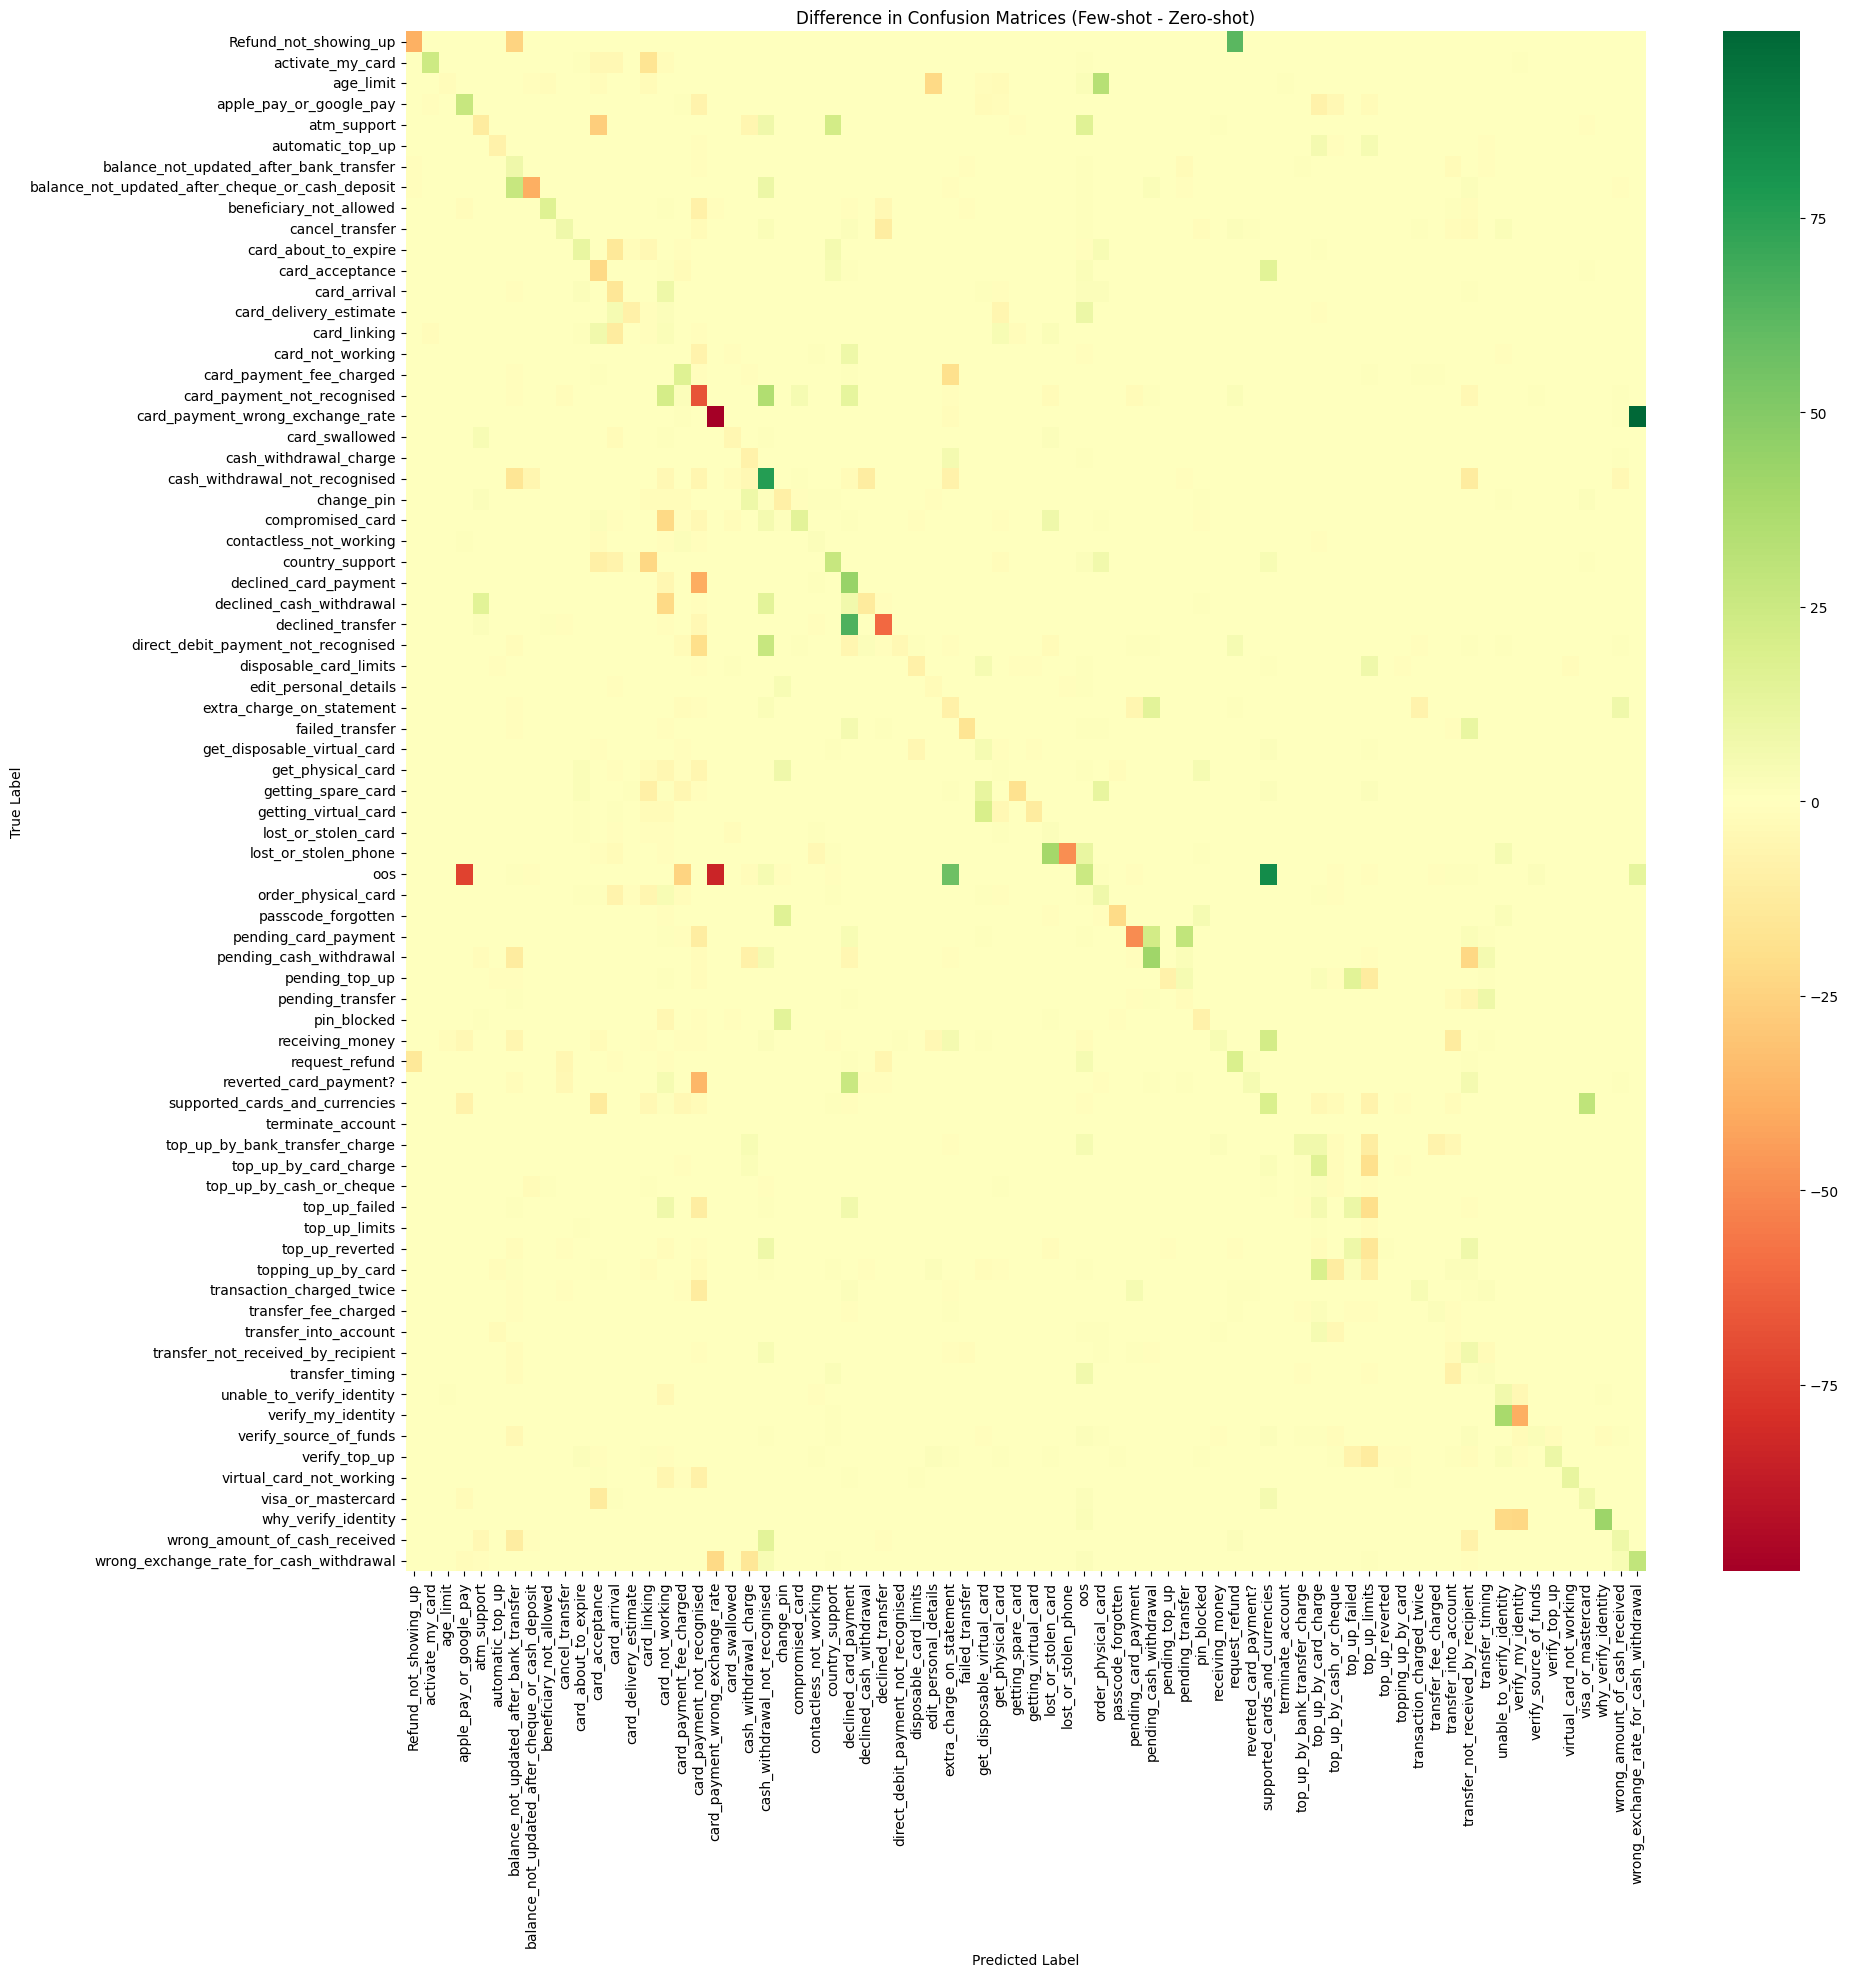

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the confusion matrices
df_01_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/01_zeroshot_llama_4oos_cm.csv", index_col=0)
df_02_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/02_fewshot_llama_4oos_cm.csv", index_col=0)

# Subtract the first confusion matrix from the second
df_diff_cm = df_02_cm - df_01_cm

# Plot the difference as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_diff_cm, annot=False, cmap="RdYlGn", center=0)
plt.title("Difference in Confusion Matrices (Few-shot - Zero-shot)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## [25% Curated OOS] Few-shot llama3.2:3b vs QWEN3-30B-A3B


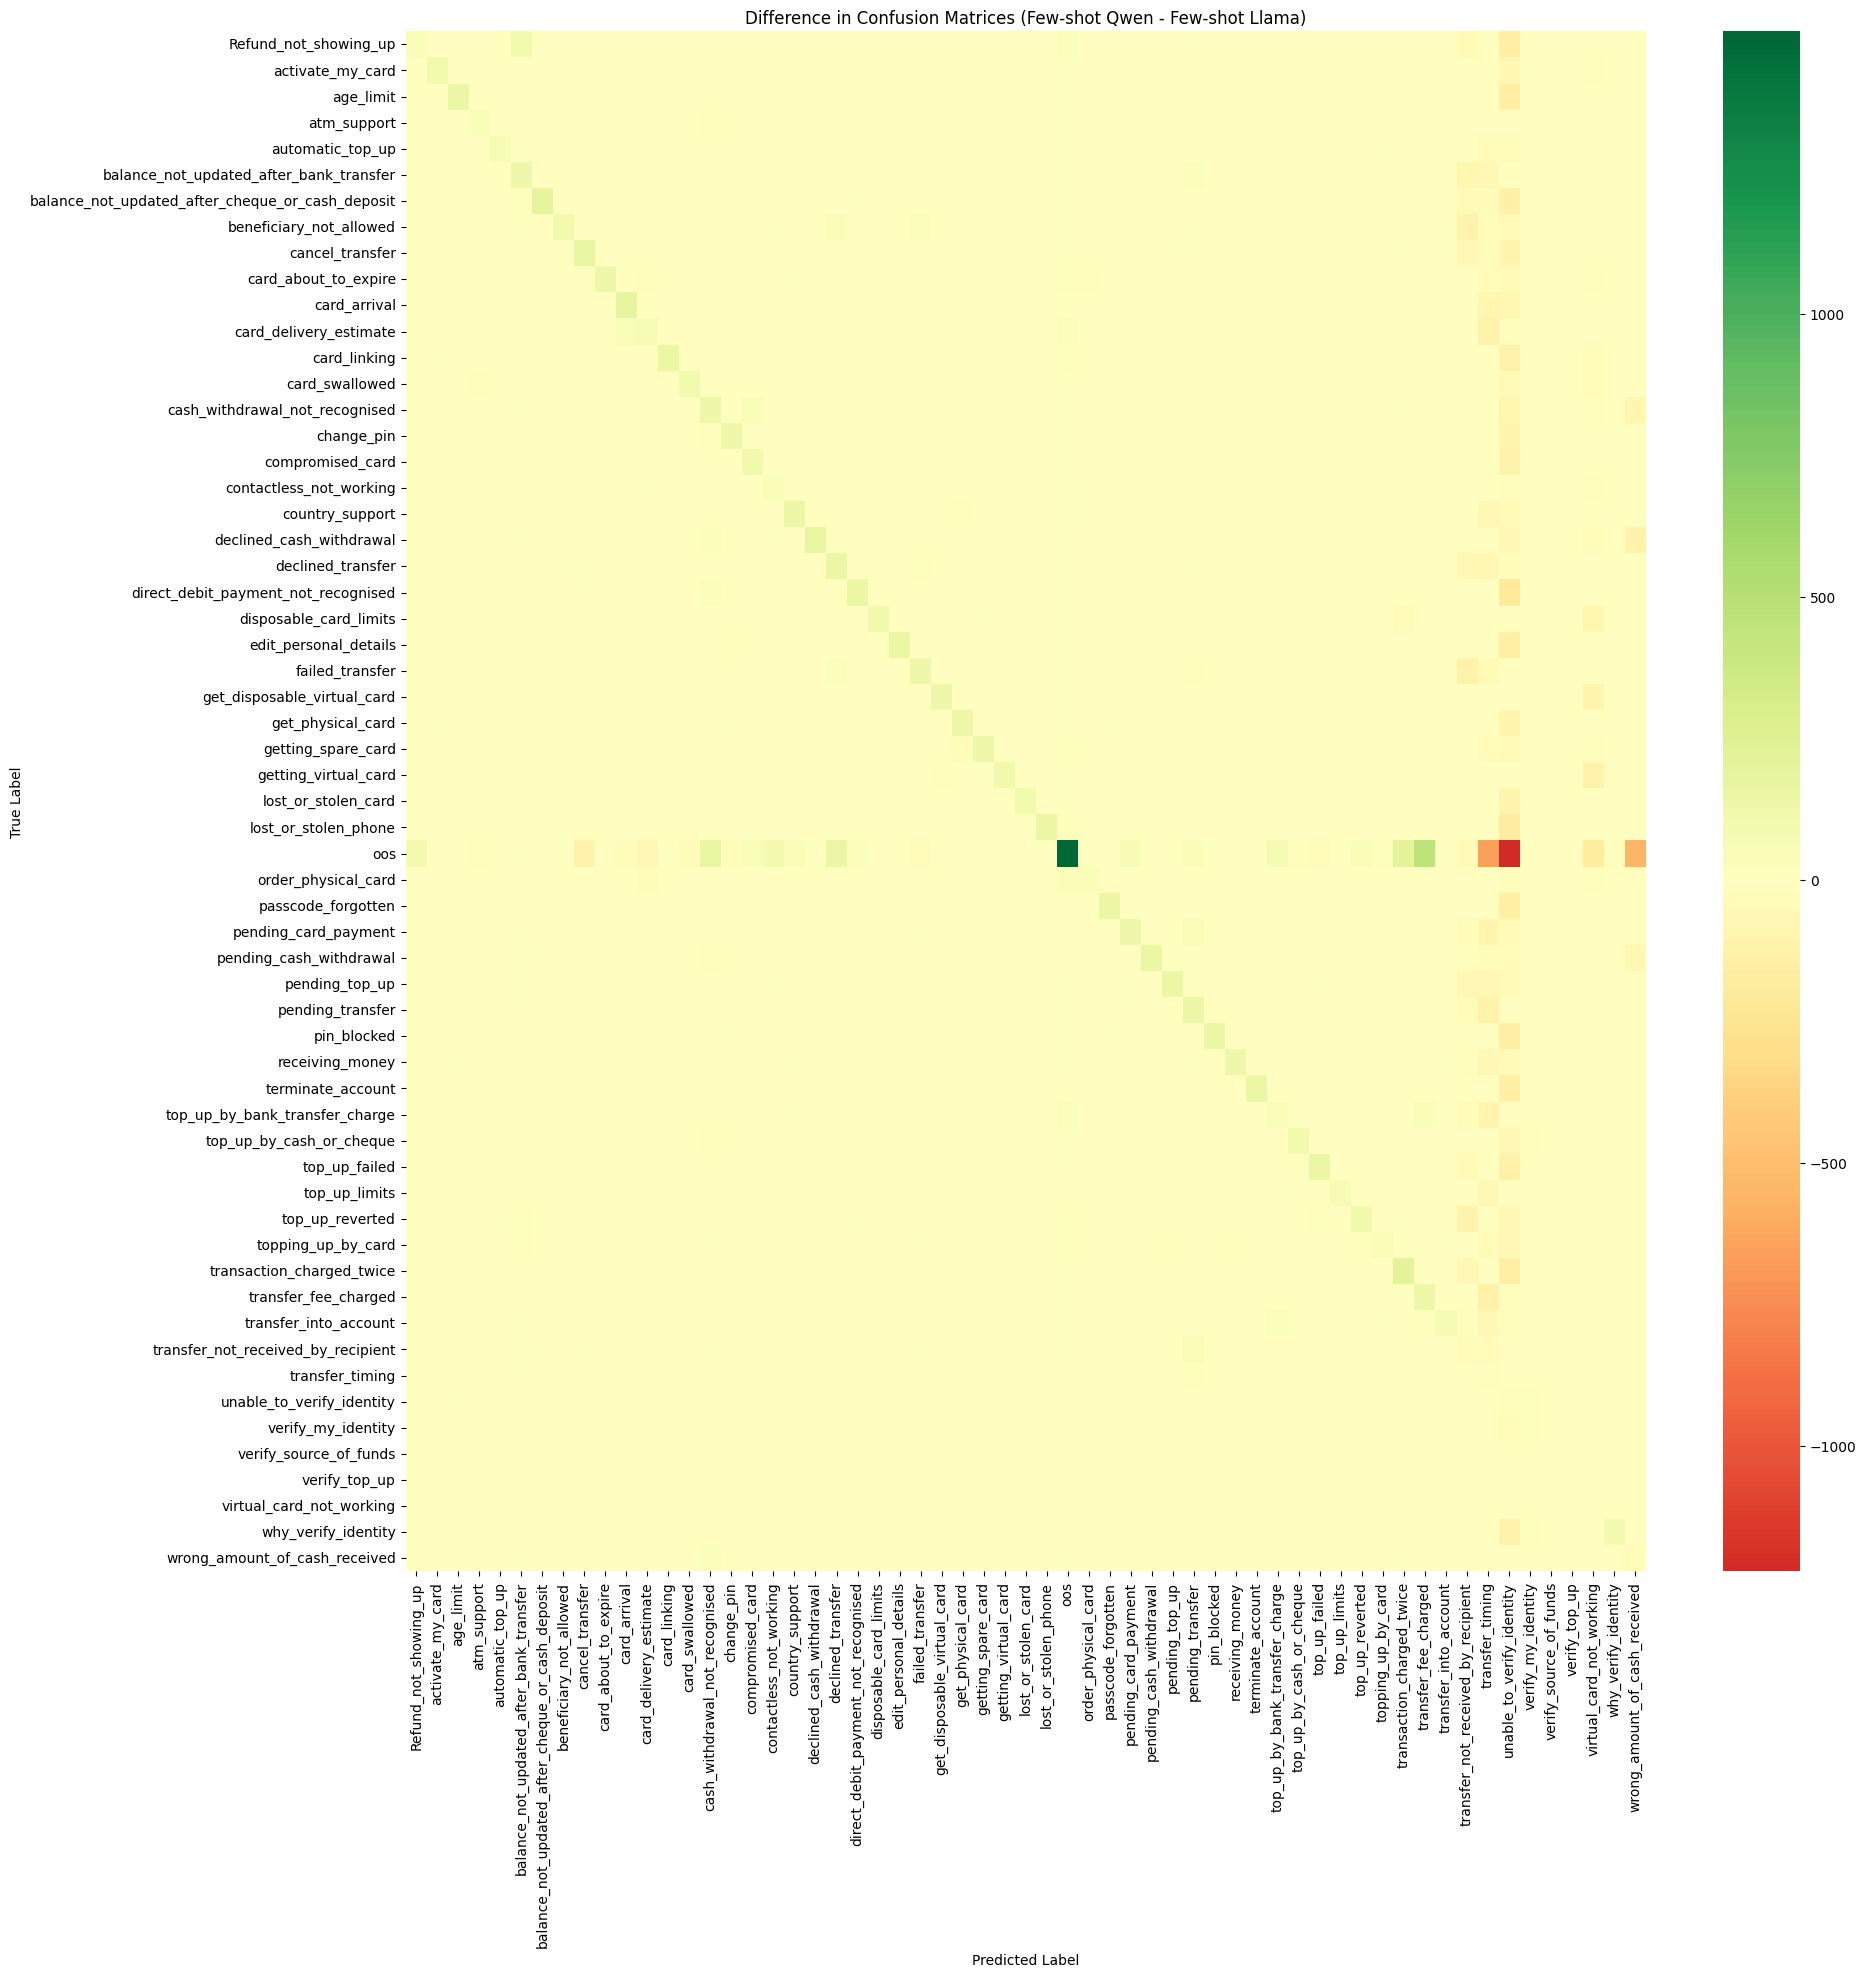

In [ ]:
# Load the confusion matrices
df_03_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/03_fewshot_llama_cm.csv", index_col=0)
df_04_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/04_fewshot_qwen_cm.csv", index_col=0)

# Subtract the first confusion matrix from the second
df_diff_cm_2 = df_04_cm - df_03_cm

# Plot the difference as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_diff_cm_2, annot=False, cmap="RdYlGn", center=0)
plt.title("Difference in Confusion Matrices (Few-shot Qwen - Few-shot Llama)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## [25% Curated OOS] Few-shot llama3.2:3b vs Hybrid BERT-llama3.2:3b


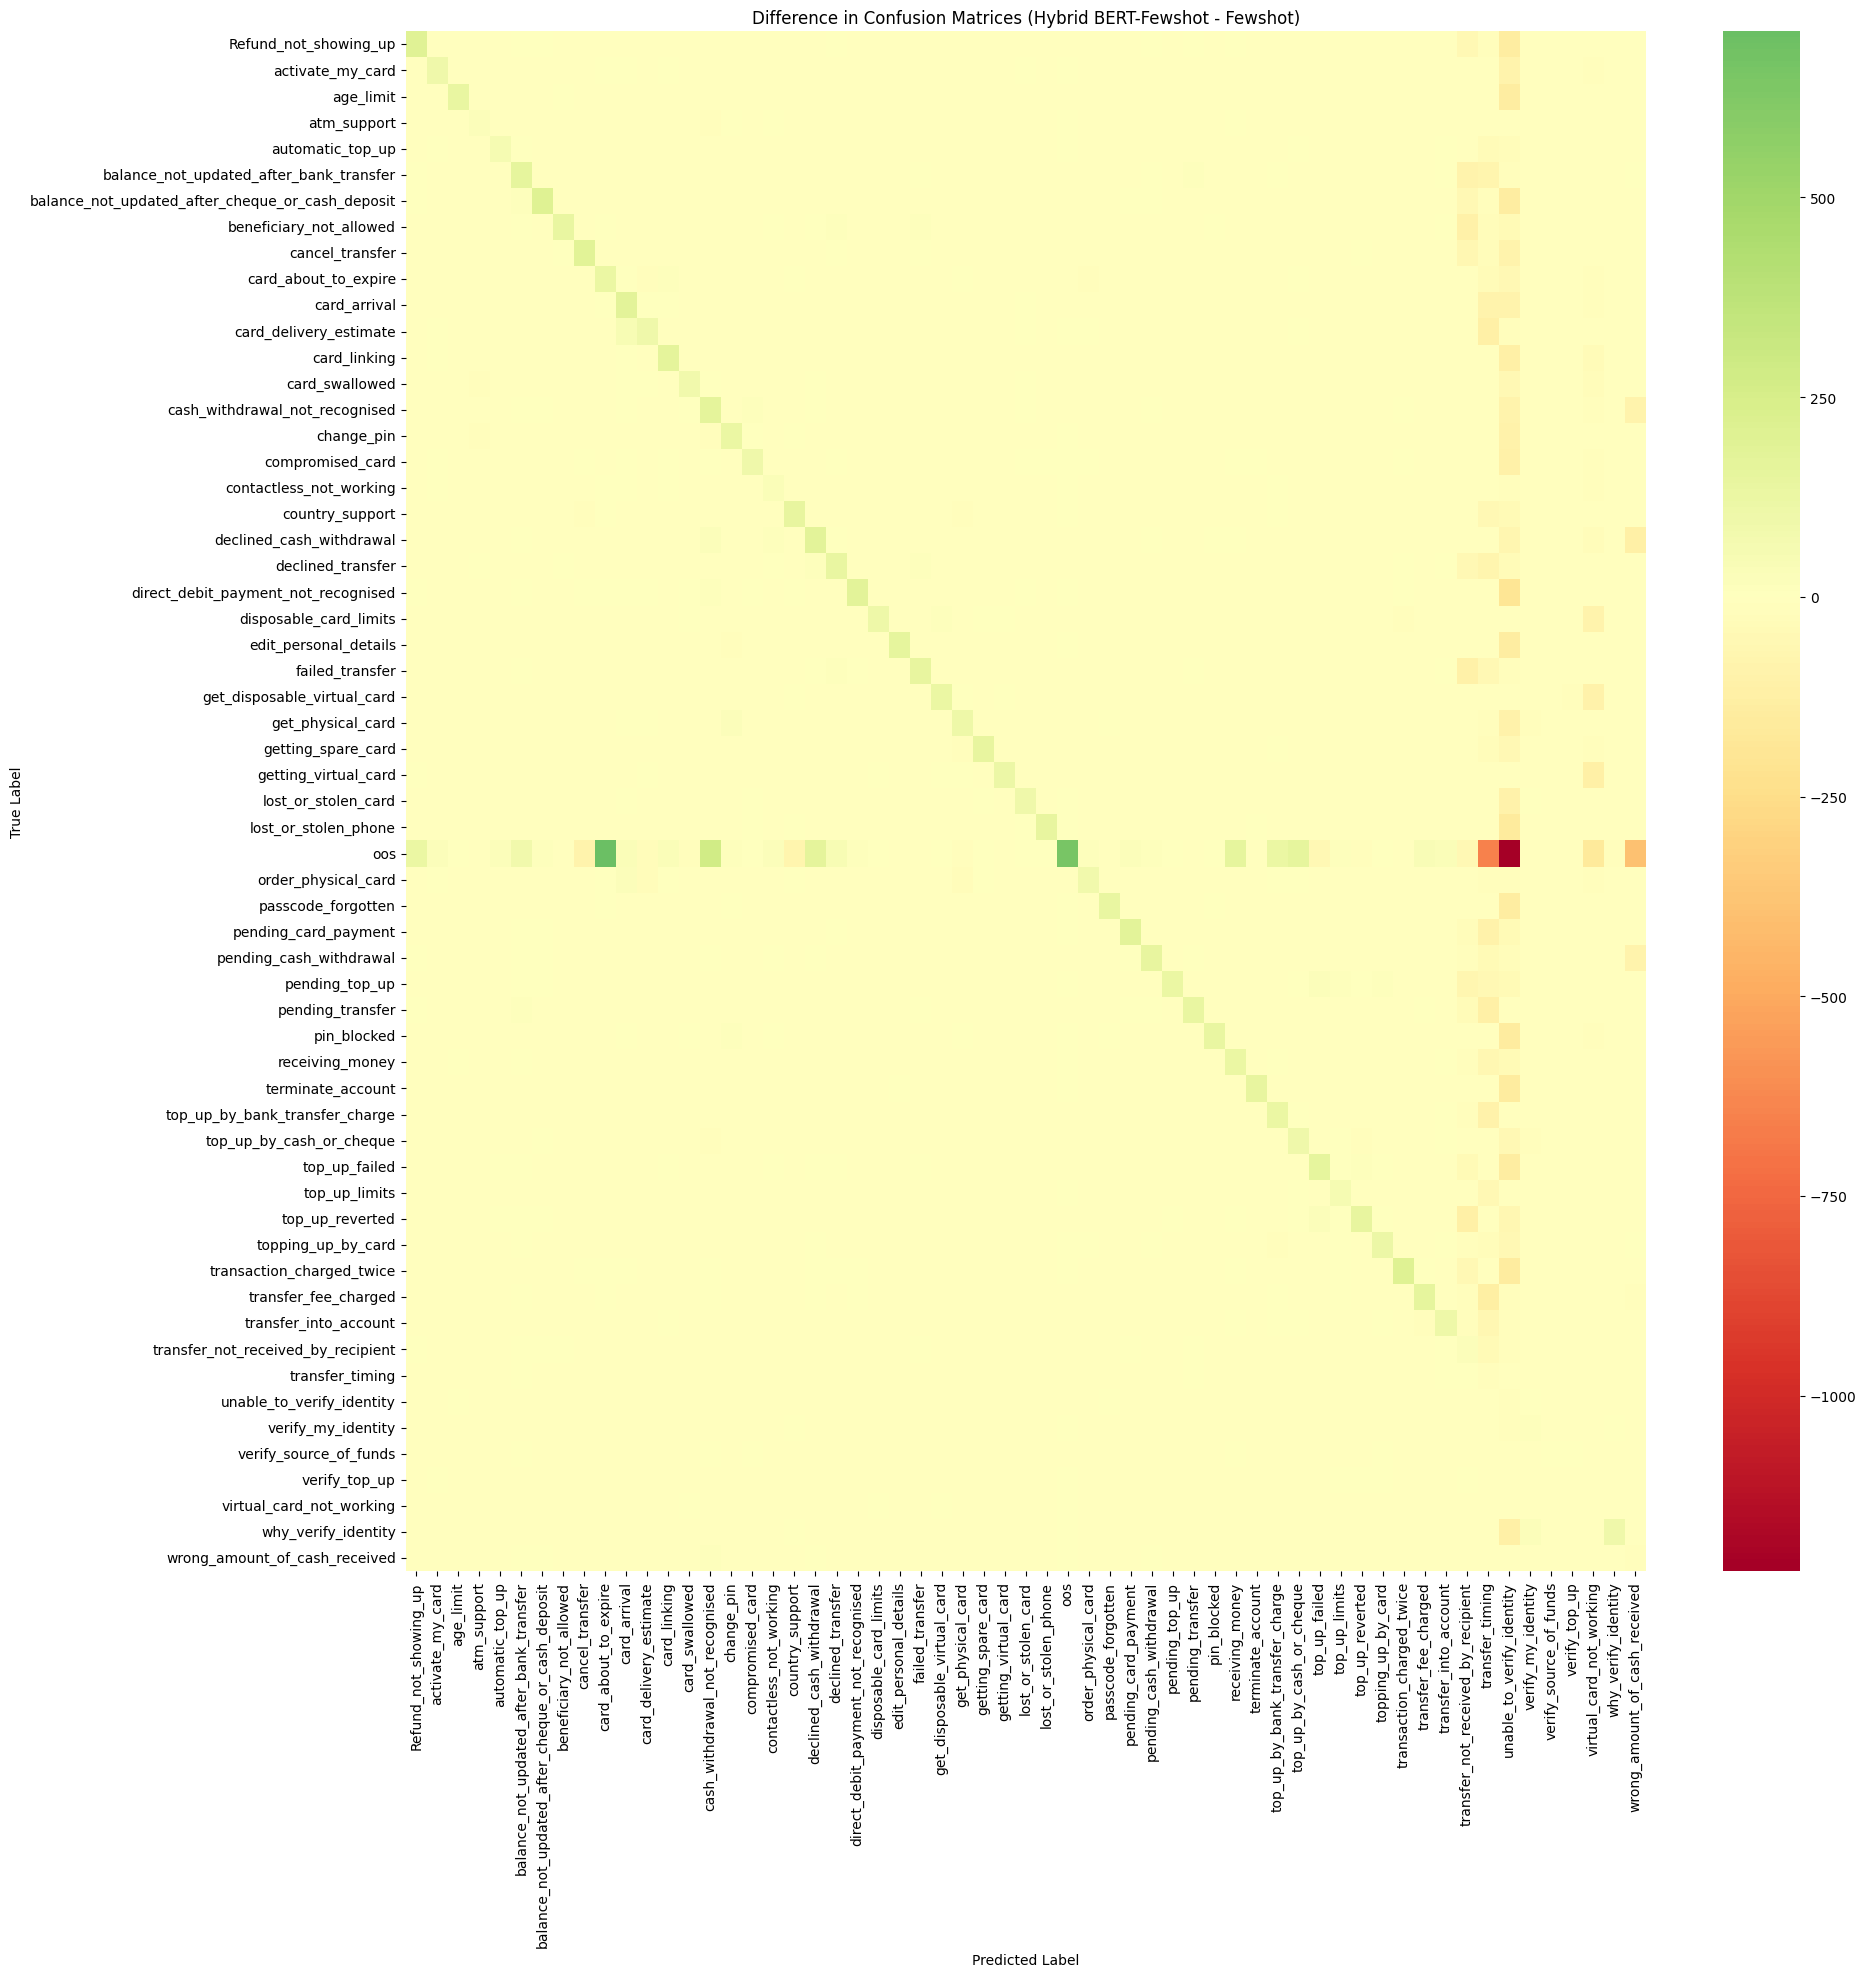

In [ ]:
# Load the confusion matrices
df_03_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/03_fewshot_llama_cm.csv", index_col=0)
df_05_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/05_bert_fewshot_cm.csv", index_col=0)

# Subtract the first confusion matrix from the second
df_diff_cm_3 = df_05_cm - df_03_cm

# Plot the difference as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_diff_cm_3, annot=False, cmap="RdYlGn", center=0)
plt.title("Difference in Confusion Matrices (Hybrid BERT-Fewshot - Fewshot)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## [25% Curated OOS] Hybrid BERT-llama3.2:3b vs Hybrid BERT-VAE-llama3.2:3b


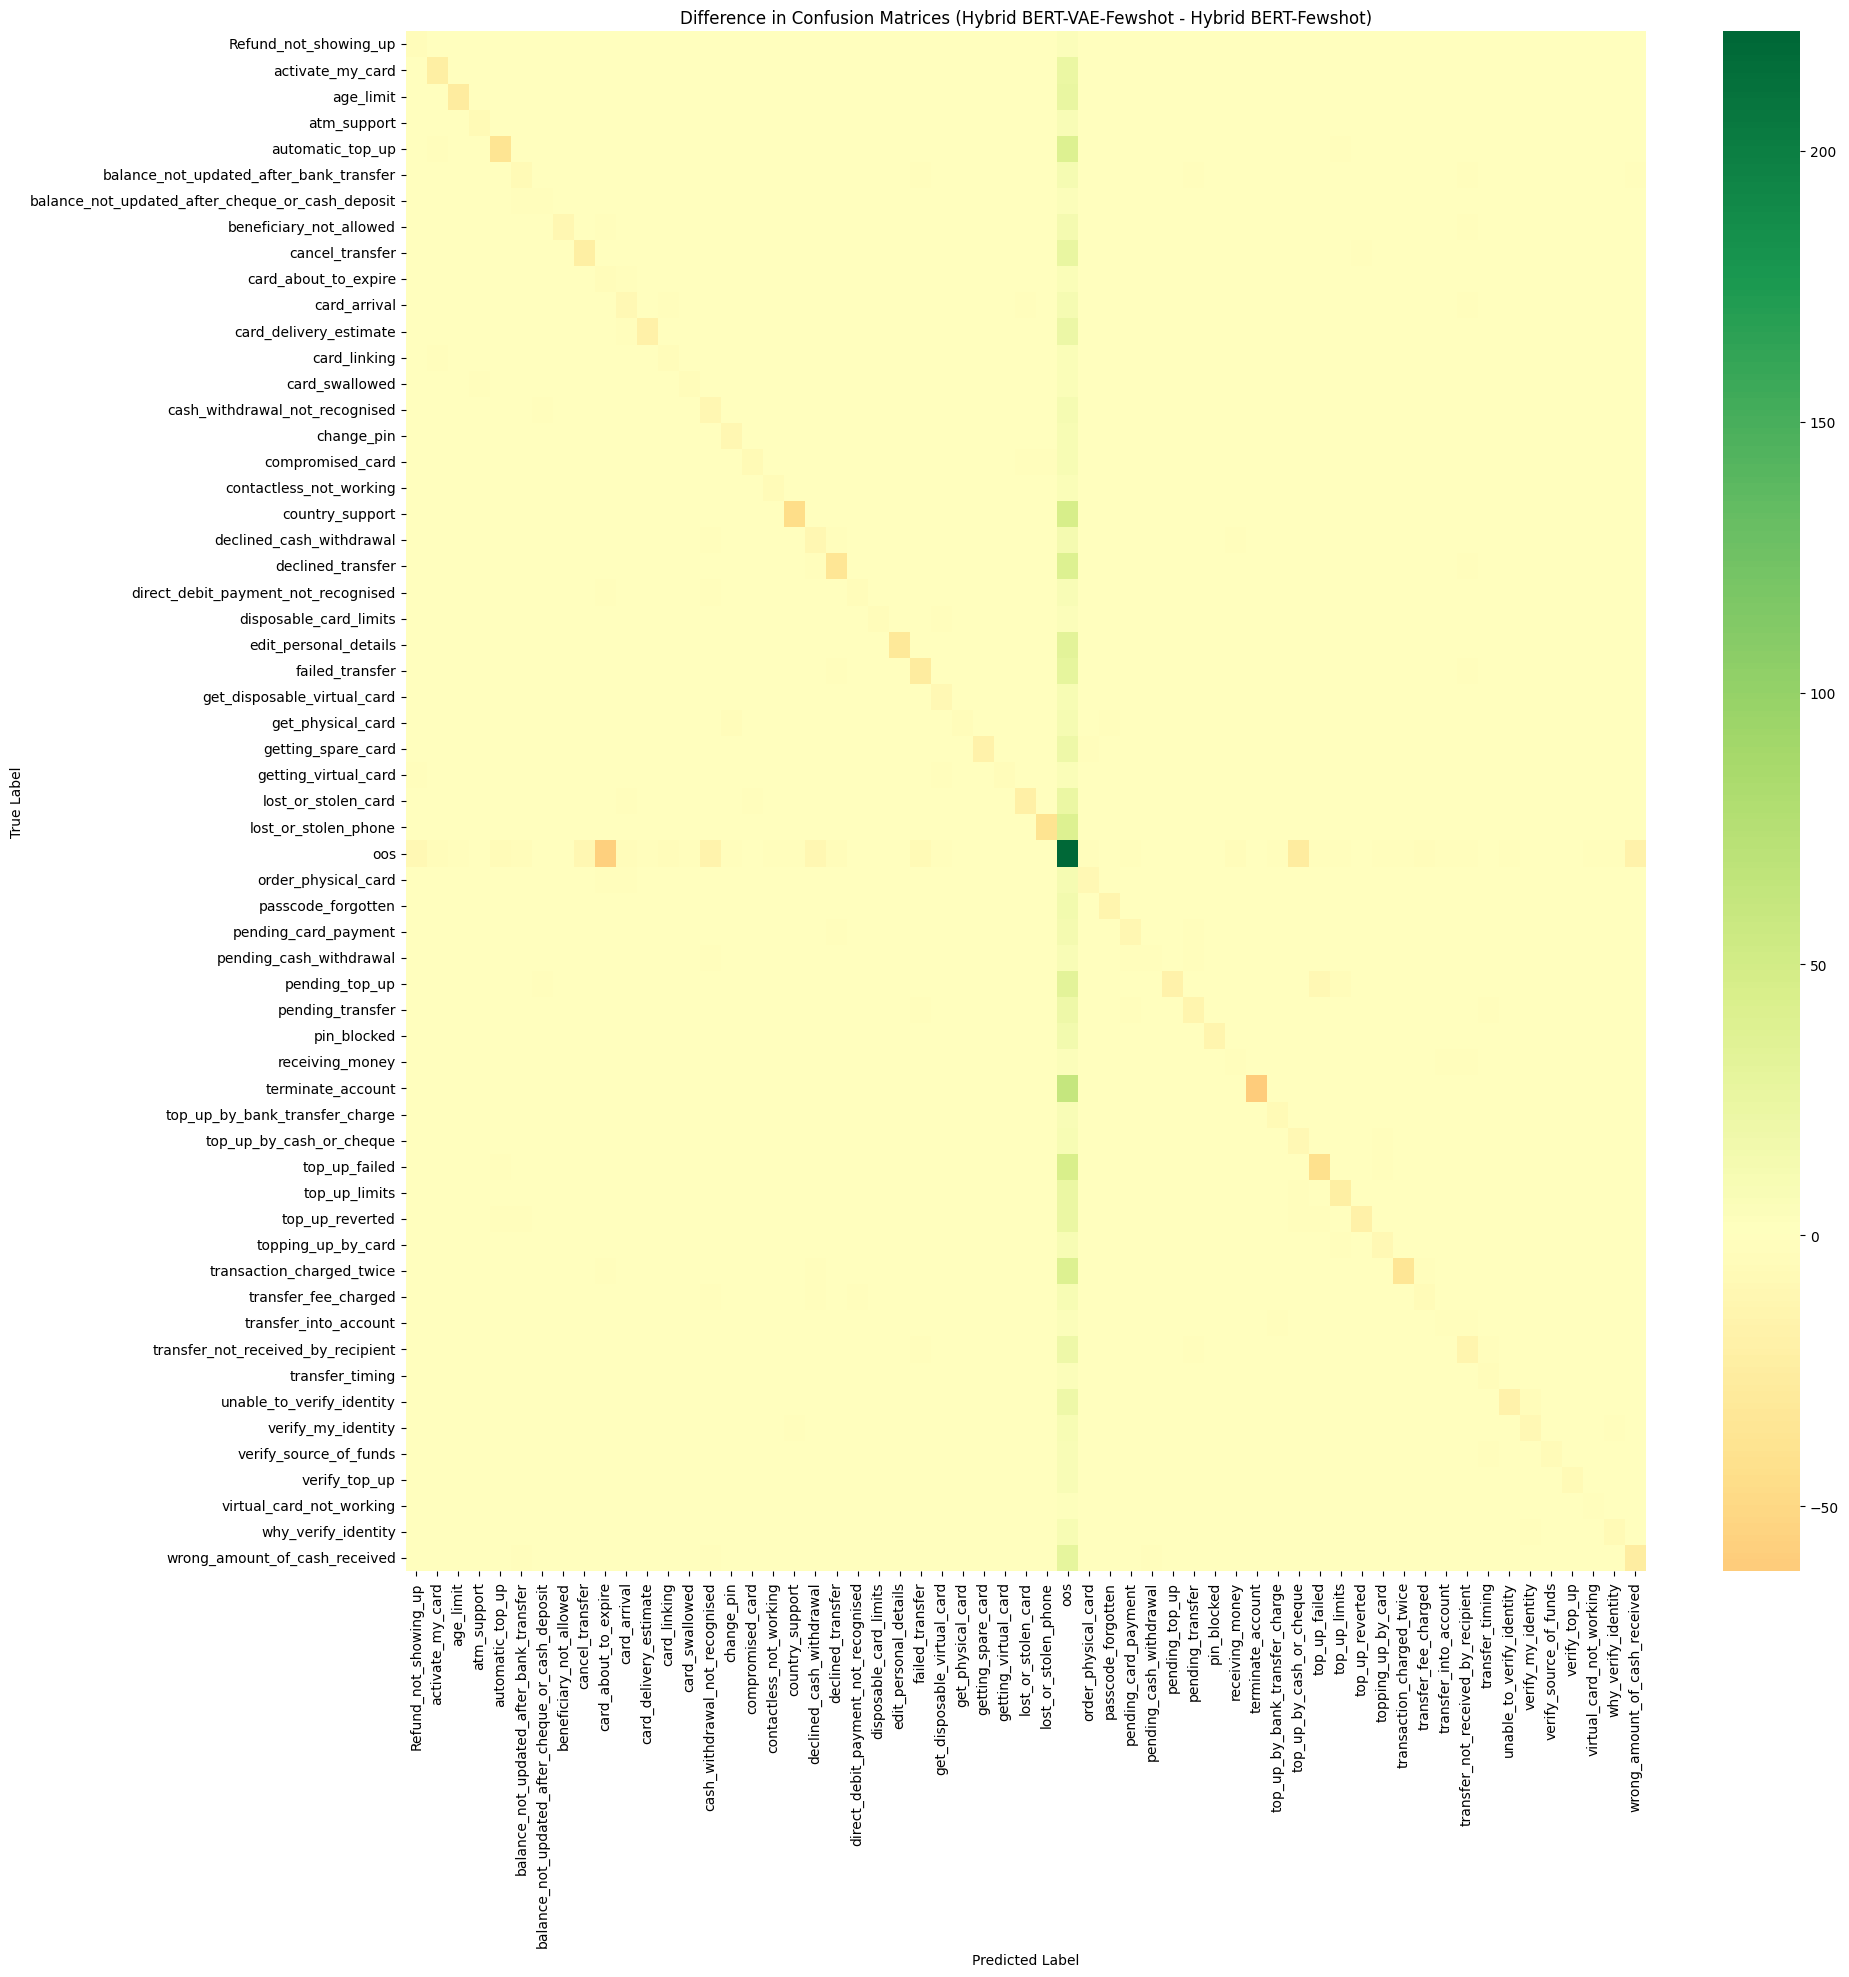

In [ ]:
# Load the confusion matrices
df_05_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/05_bert_fewshot_cm.csv", index_col=0)
df_06_cm = pd.read_csv("/content/analyse-diff-methods-sentence-level-errors/06_bert_vae_fewshot_cm.csv", index_col=0)

# Subtract the first confusion matrix from the second
df_diff_cm_4 = df_06_cm - df_05_cm

# Plot the difference as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_diff_cm_4, annot=False, cmap="RdYlGn", center=0)
plt.title("Difference in Confusion Matrices (Hybrid BERT-VAE-Fewshot - Hybrid BERT-Fewshot)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

